In [2]:
import pandas as pd
import os
import pickle

In [3]:
from google.colab import drive
drive.mount("/content/drive")

os.chdir('/content/drive/MyDrive/SI 630 project')
# os.listdir('.')

Mounted at /content/drive


In [4]:
os.listdir('datasets/CADEC/CADEC.v2/cadec')


['sct',
 'text',
 'original - unedited version of edited files',
 'meddra - unedited version of edited files',
 'sct - unedited version of edited files',
 'original',
 'meddra']

In [5]:
suf = '_v2'

data_save_dir = 'data'+suf

suf += '_no_rnn'

In [6]:
meddra_counts = pd.read_csv(data_save_dir+'/meddra_counts.csv')
meddra_counts

,ner,meddra,counts_exploded,counts,counts_exploded_rank
0,Drug,Lipitor,1081,1073,1
1,ADR,CONCEPT_LESS,1016,266,2
2,ADR,Severe_pain,722,247,3
3,ADR,Myalgia,619,305,4
4,ADR,Pain,292,260,5
...,...,...,...,...,...
1294,Finding,Senility,1,1,1233
1295,Drug,Seroquel,1,1,1233
1296,Drug,Solaraze,1,1,1233
1297,Drug,Tagamet,1,1,1233


In [7]:
meddra_counts.loc[meddra_counts.ner == 'ADR',:]

,ner,meddra,counts_exploded,counts,counts_exploded_rank
1,ADR,CONCEPT_LESS,1016,266,2
2,ADR,Severe_pain,722,247,3
3,ADR,Myalgia,619,305,4
4,ADR,Pain,292,260,5
5,ADR,Arthralgia,280,163,6
...,...,...,...,...,...
1268,ADR,Labyrinthitis,1,1,1233
1269,ADR,Dysphagia,1,1,1233
1275,ADR,Lupus_erythematosus,1,1,1233
1278,ADR,Cataract,1,1,1233


In [8]:
with open(data_save_dir+'/cadec_flair_objects.pkl', 'rb') as f:
    docs = pickle.load(f)
docs[:10]

[Sentence[117]: "i feel a bit drowsy & have a little blurred vision , so far no gastric problems . ive been on arthrotec 50 for over 10 years on and off , only taking it when i needed it . due to my arthritis getting progressively worse , to the point where i am in tears with the agony , gp ' s started me on 75 twice a day and i have to take it . every day for the next month to see how i get on , here goes . so far its been very good , pains almost gone , but i feel a bit weird , didnt have that when on 50 ." → ["i"/O/O, "feel"/O/O, "a"/O/O, "bit"/B-ADR/B-Drowsy, "drowsy"/E-ADR/E-Drowsy, "&"/O/O, "have"/O/O, "a"/O/O, "little"/B-ADR/B-Blurred_vision_-_hazy, "blurred"/I-ADR/I-Blurred_vision_-_hazy, "vision"/E-ADR/E-Blurred_vision_-_hazy, ","/O/O, "so"/O/O, "far"/O/O, "no"/O/O, "gastric"/B-ADR/B-Excessive_upper_gastrointestinal_gas, "problems"/E-ADR/E-Excessive_upper_gastrointestinal_gas, "."/O/O, "ive"/O/O, "been"/O/O, "on"/O/O, "arthrotec"/S-Drug/S-Arthrotec, "50"/O/O, "for"/O/O, "over"

In [9]:
len(docs)

1186

In [10]:
temp = docs[0]
temp

Sentence[117]: "i feel a bit drowsy & have a little blurred vision , so far no gastric problems . ive been on arthrotec 50 for over 10 years on and off , only taking it when i needed it . due to my arthritis getting progressively worse , to the point where i am in tears with the agony , gp ' s started me on 75 twice a day and i have to take it . every day for the next month to see how i get on , here goes . so far its been very good , pains almost gone , but i feel a bit weird , didnt have that when on 50 ." → ["i"/O/O, "feel"/O/O, "a"/O/O, "bit"/B-ADR/B-Drowsy, "drowsy"/E-ADR/E-Drowsy, "&"/O/O, "have"/O/O, "a"/O/O, "little"/B-ADR/B-Blurred_vision_-_hazy, "blurred"/I-ADR/I-Blurred_vision_-_hazy, "vision"/E-ADR/E-Blurred_vision_-_hazy, ","/O/O, "so"/O/O, "far"/O/O, "no"/O/O, "gastric"/B-ADR/B-Excessive_upper_gastrointestinal_gas, "problems"/E-ADR/E-Excessive_upper_gastrointestinal_gas, "."/O/O, "ive"/O/O, "been"/O/O, "on"/O/O, "arthrotec"/S-Drug/S-Arthrotec, "50"/O/O, "for"/O/O, "over"/

In [11]:
temp.annotation_layers

{'ner': ['Token[0]: "i"'/'O' (1.0),
  'Token[1]: "feel"'/'O' (1.0),
  'Token[2]: "a"'/'O' (1.0),
  'Token[3]: "bit"'/'B-ADR' (1.0),
  'Token[4]: "drowsy"'/'E-ADR' (1.0),
  'Token[5]: "&"'/'O' (1.0),
  'Token[6]: "have"'/'O' (1.0),
  'Token[7]: "a"'/'O' (1.0),
  'Token[8]: "little"'/'B-ADR' (1.0),
  'Token[9]: "blurred"'/'I-ADR' (1.0),
  'Token[10]: "vision"'/'E-ADR' (1.0),
  'Token[11]: ","'/'O' (1.0),
  'Token[12]: "so"'/'O' (1.0),
  'Token[13]: "far"'/'O' (1.0),
  'Token[14]: "no"'/'O' (1.0),
  'Token[15]: "gastric"'/'B-ADR' (1.0),
  'Token[16]: "problems"'/'E-ADR' (1.0),
  'Token[17]: "."'/'O' (1.0),
  'Token[18]: "ive"'/'O' (1.0),
  'Token[19]: "been"'/'O' (1.0),
  'Token[20]: "on"'/'O' (1.0),
  'Token[21]: "arthrotec"'/'S-Drug' (1.0),
  'Token[22]: "50"'/'O' (1.0),
  'Token[23]: "for"'/'O' (1.0),
  'Token[24]: "over"'/'O' (1.0),
  'Token[25]: "10"'/'O' (1.0),
  'Token[26]: "years"'/'O' (1.0),
  'Token[27]: "on"'/'O' (1.0),
  'Token[28]: "and"'/'O' (1.0),
  'Token[29]: "off"'/'O' (

In [12]:

# define your NER tags
label_dict = {
    'ADR': 'ADR',
    'Drug': 'Drug',
    'Finding': 'Finding',
    'Symptom': 'Symptom',
    'Disease': 'Disease'
}

In [13]:
from flair.data import Corpus

from flair.embeddings import WordEmbeddings, FlairEmbeddings, StackedEmbeddings, TransformerWordEmbeddings
from flair.models import SequenceTagger
from flair.trainers import ModelTrainer
from sklearn.model_selection import train_test_split

from torch.optim import AdamW, SGD

from flair.visual.training_curves import Plotter
plotter = Plotter()



train_docs, test_docs = train_test_split(docs, test_size=0.2, random_state=321)
dev_docs, test_docs = train_test_split(test_docs, test_size=0.5, random_state=123)

corpus = Corpus(train=train_docs, dev=dev_docs, test=test_docs) # Corpus: 948 train + 119 dev + 119 test sentences
corpus.filter_empty_sentences()
# # create a tag dictionary
labels = ['ADR', 'Drug', 'Finding', 'Symptom', 'Disease']
# tag_dictionary = Dictionary(add_unk=True)
# for label in labels:
#     tag_dictionary.add_item(label)
tag_dictionary = corpus.make_label_dictionary(label_type='ner')
print(tag_dictionary.span_labels)

# create a stacked embedding using GloVe and Flair embeddings
stacked_embeddings = StackedEmbeddings([
    WordEmbeddings('glove',
                   force_cpu=False,
                #    embedding_length=1024,
                  #  fine_tune=True,
                   ),
    # TransformerWordEmbeddings('emilyalsentzer/Bio_ClinicalBERT', layers="-1",
    #                                    subtoken_pooling="first",
    #                                    is_document_embedding=True,
    #                                    fine_tune=True,
    #                                    use_context=True,
    #                                    max_seq_length=1024,
    #                                    ),
    FlairEmbeddings('news-forward',
                    # fine_tune=True
                    ),
    FlairEmbeddings('news-backward',
                    # fine_tune=True
                    ),
])
# https://github.com/flairNLP/flair/blob/master/resources/docs/embeddings/FLAIR_EMBEDDINGS.md

# create a SequenceTagger object and specify the tag dictionary and embeddings to use
tagger = SequenceTagger(hidden_size=256,
                        embeddings=stacked_embeddings,
                        tag_dictionary=tag_dictionary,
                        tag_type='ner',
                        # use_crf=False,
                        use_rnn=False,
                        # reproject_embeddings=False,
                        )
tagger.predict_spans = False

print(tagger._determine_if_span_prediction_problem(tagger.label_dictionary))
print(tagger.predict_spans)

# https://github.com/flairNLP/flair/blob/master/flair/trainers/trainer.py
# create a ModelTrainer object and train the tagger
trainer = ModelTrainer(tagger, corpus)

2023-04-21 06:31:49,779 Filtering empty sentences
2023-04-21 06:31:49,842 Corpus: 948 train + 119 dev + 119 test sentences
2023-04-21 06:31:49,844 Computing label dictionary. Progress:


948it [00:00, 6626.39it/s]

2023-04-21 06:31:49,992 Dictionary created for label 'ner' with 22 values: O (seen 79057 times), I-ADR (seen 4449 times), E-ADR (seen 3506 times), B-ADR (seen 3349 times), S-ADR (seen 1363 times), S-Drug (seen 1286 times), B-Finding (seen 200 times), E-Finding (seen 200 times), I-Finding (seen 149 times), B-Disease (seen 119 times), E-Disease (seen 119 times), E-Symptom (seen 114 times), S-Disease (seen 112 times), S-Symptom (seen 112 times), E-Drug (seen 111 times), B-Symptom (seen 110 times), B-Drug (seen 110 times), S-Finding (seen 109 times), I-Symptom (seen 104 times), I-Drug (seen 50 times)
False


2023-04-21 06:31:51,315 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim.vectors.npy not found in cache, downloading to /tmp/tmpkhzimo9h


100%|██████████| 153M/153M [00:13<00:00, 12.2MB/s]

2023-04-21 06:32:05,041 copying /tmp/tmpkhzimo9h to cache at /root/.flair/embeddings/glove.gensim.vectors.npy


2023-04-21 06:32:05,154 removing temp file /tmp/tmpkhzimo9h
2023-04-21 06:32:05,833 https://flair.informatik.hu-berlin.de/resources/embeddings/token/glove.gensim not found in cache, downloading to /tmp/tmpzp5yvot8


100%|██████████| 20.5M/20.5M [00:02<00:00, 7.33MB/s]

2023-04-21 06:32:09,419 copying /tmp/tmpzp5yvot8 to cache at /root/.flair/embeddings/glove.gensim
2023-04-21 06:32:09,438 removing temp file /tmp/tmpzp5yvot8


2023-04-21 06:32:22,303 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/news-forward-0.4.1.pt not found in cache, downloading to /tmp/tmpkw777zev


100%|██████████| 69.7M/69.7M [00:06<00:00, 10.8MB/s]

2023-04-21 06:32:29,743 copying /tmp/tmpkw777zev to cache at /root/.flair/embeddings/news-forward-0.4.1.pt


2023-04-21 06:32:29,799 removing temp file /tmp/tmpkw777zev
2023-04-21 06:32:35,487 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/news-backward-0.4.1.pt not found in cache, downloading to /tmp/tmppwg7458x


100%|██████████| 69.7M/69.7M [00:06<00:00, 10.7MB/s]

2023-04-21 06:32:42,951 copying /tmp/tmppwg7458x to cache at /root/.flair/embeddings/news-backward-0.4.1.pt
2023-04-21 06:32:43,008 removing temp file /tmp/tmppwg7458x


2023-04-21 06:32:43,235 SequenceTagger predicts: Dictionary with 22 tags: <unk>, O, I-ADR, E-ADR, B-ADR, S-ADR, S-Drug, B-Finding, E-Finding, I-Finding, B-Disease, E-Disease, E-Symptom, S-Disease, S-Symptom, E-Drug, B-Symptom, B-Drug, S-Finding, I-Symptom, I-Drug, I-Disease
True
False


In [14]:
# !tensorboard --logdir=runs
# http://localhost:6006/

In [15]:
hist = trainer.train('flair_ner_model'+suf,
              embeddings_storage_mode='gpu',
              gold_label_dictionary_for_eval=tag_dictionary,
              mini_batch_size = 12,
              eval_batch_size = 12,
              patience=1,
              anneal_factor = 0.5,
              anneal_against_dev_loss=True,
              main_evaluation_metric = ("weighted avg", "f1-score"),
              metrics_for_tensorboard=[("weighted avg", 'precision'), ("weighted avg", 'recall'), ("macro avg", 'f1-score'), ("macro avg", 'precision'), ("macro avg", 'recall')],
              use_tensorboard=True,
              tensorboard_comment='Flair NER',
              tensorboard_log_dir='runs/tb_logs'+suf,
              min_learning_rate=3e-8,
              optimizer=AdamW,
              learning_rate=1e-1,
              weight_decay=0.001,
              max_epochs=100,
              monitor_train=True,
              save_optimizer_state=True,)
# hist

2023-04-21 06:32:43,439 tensorboard logging path is runs/tb_logs_v2_no_rnn
2023-04-21 06:32:43,449 ----------------------------------------------------------------------------------------------------
2023-04-21 06:32:43,450 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      'glove'
      (embedding): Embedding(400001, 100)
    )
    (list_embedding_1): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
      )
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
      )
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=4196, out_features=4196, bias=True)
  (linear): Linear(in_features=4196, out_features=24, bias=Tr

100%|██████████| 79/79 [00:19<00:00,  4.08it/s]

2023-04-21 06:33:34,409 Evaluating as a multi-label problem: True


2023-04-21 06:33:37,104 TRAIN : loss 250.87393188476562 - f1-score (weighted avg)  0.4569


100%|██████████| 10/10 [00:04<00:00,  2.42it/s]

2023-04-21 06:33:41,313 Evaluating as a multi-label problem: False
2023-04-21 06:33:41,384 DEV : loss 284.189208984375 - f1-score (weighted avg)  0.4268
2023-04-21 06:33:41,394 BAD EPOCHS (no improvement): 0
2023-04-21 06:33:41,397 saving best model


2023-04-21 06:33:43,143 ----------------------------------------------------------------------------------------------------
2023-04-21 06:33:44,754 epoch 2 - iter 7/79 - loss 285.03493586 - time (sec): 1.61 - samples/sec: 5959.19 - lr: 0.100000
2023-04-21 06:33:45,931 epoch 2 - iter 14/79 - loss 264.87572338 - time (sec): 2.79 - samples/sec: 6200.99 - lr: 0.100000
2023-04-21 06:33:47,337 epoch 2 - iter 21/79 - loss 262.73748806 - time (sec): 4.19 - samples/sec: 5995.53 - lr: 0.100000
2023-04-21 06:33:49,004 epoch 2 - iter 28/79 - loss 281.23855534 - time (sec): 5.86 - samples/sec: 5696.54 - lr: 0.100000
2023-04-21 06:33:50,395 epoch 2 - iter 35/79 - loss 308.37935284 - time (sec): 7.25 - samples/sec: 5651.64 - lr: 0.100000
2023-04-21 06:33:52,187 epoch 2 - iter 42/79 - loss 322.77862595 - time (sec): 9.04 - samples/sec: 5562.99 - lr: 0.100000
2023-04-21 06:33:54,507 epoch 2 - iter 49/79 - loss 325.31286140 - time (sec): 11.36 - samples/sec: 5342.26 - lr: 0.100000
2023-04-21 06:33:56,0

100%|██████████| 79/79 [00:20<00:00,  3.80it/s]

2023-04-21 06:34:22,003 Evaluating as a multi-label problem: True


2023-04-21 06:34:24,753 TRAIN : loss 255.85723876953125 - f1-score (weighted avg)  0.4699


100%|██████████| 10/10 [00:02<00:00,  3.90it/s]

2023-04-21 06:34:27,397 Evaluating as a multi-label problem: False
2023-04-21 06:34:27,467 DEV : loss 297.12298583984375 - f1-score (weighted avg)  0.444
2023-04-21 06:34:27,476 BAD EPOCHS (no improvement): 1
2023-04-21 06:34:27,480 ----------------------------------------------------------------------------------------------------


2023-04-21 06:34:28,967 epoch 3 - iter 7/79 - loss 376.65685535 - time (sec): 1.49 - samples/sec: 5352.71 - lr: 0.100000
2023-04-21 06:34:30,300 epoch 3 - iter 14/79 - loss 360.99435949 - time (sec): 2.82 - samples/sec: 5661.08 - lr: 0.100000
2023-04-21 06:34:31,738 epoch 3 - iter 21/79 - loss 348.52933037 - time (sec): 4.26 - samples/sec: 5603.66 - lr: 0.100000
2023-04-21 06:34:33,207 epoch 3 - iter 28/79 - loss 352.27167132 - time (sec): 5.73 - samples/sec: 5571.50 - lr: 0.100000
2023-04-21 06:34:34,630 epoch 3 - iter 35/79 - loss 377.44742615 - time (sec): 7.15 - samples/sec: 5611.59 - lr: 0.100000
2023-04-21 06:34:36,118 epoch 3 - iter 42/79 - loss 370.10763032 - time (sec): 8.64 - samples/sec: 5675.71 - lr: 0.100000
2023-04-21 06:34:37,736 epoch 3 - iter 49/79 - loss 366.85351949 - time (sec): 10.25 - samples/sec: 5619.35 - lr: 0.100000
2023-04-21 06:34:39,575 epoch 3 - iter 56/79 - loss 365.56334518 - time (sec): 12.09 - samples/sec: 5607.39 - lr: 0.100000
2023-04-21 06:34:40,752

100%|██████████| 79/79 [00:20<00:00,  3.80it/s]

2023-04-21 06:35:05,727 Evaluating as a multi-label problem: True


2023-04-21 06:35:08,440 TRAIN : loss 347.0096435546875 - f1-score (weighted avg)  0.4372


100%|██████████| 10/10 [00:02<00:00,  3.90it/s]

2023-04-21 06:35:11,080 Evaluating as a multi-label problem: False
2023-04-21 06:35:11,154 DEV : loss 394.6324462890625 - f1-score (weighted avg)  0.3935
2023-04-21 06:35:11,163 Epoch     3: reducing learning rate of group 0 to 5.0000e-02.
2023-04-21 06:35:11,165 BAD EPOCHS (no improvement): 2
2023-04-21 06:35:11,169 ----------------------------------------------------------------------------------------------------


2023-04-21 06:35:13,150 epoch 4 - iter 7/79 - loss 402.65163847 - time (sec): 1.98 - samples/sec: 4718.05 - lr: 0.050000
2023-04-21 06:35:14,439 epoch 4 - iter 14/79 - loss 362.07837313 - time (sec): 3.27 - samples/sec: 5201.73 - lr: 0.050000
2023-04-21 06:35:15,709 epoch 4 - iter 21/79 - loss 324.73046463 - time (sec): 4.54 - samples/sec: 5425.11 - lr: 0.050000
2023-04-21 06:35:17,410 epoch 4 - iter 28/79 - loss 344.75052743 - time (sec): 6.24 - samples/sec: 5317.45 - lr: 0.050000
2023-04-21 06:35:18,831 epoch 4 - iter 35/79 - loss 325.03474198 - time (sec): 7.66 - samples/sec: 5504.44 - lr: 0.050000
2023-04-21 06:35:20,196 epoch 4 - iter 42/79 - loss 314.14743744 - time (sec): 9.03 - samples/sec: 5525.78 - lr: 0.050000
2023-04-21 06:35:22,024 epoch 4 - iter 49/79 - loss 303.96060466 - time (sec): 10.85 - samples/sec: 5400.17 - lr: 0.050000
2023-04-21 06:35:23,457 epoch 4 - iter 56/79 - loss 290.27039646 - time (sec): 12.29 - samples/sec: 5465.03 - lr: 0.050000
2023-04-21 06:35:24,597

100%|██████████| 79/79 [00:19<00:00,  4.04it/s]

2023-04-21 06:35:48,078 Evaluating as a multi-label problem: True


2023-04-21 06:35:52,063 TRAIN : loss 169.89540100097656 - f1-score (weighted avg)  0.4667


100%|██████████| 10/10 [00:02<00:00,  3.95it/s]

2023-04-21 06:35:54,677 Evaluating as a multi-label problem: False
2023-04-21 06:35:54,745 DEV : loss 211.85256958007812 - f1-score (weighted avg)  0.4282
2023-04-21 06:35:54,755 BAD EPOCHS (no improvement): 0
2023-04-21 06:35:54,759 saving best model


2023-04-21 06:35:56,548 ----------------------------------------------------------------------------------------------------
2023-04-21 06:35:57,808 epoch 5 - iter 7/79 - loss 200.10351302 - time (sec): 1.26 - samples/sec: 6558.01 - lr: 0.050000
2023-04-21 06:35:59,653 epoch 5 - iter 14/79 - loss 200.80843547 - time (sec): 3.10 - samples/sec: 5152.22 - lr: 0.050000
2023-04-21 06:36:01,313 epoch 5 - iter 21/79 - loss 185.78865896 - time (sec): 4.76 - samples/sec: 5173.59 - lr: 0.050000
2023-04-21 06:36:03,139 epoch 5 - iter 28/79 - loss 185.52788163 - time (sec): 6.59 - samples/sec: 5235.73 - lr: 0.050000
2023-04-21 06:36:04,769 epoch 5 - iter 35/79 - loss 191.47129698 - time (sec): 8.22 - samples/sec: 5295.98 - lr: 0.050000
2023-04-21 06:36:06,092 epoch 5 - iter 42/79 - loss 193.82940717 - time (sec): 9.54 - samples/sec: 5364.58 - lr: 0.050000
2023-04-21 06:36:07,583 epoch 5 - iter 49/79 - loss 190.71521798 - time (sec): 11.03 - samples/sec: 5367.89 - lr: 0.050000
2023-04-21 06:36:08,9

100%|██████████| 79/79 [00:19<00:00,  4.04it/s]

2023-04-21 06:36:33,834 Evaluating as a multi-label problem: True


2023-04-21 06:36:36,538 TRAIN : loss 120.67204284667969 - f1-score (weighted avg)  0.5414


100%|██████████| 10/10 [00:02<00:00,  3.98it/s]

2023-04-21 06:36:39,130 Evaluating as a multi-label problem: False
2023-04-21 06:36:39,200 DEV : loss 158.92457580566406 - f1-score (weighted avg)  0.488
2023-04-21 06:36:39,210 BAD EPOCHS (no improvement): 0
2023-04-21 06:36:39,214 saving best model


2023-04-21 06:36:41,020 ----------------------------------------------------------------------------------------------------
2023-04-21 06:36:42,368 epoch 6 - iter 7/79 - loss 180.70372654 - time (sec): 1.35 - samples/sec: 5422.41 - lr: 0.050000
2023-04-21 06:36:44,013 epoch 6 - iter 14/79 - loss 157.44287005 - time (sec): 2.99 - samples/sec: 5180.41 - lr: 0.050000
2023-04-21 06:36:45,490 epoch 6 - iter 21/79 - loss 159.03819217 - time (sec): 4.47 - samples/sec: 5464.56 - lr: 0.050000
2023-04-21 06:36:46,943 epoch 6 - iter 28/79 - loss 161.07211524 - time (sec): 5.92 - samples/sec: 5428.68 - lr: 0.050000
2023-04-21 06:36:48,416 epoch 6 - iter 35/79 - loss 166.25833062 - time (sec): 7.39 - samples/sec: 5406.02 - lr: 0.050000
2023-04-21 06:36:49,890 epoch 6 - iter 42/79 - loss 164.94545371 - time (sec): 8.87 - samples/sec: 5490.45 - lr: 0.050000
2023-04-21 06:36:51,596 epoch 6 - iter 49/79 - loss 174.66523544 - time (sec): 10.57 - samples/sec: 5435.07 - lr: 0.050000
2023-04-21 06:36:53,0

100%|██████████| 79/79 [00:20<00:00,  3.84it/s]

2023-04-21 06:37:19,792 Evaluating as a multi-label problem: True


2023-04-21 06:37:22,526 TRAIN : loss 113.7910385131836 - f1-score (weighted avg)  0.5091


100%|██████████| 10/10 [00:02<00:00,  3.97it/s]

2023-04-21 06:37:25,132 Evaluating as a multi-label problem: False
2023-04-21 06:37:25,201 DEV : loss 156.44677734375 - f1-score (weighted avg)  0.4495
2023-04-21 06:37:25,211 BAD EPOCHS (no improvement): 0
2023-04-21 06:37:25,215 saving best model


2023-04-21 06:37:27,000 ----------------------------------------------------------------------------------------------------
2023-04-21 06:37:28,480 epoch 7 - iter 7/79 - loss 152.08009650 - time (sec): 1.48 - samples/sec: 5610.09 - lr: 0.050000
2023-04-21 06:37:30,367 epoch 7 - iter 14/79 - loss 150.92055605 - time (sec): 3.37 - samples/sec: 5322.76 - lr: 0.050000
2023-04-21 06:37:32,210 epoch 7 - iter 21/79 - loss 154.41213257 - time (sec): 5.21 - samples/sec: 5173.75 - lr: 0.050000
2023-04-21 06:37:33,642 epoch 7 - iter 28/79 - loss 161.69889232 - time (sec): 6.64 - samples/sec: 5220.72 - lr: 0.050000
2023-04-21 06:37:35,054 epoch 7 - iter 35/79 - loss 164.60552146 - time (sec): 8.05 - samples/sec: 5301.41 - lr: 0.050000
2023-04-21 06:37:36,651 epoch 7 - iter 42/79 - loss 165.55491901 - time (sec): 9.65 - samples/sec: 5214.80 - lr: 0.050000
2023-04-21 06:37:37,903 epoch 7 - iter 49/79 - loss 166.49621536 - time (sec): 10.90 - samples/sec: 5356.79 - lr: 0.050000
2023-04-21 06:37:39,4

100%|██████████| 79/79 [00:19<00:00,  4.07it/s]

2023-04-21 06:38:04,293 Evaluating as a multi-label problem: True


2023-04-21 06:38:08,278 TRAIN : loss 169.2458038330078 - f1-score (weighted avg)  0.4564


100%|██████████| 10/10 [00:02<00:00,  3.99it/s]

2023-04-21 06:38:10,868 Evaluating as a multi-label problem: False
2023-04-21 06:38:10,934 DEV : loss 214.14662170410156 - f1-score (weighted avg)  0.4101
2023-04-21 06:38:10,943 BAD EPOCHS (no improvement): 1
2023-04-21 06:38:10,947 ----------------------------------------------------------------------------------------------------


2023-04-21 06:38:12,426 epoch 8 - iter 7/79 - loss 156.43405398 - time (sec): 1.48 - samples/sec: 5291.76 - lr: 0.050000
2023-04-21 06:38:13,835 epoch 8 - iter 14/79 - loss 157.91840927 - time (sec): 2.89 - samples/sec: 5650.00 - lr: 0.050000
2023-04-21 06:38:15,887 epoch 8 - iter 21/79 - loss 149.48694331 - time (sec): 4.94 - samples/sec: 5397.07 - lr: 0.050000
2023-04-21 06:38:17,505 epoch 8 - iter 28/79 - loss 147.97869018 - time (sec): 6.56 - samples/sec: 5421.69 - lr: 0.050000
2023-04-21 06:38:19,246 epoch 8 - iter 35/79 - loss 146.33907761 - time (sec): 8.30 - samples/sec: 5346.57 - lr: 0.050000
2023-04-21 06:38:20,604 epoch 8 - iter 42/79 - loss 145.85657073 - time (sec): 9.66 - samples/sec: 5404.72 - lr: 0.050000
2023-04-21 06:38:21,826 epoch 8 - iter 49/79 - loss 148.59600712 - time (sec): 10.88 - samples/sec: 5446.52 - lr: 0.050000
2023-04-21 06:38:23,565 epoch 8 - iter 56/79 - loss 148.04089736 - time (sec): 12.62 - samples/sec: 5374.90 - lr: 0.050000
2023-04-21 06:38:24,992

100%|██████████| 79/79 [00:19<00:00,  4.04it/s]

2023-04-21 06:38:48,124 Evaluating as a multi-label problem: True


2023-04-21 06:38:50,867 TRAIN : loss 101.64462280273438 - f1-score (weighted avg)  0.5729


100%|██████████| 10/10 [00:02<00:00,  3.97it/s]

2023-04-21 06:38:53,464 Evaluating as a multi-label problem: False
2023-04-21 06:38:53,533 DEV : loss 148.8850555419922 - f1-score (weighted avg)  0.5232
2023-04-21 06:38:53,542 BAD EPOCHS (no improvement): 0
2023-04-21 06:38:53,547 saving best model


2023-04-21 06:38:55,320 ----------------------------------------------------------------------------------------------------
2023-04-21 06:38:57,065 epoch 9 - iter 7/79 - loss 163.64700042 - time (sec): 1.74 - samples/sec: 5490.71 - lr: 0.050000
2023-04-21 06:38:58,505 epoch 9 - iter 14/79 - loss 156.25859281 - time (sec): 3.18 - samples/sec: 5731.90 - lr: 0.050000
2023-04-21 06:39:00,083 epoch 9 - iter 21/79 - loss 164.69696433 - time (sec): 4.76 - samples/sec: 5629.23 - lr: 0.050000
2023-04-21 06:39:02,030 epoch 9 - iter 28/79 - loss 163.19165457 - time (sec): 6.71 - samples/sec: 5236.95 - lr: 0.050000
2023-04-21 06:39:03,366 epoch 9 - iter 35/79 - loss 164.24483717 - time (sec): 8.04 - samples/sec: 5279.78 - lr: 0.050000
2023-04-21 06:39:04,842 epoch 9 - iter 42/79 - loss 166.73932459 - time (sec): 9.52 - samples/sec: 5240.02 - lr: 0.050000
2023-04-21 06:39:06,825 epoch 9 - iter 49/79 - loss 165.27160968 - time (sec): 11.50 - samples/sec: 5153.51 - lr: 0.050000
2023-04-21 06:39:08,2

100%|██████████| 79/79 [00:19<00:00,  4.06it/s]


2023-04-21 06:39:33,810 Evaluating as a multi-label problem: True
2023-04-21 06:39:36,525 TRAIN : loss 161.5712890625 - f1-score (weighted avg)  0.4473


100%|██████████| 10/10 [00:02<00:00,  3.99it/s]

2023-04-21 06:39:39,106 Evaluating as a multi-label problem: False
2023-04-21 06:39:39,174 DEV : loss 205.24176025390625 - f1-score (weighted avg)  0.4216
2023-04-21 06:39:39,183 BAD EPOCHS (no improvement): 1
2023-04-21 06:39:39,187 ----------------------------------------------------------------------------------------------------


2023-04-21 06:39:40,692 epoch 10 - iter 7/79 - loss 177.59155018 - time (sec): 1.50 - samples/sec: 5279.90 - lr: 0.050000
2023-04-21 06:39:42,166 epoch 10 - iter 14/79 - loss 171.47624582 - time (sec): 2.98 - samples/sec: 5417.78 - lr: 0.050000
2023-04-21 06:39:44,146 epoch 10 - iter 21/79 - loss 163.52083415 - time (sec): 4.96 - samples/sec: 5123.70 - lr: 0.050000
2023-04-21 06:39:45,608 epoch 10 - iter 28/79 - loss 166.25523139 - time (sec): 6.42 - samples/sec: 5277.44 - lr: 0.050000
2023-04-21 06:39:46,875 epoch 10 - iter 35/79 - loss 161.76252914 - time (sec): 7.69 - samples/sec: 5523.66 - lr: 0.050000
2023-04-21 06:39:48,535 epoch 10 - iter 42/79 - loss 160.76380239 - time (sec): 9.35 - samples/sec: 5480.53 - lr: 0.050000
2023-04-21 06:39:50,022 epoch 10 - iter 49/79 - loss 155.93009398 - time (sec): 10.83 - samples/sec: 5421.80 - lr: 0.050000
2023-04-21 06:39:51,330 epoch 10 - iter 56/79 - loss 158.62080395 - time (sec): 12.14 - samples/sec: 5453.97 - lr: 0.050000
2023-04-21 06:3

100%|██████████| 79/79 [00:19<00:00,  4.04it/s]

2023-04-21 06:40:16,180 Evaluating as a multi-label problem: True


2023-04-21 06:40:18,908 TRAIN : loss 104.14134216308594 - f1-score (weighted avg)  0.5495


100%|██████████| 10/10 [00:02<00:00,  4.01it/s]

2023-04-21 06:40:21,482 Evaluating as a multi-label problem: False
2023-04-21 06:40:21,551 DEV : loss 163.7177734375 - f1-score (weighted avg)  0.4818
2023-04-21 06:40:21,560 Epoch    10: reducing learning rate of group 0 to 2.5000e-02.
2023-04-21 06:40:21,562 BAD EPOCHS (no improvement): 2
2023-04-21 06:40:21,566 ----------------------------------------------------------------------------------------------------


2023-04-21 06:40:23,028 epoch 11 - iter 7/79 - loss 150.29180805 - time (sec): 1.46 - samples/sec: 5648.06 - lr: 0.025000
2023-04-21 06:40:24,517 epoch 11 - iter 14/79 - loss 144.43077730 - time (sec): 2.95 - samples/sec: 5818.46 - lr: 0.025000
2023-04-21 06:40:26,002 epoch 11 - iter 21/79 - loss 137.39283481 - time (sec): 4.44 - samples/sec: 5769.21 - lr: 0.025000
2023-04-21 06:40:27,541 epoch 11 - iter 28/79 - loss 134.29979042 - time (sec): 5.97 - samples/sec: 5750.67 - lr: 0.025000
2023-04-21 06:40:29,512 epoch 11 - iter 35/79 - loss 127.10896116 - time (sec): 7.95 - samples/sec: 5441.01 - lr: 0.025000
2023-04-21 06:40:31,170 epoch 11 - iter 42/79 - loss 121.97383228 - time (sec): 9.60 - samples/sec: 5339.49 - lr: 0.025000
2023-04-21 06:40:32,405 epoch 11 - iter 49/79 - loss 120.37203299 - time (sec): 10.84 - samples/sec: 5415.05 - lr: 0.025000
2023-04-21 06:40:33,903 epoch 11 - iter 56/79 - loss 119.00384356 - time (sec): 12.34 - samples/sec: 5415.02 - lr: 0.025000
2023-04-21 06:4

100%|██████████| 79/79 [00:20<00:00,  3.83it/s]

2023-04-21 06:40:59,639 Evaluating as a multi-label problem: True


2023-04-21 06:41:02,361 TRAIN : loss 61.58018493652344 - f1-score (weighted avg)  0.586


100%|██████████| 10/10 [00:02<00:00,  3.99it/s]

2023-04-21 06:41:04,945 Evaluating as a multi-label problem: False
2023-04-21 06:41:05,016 DEV : loss 111.6823501586914 - f1-score (weighted avg)  0.5283
2023-04-21 06:41:05,025 BAD EPOCHS (no improvement): 0
2023-04-21 06:41:05,030 saving best model


2023-04-21 06:41:06,844 ----------------------------------------------------------------------------------------------------
2023-04-21 06:41:08,216 epoch 12 - iter 7/79 - loss 88.91864986 - time (sec): 1.37 - samples/sec: 6193.70 - lr: 0.025000
2023-04-21 06:41:10,061 epoch 12 - iter 14/79 - loss 83.55527596 - time (sec): 3.21 - samples/sec: 5562.95 - lr: 0.025000
2023-04-21 06:41:11,589 epoch 12 - iter 21/79 - loss 84.57307167 - time (sec): 4.74 - samples/sec: 5553.78 - lr: 0.025000
2023-04-21 06:41:13,305 epoch 12 - iter 28/79 - loss 84.46211449 - time (sec): 6.46 - samples/sec: 5406.08 - lr: 0.025000
2023-04-21 06:41:14,920 epoch 12 - iter 35/79 - loss 89.59792483 - time (sec): 8.07 - samples/sec: 5344.56 - lr: 0.025000
2023-04-21 06:41:16,727 epoch 12 - iter 42/79 - loss 91.30128242 - time (sec): 9.88 - samples/sec: 5287.41 - lr: 0.025000
2023-04-21 06:41:18,000 epoch 12 - iter 49/79 - loss 91.69350271 - time (sec): 11.15 - samples/sec: 5413.23 - lr: 0.025000
2023-04-21 06:41:19,6

100%|██████████| 79/79 [00:19<00:00,  4.06it/s]


2023-04-21 06:41:45,548 Evaluating as a multi-label problem: True
2023-04-21 06:41:48,295 TRAIN : loss 54.17228317260742 - f1-score (weighted avg)  0.6008


100%|██████████| 10/10 [00:02<00:00,  3.90it/s]

2023-04-21 06:41:50,935 Evaluating as a multi-label problem: False
2023-04-21 06:41:51,005 DEV : loss 98.98755645751953 - f1-score (weighted avg)  0.524
2023-04-21 06:41:51,014 BAD EPOCHS (no improvement): 0
2023-04-21 06:41:51,018 saving best model


2023-04-21 06:41:52,811 ----------------------------------------------------------------------------------------------------
2023-04-21 06:41:54,178 epoch 13 - iter 7/79 - loss 88.13513104 - time (sec): 1.37 - samples/sec: 6037.40 - lr: 0.025000
2023-04-21 06:41:55,772 epoch 13 - iter 14/79 - loss 88.34911705 - time (sec): 2.96 - samples/sec: 5512.42 - lr: 0.025000
2023-04-21 06:41:57,282 epoch 13 - iter 21/79 - loss 88.80637597 - time (sec): 4.47 - samples/sec: 5606.71 - lr: 0.025000
2023-04-21 06:41:58,797 epoch 13 - iter 28/79 - loss 87.81762343 - time (sec): 5.98 - samples/sec: 5740.44 - lr: 0.025000
2023-04-21 06:42:00,070 epoch 13 - iter 35/79 - loss 83.67438596 - time (sec): 7.26 - samples/sec: 5694.43 - lr: 0.025000
2023-04-21 06:42:01,625 epoch 13 - iter 42/79 - loss 83.59050433 - time (sec): 8.81 - samples/sec: 5607.41 - lr: 0.025000
2023-04-21 06:42:03,411 epoch 13 - iter 49/79 - loss 81.58611779 - time (sec): 10.60 - samples/sec: 5376.89 - lr: 0.025000
2023-04-21 06:42:05,0

100%|██████████| 79/79 [00:19<00:00,  4.03it/s]

2023-04-21 06:42:29,926 Evaluating as a multi-label problem: True


2023-04-21 06:42:32,697 TRAIN : loss 43.11811447143555 - f1-score (weighted avg)  0.583


100%|██████████| 10/10 [00:03<00:00,  2.77it/s]

2023-04-21 06:42:36,380 Evaluating as a multi-label problem: False
2023-04-21 06:42:36,450 DEV : loss 84.73545837402344 - f1-score (weighted avg)  0.5111
2023-04-21 06:42:36,459 BAD EPOCHS (no improvement): 0
2023-04-21 06:42:36,463 saving best model


2023-04-21 06:42:38,261 ----------------------------------------------------------------------------------------------------
2023-04-21 06:42:39,972 epoch 14 - iter 7/79 - loss 73.83796913 - time (sec): 1.71 - samples/sec: 5271.89 - lr: 0.025000
2023-04-21 06:42:41,514 epoch 14 - iter 14/79 - loss 73.13464428 - time (sec): 3.25 - samples/sec: 5324.20 - lr: 0.025000
2023-04-21 06:42:42,941 epoch 14 - iter 21/79 - loss 71.56508337 - time (sec): 4.68 - samples/sec: 5462.43 - lr: 0.025000
2023-04-21 06:42:44,595 epoch 14 - iter 28/79 - loss 69.33781675 - time (sec): 6.33 - samples/sec: 5516.61 - lr: 0.025000
2023-04-21 06:42:46,019 epoch 14 - iter 35/79 - loss 72.19016148 - time (sec): 7.76 - samples/sec: 5501.67 - lr: 0.025000
2023-04-21 06:42:47,498 epoch 14 - iter 42/79 - loss 76.61369771 - time (sec): 9.23 - samples/sec: 5537.12 - lr: 0.025000
2023-04-21 06:42:49,344 epoch 14 - iter 49/79 - loss 76.98334744 - time (sec): 11.08 - samples/sec: 5437.46 - lr: 0.025000
2023-04-21 06:42:51,1

100%|██████████| 79/79 [00:19<00:00,  4.03it/s]

2023-04-21 06:43:15,757 Evaluating as a multi-label problem: True


2023-04-21 06:43:18,469 TRAIN : loss 47.37251663208008 - f1-score (weighted avg)  0.5901


100%|██████████| 10/10 [00:02<00:00,  3.97it/s]

2023-04-21 06:43:21,065 Evaluating as a multi-label problem: False
2023-04-21 06:43:21,133 DEV : loss 92.46317291259766 - f1-score (weighted avg)  0.5041
2023-04-21 06:43:21,142 BAD EPOCHS (no improvement): 1
2023-04-21 06:43:21,146 ----------------------------------------------------------------------------------------------------


2023-04-21 06:43:22,831 epoch 15 - iter 7/79 - loss 67.51546477 - time (sec): 1.68 - samples/sec: 5387.24 - lr: 0.025000
2023-04-21 06:43:24,149 epoch 15 - iter 14/79 - loss 69.25066744 - time (sec): 3.00 - samples/sec: 5741.43 - lr: 0.025000
2023-04-21 06:43:25,374 epoch 15 - iter 21/79 - loss 69.80302200 - time (sec): 4.23 - samples/sec: 5829.26 - lr: 0.025000
2023-04-21 06:43:26,832 epoch 15 - iter 28/79 - loss 68.14311660 - time (sec): 5.68 - samples/sec: 5787.89 - lr: 0.025000
2023-04-21 06:43:28,305 epoch 15 - iter 35/79 - loss 71.01505438 - time (sec): 7.16 - samples/sec: 5742.38 - lr: 0.025000
2023-04-21 06:43:30,131 epoch 15 - iter 42/79 - loss 70.30446158 - time (sec): 8.98 - samples/sec: 5616.12 - lr: 0.025000
2023-04-21 06:43:31,634 epoch 15 - iter 49/79 - loss 71.58550787 - time (sec): 10.49 - samples/sec: 5576.94 - lr: 0.025000
2023-04-21 06:43:33,830 epoch 15 - iter 56/79 - loss 71.94614623 - time (sec): 12.68 - samples/sec: 5376.15 - lr: 0.025000
2023-04-21 06:43:35,196

100%|██████████| 79/79 [00:20<00:00,  3.82it/s]

2023-04-21 06:43:59,530 Evaluating as a multi-label problem: True


2023-04-21 06:44:02,261 TRAIN : loss 36.1077995300293 - f1-score (weighted avg)  0.6431


100%|██████████| 10/10 [00:02<00:00,  4.00it/s]

2023-04-21 06:44:04,838 Evaluating as a multi-label problem: False
2023-04-21 06:44:04,909 DEV : loss 76.43682861328125 - f1-score (weighted avg)  0.5595
2023-04-21 06:44:04,918 BAD EPOCHS (no improvement): 0
2023-04-21 06:44:04,922 saving best model


2023-04-21 06:44:06,724 ----------------------------------------------------------------------------------------------------
2023-04-21 06:44:08,148 epoch 16 - iter 7/79 - loss 68.06825839 - time (sec): 1.42 - samples/sec: 6051.74 - lr: 0.025000
2023-04-21 06:44:09,873 epoch 16 - iter 14/79 - loss 62.42020671 - time (sec): 3.15 - samples/sec: 5580.94 - lr: 0.025000
2023-04-21 06:44:11,579 epoch 16 - iter 21/79 - loss 63.89735709 - time (sec): 4.85 - samples/sec: 5262.80 - lr: 0.025000
2023-04-21 06:44:12,954 epoch 16 - iter 28/79 - loss 65.27872637 - time (sec): 6.23 - samples/sec: 5580.75 - lr: 0.025000
2023-04-21 06:44:14,443 epoch 16 - iter 35/79 - loss 66.44611326 - time (sec): 7.72 - samples/sec: 5599.61 - lr: 0.025000
2023-04-21 06:44:16,288 epoch 16 - iter 42/79 - loss 67.08694714 - time (sec): 9.56 - samples/sec: 5452.42 - lr: 0.025000
2023-04-21 06:44:17,791 epoch 16 - iter 49/79 - loss 67.89655357 - time (sec): 11.06 - samples/sec: 5484.66 - lr: 0.025000
2023-04-21 06:44:19,1

100%|██████████| 79/79 [00:19<00:00,  4.06it/s]

2023-04-21 06:44:44,022 Evaluating as a multi-label problem: True


2023-04-21 06:44:48,007 TRAIN : loss 40.07545852661133 - f1-score (weighted avg)  0.6351


100%|██████████| 10/10 [00:02<00:00,  3.89it/s]

2023-04-21 06:44:50,657 Evaluating as a multi-label problem: False
2023-04-21 06:44:50,730 DEV : loss 78.54093933105469 - f1-score (weighted avg)  0.5694
2023-04-21 06:44:50,739 BAD EPOCHS (no improvement): 1
2023-04-21 06:44:50,744 ----------------------------------------------------------------------------------------------------


2023-04-21 06:44:52,095 epoch 17 - iter 7/79 - loss 66.33061624 - time (sec): 1.35 - samples/sec: 6815.72 - lr: 0.025000
2023-04-21 06:44:53,507 epoch 17 - iter 14/79 - loss 67.21633107 - time (sec): 2.76 - samples/sec: 6348.41 - lr: 0.025000
2023-04-21 06:44:55,395 epoch 17 - iter 21/79 - loss 64.85576960 - time (sec): 4.65 - samples/sec: 5677.74 - lr: 0.025000
2023-04-21 06:44:56,838 epoch 17 - iter 28/79 - loss 65.37835077 - time (sec): 6.09 - samples/sec: 5583.95 - lr: 0.025000
2023-04-21 06:44:58,743 epoch 17 - iter 35/79 - loss 68.20609773 - time (sec): 8.00 - samples/sec: 5404.49 - lr: 0.025000
2023-04-21 06:45:00,182 epoch 17 - iter 42/79 - loss 67.86223436 - time (sec): 9.44 - samples/sec: 5440.47 - lr: 0.025000
2023-04-21 06:45:01,544 epoch 17 - iter 49/79 - loss 67.84778091 - time (sec): 10.80 - samples/sec: 5481.53 - lr: 0.025000
2023-04-21 06:45:02,981 epoch 17 - iter 56/79 - loss 68.20396581 - time (sec): 12.24 - samples/sec: 5540.37 - lr: 0.025000
2023-04-21 06:45:04,541

100%|██████████| 79/79 [00:19<00:00,  4.05it/s]

2023-04-21 06:45:28,022 Evaluating as a multi-label problem: True


2023-04-21 06:45:30,756 TRAIN : loss 44.49900817871094 - f1-score (weighted avg)  0.533


100%|██████████| 10/10 [00:02<00:00,  3.89it/s]

2023-04-21 06:45:33,404 Evaluating as a multi-label problem: False
2023-04-21 06:45:33,473 DEV : loss 81.85240936279297 - f1-score (weighted avg)  0.4674
2023-04-21 06:45:33,482 Epoch    17: reducing learning rate of group 0 to 1.2500e-02.
2023-04-21 06:45:33,484 BAD EPOCHS (no improvement): 2
2023-04-21 06:45:33,488 ----------------------------------------------------------------------------------------------------


2023-04-21 06:45:34,853 epoch 18 - iter 7/79 - loss 54.36865342 - time (sec): 1.36 - samples/sec: 5648.30 - lr: 0.012500
2023-04-21 06:45:36,315 epoch 18 - iter 14/79 - loss 60.85869760 - time (sec): 2.83 - samples/sec: 5926.35 - lr: 0.012500
2023-04-21 06:45:37,784 epoch 18 - iter 21/79 - loss 59.43976598 - time (sec): 4.29 - samples/sec: 5760.92 - lr: 0.012500
2023-04-21 06:45:39,040 epoch 18 - iter 28/79 - loss 58.06924046 - time (sec): 5.55 - samples/sec: 5937.17 - lr: 0.012500
2023-04-21 06:45:40,848 epoch 18 - iter 35/79 - loss 56.81764850 - time (sec): 7.36 - samples/sec: 5559.51 - lr: 0.012500
2023-04-21 06:45:42,255 epoch 18 - iter 42/79 - loss 55.78407296 - time (sec): 8.77 - samples/sec: 5632.71 - lr: 0.012500
2023-04-21 06:45:43,643 epoch 18 - iter 49/79 - loss 56.96832863 - time (sec): 10.15 - samples/sec: 5653.09 - lr: 0.012500
2023-04-21 06:45:44,992 epoch 18 - iter 56/79 - loss 56.41587452 - time (sec): 11.50 - samples/sec: 5715.99 - lr: 0.012500
2023-04-21 06:45:46,403

100%|██████████| 79/79 [00:19<00:00,  4.06it/s]


2023-04-21 06:46:11,233 Evaluating as a multi-label problem: True
2023-04-21 06:46:13,968 TRAIN : loss 26.89131736755371 - f1-score (weighted avg)  0.6319


100%|██████████| 10/10 [00:02<00:00,  3.96it/s]

2023-04-21 06:46:16,581 Evaluating as a multi-label problem: False
2023-04-21 06:46:16,651 DEV : loss 62.74849319458008 - f1-score (weighted avg)  0.5285
2023-04-21 06:46:16,660 BAD EPOCHS (no improvement): 0
2023-04-21 06:46:16,664 saving best model


2023-04-21 06:46:18,448 ----------------------------------------------------------------------------------------------------
2023-04-21 06:46:20,247 epoch 19 - iter 7/79 - loss 41.34369842 - time (sec): 1.80 - samples/sec: 4719.76 - lr: 0.012500
2023-04-21 06:46:21,735 epoch 19 - iter 14/79 - loss 42.99800308 - time (sec): 3.28 - samples/sec: 5145.41 - lr: 0.012500
2023-04-21 06:46:23,361 epoch 19 - iter 21/79 - loss 41.85633903 - time (sec): 4.91 - samples/sec: 5274.63 - lr: 0.012500
2023-04-21 06:46:25,279 epoch 19 - iter 28/79 - loss 40.86260046 - time (sec): 6.83 - samples/sec: 5101.52 - lr: 0.012500
2023-04-21 06:46:27,040 epoch 19 - iter 35/79 - loss 41.59581155 - time (sec): 8.59 - samples/sec: 5055.44 - lr: 0.012500
2023-04-21 06:46:28,544 epoch 19 - iter 42/79 - loss 41.61109959 - time (sec): 10.09 - samples/sec: 5016.47 - lr: 0.012500
2023-04-21 06:46:30,172 epoch 19 - iter 49/79 - loss 42.21734162 - time (sec): 11.72 - samples/sec: 5057.71 - lr: 0.012500
2023-04-21 06:46:31,

100%|██████████| 79/79 [00:19<00:00,  4.03it/s]

2023-04-21 06:46:56,343 Evaluating as a multi-label problem: True


2023-04-21 06:46:59,068 TRAIN : loss 33.19255065917969 - f1-score (weighted avg)  0.5305


100%|██████████| 10/10 [00:02<00:00,  3.97it/s]


2023-04-21 06:47:02,758 Evaluating as a multi-label problem: False
2023-04-21 06:47:02,830 DEV : loss 66.67395782470703 - f1-score (weighted avg)  0.4747
2023-04-21 06:47:02,839 BAD EPOCHS (no improvement): 1
2023-04-21 06:47:02,843 ----------------------------------------------------------------------------------------------------
2023-04-21 06:47:04,307 epoch 20 - iter 7/79 - loss 40.78508214 - time (sec): 1.46 - samples/sec: 5913.55 - lr: 0.012500
2023-04-21 06:47:05,914 epoch 20 - iter 14/79 - loss 42.22411444 - time (sec): 3.07 - samples/sec: 5381.94 - lr: 0.012500
2023-04-21 06:47:07,373 epoch 20 - iter 21/79 - loss 40.91729867 - time (sec): 4.53 - samples/sec: 5648.90 - lr: 0.012500
2023-04-21 06:47:08,911 epoch 20 - iter 28/79 - loss 40.95349407 - time (sec): 6.07 - samples/sec: 5715.51 - lr: 0.012500
2023-04-21 06:47:10,469 epoch 20 - iter 35/79 - loss 39.22507811 - time (sec): 7.62 - samples/sec: 5751.12 - lr: 0.012500
2023-04-21 06:47:12,124 epoch 20 - iter 42/79 - loss 38.8

100%|██████████| 79/79 [00:19<00:00,  4.05it/s]

2023-04-21 06:47:39,703 Evaluating as a multi-label problem: True


2023-04-21 06:47:42,430 TRAIN : loss 24.0615291595459 - f1-score (weighted avg)  0.5525


100%|██████████| 10/10 [00:02<00:00,  3.96it/s]

2023-04-21 06:47:45,037 Evaluating as a multi-label problem: False
2023-04-21 06:47:45,104 DEV : loss 56.29933547973633 - f1-score (weighted avg)  0.4861
2023-04-21 06:47:45,113 BAD EPOCHS (no improvement): 0
2023-04-21 06:47:45,117 saving best model


2023-04-21 06:47:46,905 ----------------------------------------------------------------------------------------------------
2023-04-21 06:47:48,422 epoch 21 - iter 7/79 - loss 38.62589189 - time (sec): 1.51 - samples/sec: 5460.51 - lr: 0.012500
2023-04-21 06:47:50,155 epoch 21 - iter 14/79 - loss 43.11736696 - time (sec): 3.25 - samples/sec: 5335.55 - lr: 0.012500
2023-04-21 06:47:51,662 epoch 21 - iter 21/79 - loss 42.03060980 - time (sec): 4.75 - samples/sec: 5266.76 - lr: 0.012500
2023-04-21 06:47:53,114 epoch 21 - iter 28/79 - loss 41.08282222 - time (sec): 6.21 - samples/sec: 5332.50 - lr: 0.012500
2023-04-21 06:47:54,722 epoch 21 - iter 35/79 - loss 40.27950775 - time (sec): 7.81 - samples/sec: 5391.44 - lr: 0.012500
2023-04-21 06:47:55,960 epoch 21 - iter 42/79 - loss 39.18415028 - time (sec): 9.05 - samples/sec: 5476.52 - lr: 0.012500
2023-04-21 06:47:57,384 epoch 21 - iter 49/79 - loss 39.93400413 - time (sec): 10.48 - samples/sec: 5452.02 - lr: 0.012500
2023-04-21 06:47:59,0

100%|██████████| 79/79 [00:19<00:00,  3.99it/s]


2023-04-21 06:48:25,684 Evaluating as a multi-label problem: True
2023-04-21 06:48:28,417 TRAIN : loss 20.15817642211914 - f1-score (weighted avg)  0.6347


100%|██████████| 10/10 [00:02<00:00,  3.94it/s]

2023-04-21 06:48:31,029 Evaluating as a multi-label problem: False
2023-04-21 06:48:31,097 DEV : loss 52.01753616333008 - f1-score (weighted avg)  0.5595
2023-04-21 06:48:31,106 BAD EPOCHS (no improvement): 0
2023-04-21 06:48:31,110 saving best model


2023-04-21 06:48:32,915 ----------------------------------------------------------------------------------------------------
2023-04-21 06:48:34,428 epoch 22 - iter 7/79 - loss 31.79551459 - time (sec): 1.51 - samples/sec: 5514.53 - lr: 0.012500
2023-04-21 06:48:35,796 epoch 22 - iter 14/79 - loss 32.12396469 - time (sec): 2.88 - samples/sec: 5746.69 - lr: 0.012500
2023-04-21 06:48:37,253 epoch 22 - iter 21/79 - loss 34.90525355 - time (sec): 4.34 - samples/sec: 5686.12 - lr: 0.012500
2023-04-21 06:48:38,661 epoch 22 - iter 28/79 - loss 35.34327438 - time (sec): 5.74 - samples/sec: 5719.88 - lr: 0.012500
2023-04-21 06:48:40,243 epoch 22 - iter 35/79 - loss 35.61042934 - time (sec): 7.32 - samples/sec: 5679.39 - lr: 0.012500
2023-04-21 06:48:42,181 epoch 22 - iter 42/79 - loss 36.06146713 - time (sec): 9.26 - samples/sec: 5559.36 - lr: 0.012500
2023-04-21 06:48:43,720 epoch 22 - iter 49/79 - loss 35.71982359 - time (sec): 10.80 - samples/sec: 5494.37 - lr: 0.012500
2023-04-21 06:48:45,4

100%|██████████| 79/79 [00:19<00:00,  4.05it/s]

2023-04-21 06:49:10,456 Evaluating as a multi-label problem: True


2023-04-21 06:49:13,189 TRAIN : loss 16.528093338012695 - f1-score (weighted avg)  0.6704


100%|██████████| 10/10 [00:03<00:00,  2.74it/s]

2023-04-21 06:49:16,918 Evaluating as a multi-label problem: False
2023-04-21 06:49:16,988 DEV : loss 48.495853424072266 - f1-score (weighted avg)  0.5749
2023-04-21 06:49:16,997 BAD EPOCHS (no improvement): 0
2023-04-21 06:49:17,001 saving best model


2023-04-21 06:49:18,786 ----------------------------------------------------------------------------------------------------
2023-04-21 06:49:20,341 epoch 23 - iter 7/79 - loss 38.44489231 - time (sec): 1.55 - samples/sec: 5473.81 - lr: 0.012500
2023-04-21 06:49:22,280 epoch 23 - iter 14/79 - loss 36.93903537 - time (sec): 3.49 - samples/sec: 4932.11 - lr: 0.012500
2023-04-21 06:49:23,633 epoch 23 - iter 21/79 - loss 38.11800895 - time (sec): 4.85 - samples/sec: 5074.16 - lr: 0.012500
2023-04-21 06:49:25,411 epoch 23 - iter 28/79 - loss 37.91367485 - time (sec): 6.62 - samples/sec: 5118.23 - lr: 0.012500
2023-04-21 06:49:27,293 epoch 23 - iter 35/79 - loss 37.39749102 - time (sec): 8.51 - samples/sec: 4908.82 - lr: 0.012500
2023-04-21 06:49:28,934 epoch 23 - iter 42/79 - loss 37.14809709 - time (sec): 10.15 - samples/sec: 4879.02 - lr: 0.012500
2023-04-21 06:49:30,653 epoch 23 - iter 49/79 - loss 37.14481633 - time (sec): 11.86 - samples/sec: 4855.18 - lr: 0.012500
2023-04-21 06:49:32,

100%|██████████| 79/79 [00:19<00:00,  4.04it/s]

2023-04-21 06:49:56,710 Evaluating as a multi-label problem: True


2023-04-21 06:49:59,448 TRAIN : loss 19.106950759887695 - f1-score (weighted avg)  0.67


100%|██████████| 10/10 [00:02<00:00,  3.94it/s]

2023-04-21 06:50:02,065 Evaluating as a multi-label problem: False
2023-04-21 06:50:02,133 DEV : loss 51.364601135253906 - f1-score (weighted avg)  0.5779
2023-04-21 06:50:02,143 BAD EPOCHS (no improvement): 1
2023-04-21 06:50:02,146 ----------------------------------------------------------------------------------------------------


2023-04-21 06:50:03,718 epoch 24 - iter 7/79 - loss 37.72708740 - time (sec): 1.57 - samples/sec: 5544.64 - lr: 0.012500
2023-04-21 06:50:05,321 epoch 24 - iter 14/79 - loss 35.89374893 - time (sec): 3.17 - samples/sec: 5514.89 - lr: 0.012500
2023-04-21 06:50:06,679 epoch 24 - iter 21/79 - loss 34.58389431 - time (sec): 4.53 - samples/sec: 5671.27 - lr: 0.012500
2023-04-21 06:50:08,673 epoch 24 - iter 28/79 - loss 35.60477199 - time (sec): 6.53 - samples/sec: 5427.18 - lr: 0.012500
2023-04-21 06:50:10,189 epoch 24 - iter 35/79 - loss 34.10592042 - time (sec): 8.04 - samples/sec: 5457.05 - lr: 0.012500
2023-04-21 06:50:11,909 epoch 24 - iter 42/79 - loss 34.78778175 - time (sec): 9.76 - samples/sec: 5358.33 - lr: 0.012500
2023-04-21 06:50:13,609 epoch 24 - iter 49/79 - loss 34.30151427 - time (sec): 11.46 - samples/sec: 5271.98 - lr: 0.012500
2023-04-21 06:50:15,234 epoch 24 - iter 56/79 - loss 34.61569007 - time (sec): 13.09 - samples/sec: 5229.61 - lr: 0.012500
2023-04-21 06:50:16,628

100%|██████████| 79/79 [00:19<00:00,  4.06it/s]


2023-04-21 06:50:40,587 Evaluating as a multi-label problem: True
2023-04-21 06:50:43,312 TRAIN : loss 21.047624588012695 - f1-score (weighted avg)  0.6091


100%|██████████| 10/10 [00:02<00:00,  3.95it/s]

2023-04-21 06:50:45,925 Evaluating as a multi-label problem: False
2023-04-21 06:50:45,994 DEV : loss 52.17866897583008 - f1-score (weighted avg)  0.5128
2023-04-21 06:50:46,003 Epoch    24: reducing learning rate of group 0 to 6.2500e-03.
2023-04-21 06:50:46,005 BAD EPOCHS (no improvement): 2
2023-04-21 06:50:46,008 ----------------------------------------------------------------------------------------------------


2023-04-21 06:50:47,429 epoch 25 - iter 7/79 - loss 32.38326982 - time (sec): 1.42 - samples/sec: 6655.95 - lr: 0.006250
2023-04-21 06:50:48,924 epoch 25 - iter 14/79 - loss 32.46461342 - time (sec): 2.91 - samples/sec: 6058.17 - lr: 0.006250
2023-04-21 06:50:50,133 epoch 25 - iter 21/79 - loss 32.65960537 - time (sec): 4.12 - samples/sec: 6011.12 - lr: 0.006250
2023-04-21 06:50:51,976 epoch 25 - iter 28/79 - loss 31.58815746 - time (sec): 5.97 - samples/sec: 5605.02 - lr: 0.006250
2023-04-21 06:50:53,899 epoch 25 - iter 35/79 - loss 30.99441363 - time (sec): 7.89 - samples/sec: 5462.81 - lr: 0.006250
2023-04-21 06:50:55,418 epoch 25 - iter 42/79 - loss 30.65838910 - time (sec): 9.41 - samples/sec: 5558.91 - lr: 0.006250
2023-04-21 06:50:56,809 epoch 25 - iter 49/79 - loss 30.11732190 - time (sec): 10.80 - samples/sec: 5565.72 - lr: 0.006250
2023-04-21 06:50:58,249 epoch 25 - iter 56/79 - loss 29.34685478 - time (sec): 12.24 - samples/sec: 5592.77 - lr: 0.006250
2023-04-21 06:50:59,753

100%|██████████| 79/79 [00:19<00:00,  4.03it/s]

2023-04-21 06:51:23,134 Evaluating as a multi-label problem: True


2023-04-21 06:51:27,132 TRAIN : loss 13.492828369140625 - f1-score (weighted avg)  0.6998


100%|██████████| 10/10 [00:02<00:00,  3.94it/s]

2023-04-21 06:51:29,748 Evaluating as a multi-label problem: False
2023-04-21 06:51:29,819 DEV : loss 44.305694580078125 - f1-score (weighted avg)  0.6002
2023-04-21 06:51:29,829 BAD EPOCHS (no improvement): 0
2023-04-21 06:51:29,833 saving best model


2023-04-21 06:51:31,628 ----------------------------------------------------------------------------------------------------
2023-04-21 06:51:32,859 epoch 26 - iter 7/79 - loss 22.18731118 - time (sec): 1.23 - samples/sec: 5926.47 - lr: 0.006250
2023-04-21 06:51:34,419 epoch 26 - iter 14/79 - loss 23.76165684 - time (sec): 2.79 - samples/sec: 5656.85 - lr: 0.006250
2023-04-21 06:51:36,513 epoch 26 - iter 21/79 - loss 23.04034365 - time (sec): 4.88 - samples/sec: 5134.42 - lr: 0.006250
2023-04-21 06:51:37,973 epoch 26 - iter 28/79 - loss 23.48529571 - time (sec): 6.34 - samples/sec: 5102.83 - lr: 0.006250
2023-04-21 06:51:40,018 epoch 26 - iter 35/79 - loss 23.83104737 - time (sec): 8.39 - samples/sec: 5030.87 - lr: 0.006250
2023-04-21 06:51:41,370 epoch 26 - iter 42/79 - loss 24.23557605 - time (sec): 9.74 - samples/sec: 5117.31 - lr: 0.006250
2023-04-21 06:51:42,849 epoch 26 - iter 49/79 - loss 24.35890667 - time (sec): 11.22 - samples/sec: 5195.42 - lr: 0.006250
2023-04-21 06:51:44,2

100%|██████████| 79/79 [00:19<00:00,  4.04it/s]

2023-04-21 06:52:09,142 Evaluating as a multi-label problem: True


2023-04-21 06:52:11,880 TRAIN : loss 11.34473991394043 - f1-score (weighted avg)  0.712


100%|██████████| 10/10 [00:02<00:00,  3.94it/s]

2023-04-21 06:52:14,499 Evaluating as a multi-label problem: False
2023-04-21 06:52:14,571 DEV : loss 40.059295654296875 - f1-score (weighted avg)  0.615
2023-04-21 06:52:14,581 BAD EPOCHS (no improvement): 0
2023-04-21 06:52:14,585 saving best model


2023-04-21 06:52:16,407 ----------------------------------------------------------------------------------------------------
2023-04-21 06:52:18,471 epoch 27 - iter 7/79 - loss 20.66338996 - time (sec): 2.06 - samples/sec: 5081.67 - lr: 0.006250
2023-04-21 06:52:20,559 epoch 27 - iter 14/79 - loss 22.01924031 - time (sec): 4.15 - samples/sec: 4859.56 - lr: 0.006250
2023-04-21 06:52:22,046 epoch 27 - iter 21/79 - loss 23.37034076 - time (sec): 5.64 - samples/sec: 5158.82 - lr: 0.006250
2023-04-21 06:52:23,384 epoch 27 - iter 28/79 - loss 22.36078921 - time (sec): 6.98 - samples/sec: 5220.77 - lr: 0.006250
2023-04-21 06:52:24,848 epoch 27 - iter 35/79 - loss 23.27155258 - time (sec): 8.44 - samples/sec: 5340.53 - lr: 0.006250
2023-04-21 06:52:26,399 epoch 27 - iter 42/79 - loss 23.53294782 - time (sec): 9.99 - samples/sec: 5346.53 - lr: 0.006250
2023-04-21 06:52:28,053 epoch 27 - iter 49/79 - loss 23.11400484 - time (sec): 11.64 - samples/sec: 5310.37 - lr: 0.006250
2023-04-21 06:52:29,4

100%|██████████| 79/79 [00:19<00:00,  4.03it/s]


2023-04-21 06:52:54,615 Evaluating as a multi-label problem: True
2023-04-21 06:52:57,370 TRAIN : loss 10.853235244750977 - f1-score (weighted avg)  0.6944


100%|██████████| 10/10 [00:02<00:00,  3.91it/s]

2023-04-21 06:53:00,005 Evaluating as a multi-label problem: False
2023-04-21 06:53:00,073 DEV : loss 39.7330322265625 - f1-score (weighted avg)  0.5877
2023-04-21 06:53:00,082 BAD EPOCHS (no improvement): 0
2023-04-21 06:53:00,086 saving best model


2023-04-21 06:53:01,910 ----------------------------------------------------------------------------------------------------
2023-04-21 06:53:03,436 epoch 28 - iter 7/79 - loss 26.20876579 - time (sec): 1.51 - samples/sec: 5860.14 - lr: 0.006250
2023-04-21 06:53:04,828 epoch 28 - iter 14/79 - loss 23.61359401 - time (sec): 2.90 - samples/sec: 6096.65 - lr: 0.006250
2023-04-21 06:53:06,023 epoch 28 - iter 21/79 - loss 23.07208669 - time (sec): 4.10 - samples/sec: 6049.84 - lr: 0.006250
2023-04-21 06:53:07,508 epoch 28 - iter 28/79 - loss 22.01372360 - time (sec): 5.58 - samples/sec: 5883.06 - lr: 0.006250
2023-04-21 06:53:08,763 epoch 28 - iter 35/79 - loss 21.84530099 - time (sec): 6.84 - samples/sec: 5894.49 - lr: 0.006250
2023-04-21 06:53:10,198 epoch 28 - iter 42/79 - loss 21.66470380 - time (sec): 8.27 - samples/sec: 5808.15 - lr: 0.006250
2023-04-21 06:53:11,702 epoch 28 - iter 49/79 - loss 22.36087870 - time (sec): 9.78 - samples/sec: 5842.62 - lr: 0.006250
2023-04-21 06:53:13,93

100%|██████████| 79/79 [00:19<00:00,  4.03it/s]

2023-04-21 06:53:39,401 Evaluating as a multi-label problem: True


2023-04-21 06:53:43,407 TRAIN : loss 9.414450645446777 - f1-score (weighted avg)  0.6936


100%|██████████| 10/10 [00:02<00:00,  3.96it/s]

2023-04-21 06:53:46,005 Evaluating as a multi-label problem: False
2023-04-21 06:53:46,074 DEV : loss 37.58403015136719 - f1-score (weighted avg)  0.5795
2023-04-21 06:53:46,083 BAD EPOCHS (no improvement): 0
2023-04-21 06:53:46,087 saving best model


2023-04-21 06:53:47,880 ----------------------------------------------------------------------------------------------------
2023-04-21 06:53:49,986 epoch 29 - iter 7/79 - loss 22.74633925 - time (sec): 2.10 - samples/sec: 4446.97 - lr: 0.006250
2023-04-21 06:53:51,596 epoch 29 - iter 14/79 - loss 21.33618768 - time (sec): 3.71 - samples/sec: 4952.45 - lr: 0.006250
2023-04-21 06:53:53,317 epoch 29 - iter 21/79 - loss 20.56423111 - time (sec): 5.43 - samples/sec: 4982.59 - lr: 0.006250
2023-04-21 06:53:54,598 epoch 29 - iter 28/79 - loss 21.48456015 - time (sec): 6.72 - samples/sec: 5278.06 - lr: 0.006250
2023-04-21 06:53:56,294 epoch 29 - iter 35/79 - loss 22.28173209 - time (sec): 8.41 - samples/sec: 5278.68 - lr: 0.006250
2023-04-21 06:53:57,790 epoch 29 - iter 42/79 - loss 22.68553773 - time (sec): 9.91 - samples/sec: 5304.77 - lr: 0.006250
2023-04-21 06:53:58,963 epoch 29 - iter 49/79 - loss 22.71053114 - time (sec): 11.08 - samples/sec: 5416.84 - lr: 0.006250
2023-04-21 06:54:00,7

100%|██████████| 79/79 [00:19<00:00,  3.98it/s]

2023-04-21 06:54:25,451 Evaluating as a multi-label problem: True


2023-04-21 06:54:28,176 TRAIN : loss 9.3574800491333 - f1-score (weighted avg)  0.6968


100%|██████████| 10/10 [00:02<00:00,  4.00it/s]

2023-04-21 06:54:30,753 Evaluating as a multi-label problem: False
2023-04-21 06:54:30,823 DEV : loss 36.76661682128906 - f1-score (weighted avg)  0.5879
2023-04-21 06:54:30,832 BAD EPOCHS (no improvement): 0
2023-04-21 06:54:30,845 saving best model


2023-04-21 06:54:32,629 ----------------------------------------------------------------------------------------------------
2023-04-21 06:54:34,274 epoch 30 - iter 7/79 - loss 24.73620668 - time (sec): 1.63 - samples/sec: 4987.88 - lr: 0.006250
2023-04-21 06:54:35,691 epoch 30 - iter 14/79 - loss 22.73372734 - time (sec): 3.05 - samples/sec: 5176.28 - lr: 0.006250
2023-04-21 06:54:37,190 epoch 30 - iter 21/79 - loss 22.29884335 - time (sec): 4.55 - samples/sec: 5332.41 - lr: 0.006250
2023-04-21 06:54:38,582 epoch 30 - iter 28/79 - loss 21.96258896 - time (sec): 5.94 - samples/sec: 5464.68 - lr: 0.006250
2023-04-21 06:54:40,313 epoch 30 - iter 35/79 - loss 21.52916184 - time (sec): 7.67 - samples/sec: 5400.42 - lr: 0.006250
2023-04-21 06:54:41,846 epoch 30 - iter 42/79 - loss 21.75332346 - time (sec): 9.20 - samples/sec: 5500.84 - lr: 0.006250
2023-04-21 06:54:43,313 epoch 30 - iter 49/79 - loss 21.72445299 - time (sec): 10.67 - samples/sec: 5482.16 - lr: 0.006250
2023-04-21 06:54:45,0

100%|██████████| 79/79 [00:19<00:00,  4.05it/s]


2023-04-21 06:55:11,072 Evaluating as a multi-label problem: True
2023-04-21 06:55:13,811 TRAIN : loss 10.716641426086426 - f1-score (weighted avg)  0.6383


100%|██████████| 10/10 [00:02<00:00,  3.97it/s]

2023-04-21 06:55:16,409 Evaluating as a multi-label problem: False
2023-04-21 06:55:16,477 DEV : loss 37.694305419921875 - f1-score (weighted avg)  0.529
2023-04-21 06:55:16,488 BAD EPOCHS (no improvement): 1
2023-04-21 06:55:16,492 ----------------------------------------------------------------------------------------------------


2023-04-21 06:55:17,751 epoch 31 - iter 7/79 - loss 19.53654683 - time (sec): 1.26 - samples/sec: 5662.15 - lr: 0.006250
2023-04-21 06:55:19,267 epoch 31 - iter 14/79 - loss 18.74983963 - time (sec): 2.77 - samples/sec: 5621.98 - lr: 0.006250
2023-04-21 06:55:20,613 epoch 31 - iter 21/79 - loss 17.62377961 - time (sec): 4.12 - samples/sec: 5892.95 - lr: 0.006250
2023-04-21 06:55:22,224 epoch 31 - iter 28/79 - loss 18.42963392 - time (sec): 5.73 - samples/sec: 5725.81 - lr: 0.006250
2023-04-21 06:55:23,879 epoch 31 - iter 35/79 - loss 18.50481778 - time (sec): 7.38 - samples/sec: 5677.65 - lr: 0.006250
2023-04-21 06:55:25,206 epoch 31 - iter 42/79 - loss 19.45147272 - time (sec): 8.71 - samples/sec: 5790.75 - lr: 0.006250
2023-04-21 06:55:26,755 epoch 31 - iter 49/79 - loss 19.49599189 - time (sec): 10.26 - samples/sec: 5744.52 - lr: 0.006250
2023-04-21 06:55:28,545 epoch 31 - iter 56/79 - loss 19.39449083 - time (sec): 12.05 - samples/sec: 5525.59 - lr: 0.006250
2023-04-21 06:55:30,157

100%|██████████| 79/79 [00:19<00:00,  4.05it/s]

2023-04-21 06:55:53,601 Evaluating as a multi-label problem: True


2023-04-21 06:55:56,316 TRAIN : loss 10.767945289611816 - f1-score (weighted avg)  0.6092


100%|██████████| 10/10 [00:02<00:00,  3.88it/s]

2023-04-21 06:55:58,973 Evaluating as a multi-label problem: False
2023-04-21 06:55:59,042 DEV : loss 37.37782669067383 - f1-score (weighted avg)  0.5305
2023-04-21 06:55:59,051 Epoch    31: reducing learning rate of group 0 to 3.1250e-03.
2023-04-21 06:55:59,053 BAD EPOCHS (no improvement): 2
2023-04-21 06:55:59,057 ----------------------------------------------------------------------------------------------------


2023-04-21 06:56:00,433 epoch 32 - iter 7/79 - loss 19.17622627 - time (sec): 1.37 - samples/sec: 5982.23 - lr: 0.003125
2023-04-21 06:56:02,053 epoch 32 - iter 14/79 - loss 18.19795798 - time (sec): 2.99 - samples/sec: 5644.00 - lr: 0.003125
2023-04-21 06:56:03,401 epoch 32 - iter 21/79 - loss 16.96024703 - time (sec): 4.34 - samples/sec: 5761.75 - lr: 0.003125
2023-04-21 06:56:04,805 epoch 32 - iter 28/79 - loss 16.62626396 - time (sec): 5.75 - samples/sec: 5766.23 - lr: 0.003125
2023-04-21 06:56:06,550 epoch 32 - iter 35/79 - loss 17.14271583 - time (sec): 7.49 - samples/sec: 5549.99 - lr: 0.003125
2023-04-21 06:56:08,077 epoch 32 - iter 42/79 - loss 17.07032573 - time (sec): 9.02 - samples/sec: 5564.24 - lr: 0.003125
2023-04-21 06:56:09,349 epoch 32 - iter 49/79 - loss 17.04313511 - time (sec): 10.29 - samples/sec: 5584.08 - lr: 0.003125
2023-04-21 06:56:10,548 epoch 32 - iter 56/79 - loss 16.92036536 - time (sec): 11.49 - samples/sec: 5634.06 - lr: 0.003125
2023-04-21 06:56:12,309

100%|██████████| 79/79 [00:20<00:00,  3.85it/s]

2023-04-21 06:56:37,155 Evaluating as a multi-label problem: True


2023-04-21 06:56:39,887 TRAIN : loss 6.99954080581665 - f1-score (weighted avg)  0.7368


100%|██████████| 10/10 [00:02<00:00,  3.95it/s]

2023-04-21 06:56:42,499 Evaluating as a multi-label problem: False
2023-04-21 06:56:42,570 DEV : loss 33.24990463256836 - f1-score (weighted avg)  0.6159
2023-04-21 06:56:42,579 BAD EPOCHS (no improvement): 0
2023-04-21 06:56:42,583 saving best model


2023-04-21 06:56:44,364 ----------------------------------------------------------------------------------------------------
2023-04-21 06:56:46,004 epoch 33 - iter 7/79 - loss 16.18660025 - time (sec): 1.64 - samples/sec: 5302.55 - lr: 0.003125
2023-04-21 06:56:47,914 epoch 33 - iter 14/79 - loss 17.25576741 - time (sec): 3.55 - samples/sec: 4752.30 - lr: 0.003125
2023-04-21 06:56:49,361 epoch 33 - iter 21/79 - loss 18.30581283 - time (sec): 4.99 - samples/sec: 4777.22 - lr: 0.003125
2023-04-21 06:56:51,215 epoch 33 - iter 28/79 - loss 17.35929705 - time (sec): 6.85 - samples/sec: 4887.65 - lr: 0.003125
2023-04-21 06:56:52,745 epoch 33 - iter 35/79 - loss 16.61808354 - time (sec): 8.38 - samples/sec: 4915.47 - lr: 0.003125
2023-04-21 06:56:54,159 epoch 33 - iter 42/79 - loss 16.53294838 - time (sec): 9.79 - samples/sec: 5022.04 - lr: 0.003125
2023-04-21 06:56:55,986 epoch 33 - iter 49/79 - loss 16.73237973 - time (sec): 11.62 - samples/sec: 4989.02 - lr: 0.003125
2023-04-21 06:56:57,5

100%|██████████| 79/79 [00:19<00:00,  3.97it/s]


2023-04-21 06:57:23,635 Evaluating as a multi-label problem: True
2023-04-21 06:57:26,370 TRAIN : loss 6.522021293640137 - f1-score (weighted avg)  0.7179


100%|██████████| 10/10 [00:02<00:00,  3.99it/s]

2023-04-21 06:57:28,956 Evaluating as a multi-label problem: False
2023-04-21 06:57:29,026 DEV : loss 32.86244583129883 - f1-score (weighted avg)  0.5809
2023-04-21 06:57:29,037 BAD EPOCHS (no improvement): 0
2023-04-21 06:57:29,040 saving best model


2023-04-21 06:57:30,848 ----------------------------------------------------------------------------------------------------
2023-04-21 06:57:32,230 epoch 34 - iter 7/79 - loss 13.77644565 - time (sec): 1.38 - samples/sec: 5728.29 - lr: 0.003125
2023-04-21 06:57:34,089 epoch 34 - iter 14/79 - loss 13.05748939 - time (sec): 3.24 - samples/sec: 5238.60 - lr: 0.003125
2023-04-21 06:57:35,576 epoch 34 - iter 21/79 - loss 13.60067034 - time (sec): 4.73 - samples/sec: 5303.51 - lr: 0.003125
2023-04-21 06:57:36,837 epoch 34 - iter 28/79 - loss 13.71712258 - time (sec): 5.99 - samples/sec: 5520.40 - lr: 0.003125
2023-04-21 06:57:38,373 epoch 34 - iter 35/79 - loss 14.48531762 - time (sec): 7.52 - samples/sec: 5573.07 - lr: 0.003125
2023-04-21 06:57:39,928 epoch 34 - iter 42/79 - loss 14.67833284 - time (sec): 9.08 - samples/sec: 5565.67 - lr: 0.003125
2023-04-21 06:57:41,622 epoch 34 - iter 49/79 - loss 15.01412894 - time (sec): 10.77 - samples/sec: 5484.24 - lr: 0.003125
2023-04-21 06:57:42,8

100%|██████████| 79/79 [00:19<00:00,  4.04it/s]

2023-04-21 06:58:08,302 Evaluating as a multi-label problem: True


2023-04-21 06:58:12,300 TRAIN : loss 6.121437072753906 - f1-score (weighted avg)  0.7292


100%|██████████| 10/10 [00:02<00:00,  3.97it/s]

2023-04-21 06:58:14,899 Evaluating as a multi-label problem: False
2023-04-21 06:58:14,967 DEV : loss 31.64256477355957 - f1-score (weighted avg)  0.6162
2023-04-21 06:58:14,976 BAD EPOCHS (no improvement): 0
2023-04-21 06:58:14,980 saving best model


2023-04-21 06:58:16,793 ----------------------------------------------------------------------------------------------------
2023-04-21 06:58:18,236 epoch 35 - iter 7/79 - loss 14.78990238 - time (sec): 1.44 - samples/sec: 5470.81 - lr: 0.003125
2023-04-21 06:58:19,698 epoch 35 - iter 14/79 - loss 15.10347006 - time (sec): 2.90 - samples/sec: 5862.05 - lr: 0.003125
2023-04-21 06:58:21,973 epoch 35 - iter 21/79 - loss 14.50470440 - time (sec): 5.18 - samples/sec: 4997.79 - lr: 0.003125
2023-04-21 06:58:23,596 epoch 35 - iter 28/79 - loss 14.68638225 - time (sec): 6.80 - samples/sec: 4974.07 - lr: 0.003125
2023-04-21 06:58:25,030 epoch 35 - iter 35/79 - loss 14.51676311 - time (sec): 8.24 - samples/sec: 5068.01 - lr: 0.003125
2023-04-21 06:58:26,571 epoch 35 - iter 42/79 - loss 14.30281307 - time (sec): 9.78 - samples/sec: 5127.79 - lr: 0.003125
2023-04-21 06:58:27,942 epoch 35 - iter 49/79 - loss 14.08796376 - time (sec): 11.15 - samples/sec: 5200.76 - lr: 0.003125
2023-04-21 06:58:29,4

100%|██████████| 79/79 [00:19<00:00,  4.03it/s]

2023-04-21 06:58:54,248 Evaluating as a multi-label problem: True


2023-04-21 06:58:56,996 TRAIN : loss 6.181039333343506 - f1-score (weighted avg)  0.7435


100%|██████████| 10/10 [00:02<00:00,  4.00it/s]

2023-04-21 06:58:59,579 Evaluating as a multi-label problem: False
2023-04-21 06:58:59,650 DEV : loss 31.694461822509766 - f1-score (weighted avg)  0.6369
2023-04-21 06:58:59,660 BAD EPOCHS (no improvement): 1
2023-04-21 06:58:59,664 ----------------------------------------------------------------------------------------------------


2023-04-21 06:59:01,041 epoch 36 - iter 7/79 - loss 13.92884691 - time (sec): 1.38 - samples/sec: 5562.29 - lr: 0.003125
2023-04-21 06:59:02,391 epoch 36 - iter 14/79 - loss 13.78796280 - time (sec): 2.72 - samples/sec: 6155.23 - lr: 0.003125
2023-04-21 06:59:03,949 epoch 36 - iter 21/79 - loss 14.24425032 - time (sec): 4.28 - samples/sec: 5903.91 - lr: 0.003125
2023-04-21 06:59:05,359 epoch 36 - iter 28/79 - loss 14.79526264 - time (sec): 5.69 - samples/sec: 5939.08 - lr: 0.003125
2023-04-21 06:59:06,834 epoch 36 - iter 35/79 - loss 15.14999941 - time (sec): 7.17 - samples/sec: 5896.14 - lr: 0.003125
2023-04-21 06:59:08,997 epoch 36 - iter 42/79 - loss 14.83021773 - time (sec): 9.33 - samples/sec: 5463.50 - lr: 0.003125
2023-04-21 06:59:10,276 epoch 36 - iter 49/79 - loss 15.07805743 - time (sec): 10.61 - samples/sec: 5492.58 - lr: 0.003125
2023-04-21 06:59:11,661 epoch 36 - iter 56/79 - loss 14.90629137 - time (sec): 12.00 - samples/sec: 5541.25 - lr: 0.003125
2023-04-21 06:59:13,238

100%|██████████| 79/79 [00:19<00:00,  4.06it/s]


2023-04-21 06:59:37,557 Evaluating as a multi-label problem: True
2023-04-21 06:59:40,307 TRAIN : loss 6.831955909729004 - f1-score (weighted avg)  0.6862


100%|██████████| 10/10 [00:02<00:00,  3.94it/s]

2023-04-21 06:59:42,924 Evaluating as a multi-label problem: False
2023-04-21 06:59:42,992 DEV : loss 32.12389373779297 - f1-score (weighted avg)  0.586
2023-04-21 06:59:43,001 Epoch    36: reducing learning rate of group 0 to 1.5625e-03.
2023-04-21 06:59:43,003 BAD EPOCHS (no improvement): 2
2023-04-21 06:59:43,006 ----------------------------------------------------------------------------------------------------


2023-04-21 06:59:44,470 epoch 37 - iter 7/79 - loss 13.23493697 - time (sec): 1.46 - samples/sec: 5532.76 - lr: 0.001563
2023-04-21 06:59:45,795 epoch 37 - iter 14/79 - loss 11.89355531 - time (sec): 2.79 - samples/sec: 5598.31 - lr: 0.001563
2023-04-21 06:59:47,249 epoch 37 - iter 21/79 - loss 11.82298983 - time (sec): 4.24 - samples/sec: 5539.15 - lr: 0.001563
2023-04-21 06:59:48,867 epoch 37 - iter 28/79 - loss 12.56203958 - time (sec): 5.86 - samples/sec: 5467.19 - lr: 0.001563
2023-04-21 06:59:50,569 epoch 37 - iter 35/79 - loss 12.68561456 - time (sec): 7.56 - samples/sec: 5361.54 - lr: 0.001563
2023-04-21 06:59:52,104 epoch 37 - iter 42/79 - loss 12.84572421 - time (sec): 9.10 - samples/sec: 5427.48 - lr: 0.001563
2023-04-21 06:59:53,466 epoch 37 - iter 49/79 - loss 13.28359726 - time (sec): 10.46 - samples/sec: 5443.25 - lr: 0.001563
2023-04-21 06:59:54,775 epoch 37 - iter 56/79 - loss 13.58898866 - time (sec): 11.77 - samples/sec: 5460.94 - lr: 0.001563
2023-04-21 06:59:56,185

100%|██████████| 79/79 [00:19<00:00,  4.05it/s]

2023-04-21 07:00:20,178 Evaluating as a multi-label problem: True


2023-04-21 07:00:22,960 TRAIN : loss 5.545739650726318 - f1-score (weighted avg)  0.7324


100%|██████████| 10/10 [00:02<00:00,  3.91it/s]


2023-04-21 07:00:26,690 Evaluating as a multi-label problem: False
2023-04-21 07:00:26,759 DEV : loss 30.76970672607422 - f1-score (weighted avg)  0.6097
2023-04-21 07:00:26,768 BAD EPOCHS (no improvement): 0
2023-04-21 07:00:26,772 saving best model
2023-04-21 07:00:28,573 ----------------------------------------------------------------------------------------------------
2023-04-21 07:00:30,479 epoch 38 - iter 7/79 - loss 10.76299293 - time (sec): 1.89 - samples/sec: 4638.04 - lr: 0.001563
2023-04-21 07:00:31,884 epoch 38 - iter 14/79 - loss 11.39663862 - time (sec): 3.30 - samples/sec: 5280.11 - lr: 0.001563
2023-04-21 07:00:33,218 epoch 38 - iter 21/79 - loss 12.46366782 - time (sec): 4.63 - samples/sec: 5366.57 - lr: 0.001563
2023-04-21 07:00:34,794 epoch 38 - iter 28/79 - loss 12.35318044 - time (sec): 6.21 - samples/sec: 5312.12 - lr: 0.001563
2023-04-21 07:00:36,442 epoch 38 - iter 35/79 - loss 12.81437782 - time (sec): 7.86 - samples/sec: 5414.91 - lr: 0.001563
2023-04-21 07:0

100%|██████████| 79/79 [00:19<00:00,  4.03it/s]

2023-04-21 07:01:05,999 Evaluating as a multi-label problem: True


2023-04-21 07:01:08,736 TRAIN : loss 5.213384628295898 - f1-score (weighted avg)  0.7502


100%|██████████| 10/10 [00:02<00:00,  3.98it/s]

2023-04-21 07:01:11,326 Evaluating as a multi-label problem: False
2023-04-21 07:01:11,397 DEV : loss 30.146928787231445 - f1-score (weighted avg)  0.6266
2023-04-21 07:01:11,407 BAD EPOCHS (no improvement): 0
2023-04-21 07:01:11,411 saving best model


2023-04-21 07:01:13,211 ----------------------------------------------------------------------------------------------------
2023-04-21 07:01:14,792 epoch 39 - iter 7/79 - loss 11.63111972 - time (sec): 1.58 - samples/sec: 4619.18 - lr: 0.001563
2023-04-21 07:01:16,348 epoch 39 - iter 14/79 - loss 11.32594502 - time (sec): 3.13 - samples/sec: 5106.14 - lr: 0.001563
2023-04-21 07:01:17,879 epoch 39 - iter 21/79 - loss 11.39921801 - time (sec): 4.67 - samples/sec: 5193.59 - lr: 0.001563
2023-04-21 07:01:19,491 epoch 39 - iter 28/79 - loss 11.35944903 - time (sec): 6.28 - samples/sec: 5244.65 - lr: 0.001563
2023-04-21 07:01:20,849 epoch 39 - iter 35/79 - loss 11.72959941 - time (sec): 7.64 - samples/sec: 5296.43 - lr: 0.001563
2023-04-21 07:01:22,207 epoch 39 - iter 42/79 - loss 11.75136267 - time (sec): 8.99 - samples/sec: 5507.65 - lr: 0.001563
2023-04-21 07:01:23,553 epoch 39 - iter 49/79 - loss 11.85045351 - time (sec): 10.34 - samples/sec: 5550.27 - lr: 0.001563
2023-04-21 07:01:24,8

100%|██████████| 79/79 [00:19<00:00,  4.05it/s]


2023-04-21 07:01:51,694 Evaluating as a multi-label problem: True
2023-04-21 07:01:54,430 TRAIN : loss 5.184724807739258 - f1-score (weighted avg)  0.7188


100%|██████████| 10/10 [00:02<00:00,  3.99it/s]

2023-04-21 07:01:57,016 Evaluating as a multi-label problem: False
2023-04-21 07:01:57,085 DEV : loss 29.77825927734375 - f1-score (weighted avg)  0.6009
2023-04-21 07:01:57,094 BAD EPOCHS (no improvement): 0
2023-04-21 07:01:57,098 saving best model


2023-04-21 07:01:58,893 ----------------------------------------------------------------------------------------------------
2023-04-21 07:02:00,337 epoch 40 - iter 7/79 - loss 9.61143487 - time (sec): 1.43 - samples/sec: 5311.59 - lr: 0.001563
2023-04-21 07:02:01,737 epoch 40 - iter 14/79 - loss 9.40430830 - time (sec): 2.83 - samples/sec: 5073.88 - lr: 0.001563
2023-04-21 07:02:03,532 epoch 40 - iter 21/79 - loss 10.62074404 - time (sec): 4.63 - samples/sec: 5003.92 - lr: 0.001563
2023-04-21 07:02:05,592 epoch 40 - iter 28/79 - loss 10.55999092 - time (sec): 6.68 - samples/sec: 4944.78 - lr: 0.001563
2023-04-21 07:02:07,180 epoch 40 - iter 35/79 - loss 10.21826664 - time (sec): 8.27 - samples/sec: 5072.01 - lr: 0.001563
2023-04-21 07:02:08,625 epoch 40 - iter 42/79 - loss 10.58861707 - time (sec): 9.72 - samples/sec: 5139.09 - lr: 0.001563
2023-04-21 07:02:10,339 epoch 40 - iter 49/79 - loss 10.98116433 - time (sec): 11.43 - samples/sec: 5188.02 - lr: 0.001563
2023-04-21 07:02:11,754

100%|██████████| 79/79 [00:19<00:00,  4.04it/s]

2023-04-21 07:02:36,249 Evaluating as a multi-label problem: True


2023-04-21 07:02:40,255 TRAIN : loss 4.83873176574707 - f1-score (weighted avg)  0.7485


100%|██████████| 10/10 [00:02<00:00,  3.84it/s]

2023-04-21 07:02:42,948 Evaluating as a multi-label problem: False
2023-04-21 07:02:43,018 DEV : loss 29.18534278869629 - f1-score (weighted avg)  0.6332
2023-04-21 07:02:43,028 BAD EPOCHS (no improvement): 0
2023-04-21 07:02:43,032 saving best model


2023-04-21 07:02:44,821 ----------------------------------------------------------------------------------------------------
2023-04-21 07:02:46,374 epoch 41 - iter 7/79 - loss 9.53879163 - time (sec): 1.55 - samples/sec: 5676.09 - lr: 0.001563
2023-04-21 07:02:47,838 epoch 41 - iter 14/79 - loss 10.10620255 - time (sec): 3.01 - samples/sec: 5463.29 - lr: 0.001563
2023-04-21 07:02:49,397 epoch 41 - iter 21/79 - loss 9.89929444 - time (sec): 4.57 - samples/sec: 5601.80 - lr: 0.001563
2023-04-21 07:02:51,114 epoch 41 - iter 28/79 - loss 9.92529879 - time (sec): 6.29 - samples/sec: 5454.21 - lr: 0.001563
2023-04-21 07:02:52,766 epoch 41 - iter 35/79 - loss 10.31774796 - time (sec): 7.94 - samples/sec: 5445.20 - lr: 0.001563
2023-04-21 07:02:54,164 epoch 41 - iter 42/79 - loss 10.74669380 - time (sec): 9.34 - samples/sec: 5452.66 - lr: 0.001563
2023-04-21 07:02:55,400 epoch 41 - iter 49/79 - loss 10.95644467 - time (sec): 10.58 - samples/sec: 5500.64 - lr: 0.001563
2023-04-21 07:02:56,903 

100%|██████████| 79/79 [00:19<00:00,  4.02it/s]

2023-04-21 07:03:22,399 Evaluating as a multi-label problem: True


2023-04-21 07:03:25,165 TRAIN : loss 5.359823703765869 - f1-score (weighted avg)  0.7033


100%|██████████| 10/10 [00:02<00:00,  4.00it/s]

2023-04-21 07:03:27,747 Evaluating as a multi-label problem: False
2023-04-21 07:03:27,817 DEV : loss 29.90131187438965 - f1-score (weighted avg)  0.586
2023-04-21 07:03:27,827 BAD EPOCHS (no improvement): 1
2023-04-21 07:03:27,831 ----------------------------------------------------------------------------------------------------


2023-04-21 07:03:29,310 epoch 42 - iter 7/79 - loss 12.61840138 - time (sec): 1.48 - samples/sec: 5206.16 - lr: 0.001563
2023-04-21 07:03:30,949 epoch 42 - iter 14/79 - loss 10.72858199 - time (sec): 3.12 - samples/sec: 5315.68 - lr: 0.001563
2023-04-21 07:03:32,214 epoch 42 - iter 21/79 - loss 10.73944865 - time (sec): 4.38 - samples/sec: 5613.29 - lr: 0.001563
2023-04-21 07:03:33,711 epoch 42 - iter 28/79 - loss 11.84216687 - time (sec): 5.88 - samples/sec: 5630.85 - lr: 0.001563
2023-04-21 07:03:35,074 epoch 42 - iter 35/79 - loss 11.72701451 - time (sec): 7.24 - samples/sec: 5718.84 - lr: 0.001563
2023-04-21 07:03:36,902 epoch 42 - iter 42/79 - loss 11.78721033 - time (sec): 9.07 - samples/sec: 5552.47 - lr: 0.001563
2023-04-21 07:03:38,838 epoch 42 - iter 49/79 - loss 11.56189883 - time (sec): 11.01 - samples/sec: 5450.38 - lr: 0.001563
2023-04-21 07:03:40,226 epoch 42 - iter 56/79 - loss 11.52234647 - time (sec): 12.39 - samples/sec: 5494.81 - lr: 0.001563
2023-04-21 07:03:41,639

100%|██████████| 79/79 [00:19<00:00,  4.05it/s]


2023-04-21 07:04:06,015 Evaluating as a multi-label problem: True
2023-04-21 07:04:08,748 TRAIN : loss 4.422117710113525 - f1-score (weighted avg)  0.7552


100%|██████████| 10/10 [00:02<00:00,  3.98it/s]

2023-04-21 07:04:11,345 Evaluating as a multi-label problem: False
2023-04-21 07:04:11,414 DEV : loss 29.04127311706543 - f1-score (weighted avg)  0.6315
2023-04-21 07:04:11,423 BAD EPOCHS (no improvement): 0
2023-04-21 07:04:11,427 saving best model


2023-04-21 07:04:13,211 ----------------------------------------------------------------------------------------------------
2023-04-21 07:04:14,596 epoch 43 - iter 7/79 - loss 11.49475081 - time (sec): 1.38 - samples/sec: 5996.18 - lr: 0.001563
2023-04-21 07:04:16,118 epoch 43 - iter 14/79 - loss 13.31605646 - time (sec): 2.90 - samples/sec: 6160.59 - lr: 0.001563
2023-04-21 07:04:17,566 epoch 43 - iter 21/79 - loss 13.48123801 - time (sec): 4.35 - samples/sec: 6107.63 - lr: 0.001563
2023-04-21 07:04:19,642 epoch 43 - iter 28/79 - loss 12.65823236 - time (sec): 6.43 - samples/sec: 5558.92 - lr: 0.001563
2023-04-21 07:04:21,140 epoch 43 - iter 35/79 - loss 11.75265225 - time (sec): 7.93 - samples/sec: 5541.82 - lr: 0.001563
2023-04-21 07:04:22,631 epoch 43 - iter 42/79 - loss 11.86318770 - time (sec): 9.42 - samples/sec: 5475.61 - lr: 0.001563
2023-04-21 07:04:24,058 epoch 43 - iter 49/79 - loss 12.13099578 - time (sec): 10.84 - samples/sec: 5488.64 - lr: 0.001563
2023-04-21 07:04:25,6

100%|██████████| 79/79 [00:19<00:00,  4.03it/s]

2023-04-21 07:04:50,838 Evaluating as a multi-label problem: True


2023-04-21 07:04:53,586 TRAIN : loss 4.969204425811768 - f1-score (weighted avg)  0.7511


100%|██████████| 10/10 [00:03<00:00,  2.77it/s]

2023-04-21 07:04:57,277 Evaluating as a multi-label problem: False
2023-04-21 07:04:57,347 DEV : loss 28.922563552856445 - f1-score (weighted avg)  0.6313
2023-04-21 07:04:57,356 BAD EPOCHS (no improvement): 0
2023-04-21 07:04:57,360 saving best model


2023-04-21 07:04:59,154 ----------------------------------------------------------------------------------------------------
2023-04-21 07:05:00,437 epoch 44 - iter 7/79 - loss 11.91193068 - time (sec): 1.28 - samples/sec: 5841.84 - lr: 0.001563
2023-04-21 07:05:02,329 epoch 44 - iter 14/79 - loss 10.59088356 - time (sec): 3.17 - samples/sec: 4908.18 - lr: 0.001563
2023-04-21 07:05:03,896 epoch 44 - iter 21/79 - loss 10.48878346 - time (sec): 4.74 - samples/sec: 5296.46 - lr: 0.001563
2023-04-21 07:05:05,539 epoch 44 - iter 28/79 - loss 10.06273697 - time (sec): 6.38 - samples/sec: 5288.66 - lr: 0.001563
2023-04-21 07:05:07,316 epoch 44 - iter 35/79 - loss 10.35104916 - time (sec): 8.16 - samples/sec: 5176.96 - lr: 0.001563
2023-04-21 07:05:08,973 epoch 44 - iter 42/79 - loss 10.43522432 - time (sec): 9.82 - samples/sec: 5180.89 - lr: 0.001563
2023-04-21 07:05:10,620 epoch 44 - iter 49/79 - loss 10.61808828 - time (sec): 11.46 - samples/sec: 5109.46 - lr: 0.001563
2023-04-21 07:05:12,2

100%|██████████| 79/79 [00:19<00:00,  4.08it/s]

2023-04-21 07:05:36,995 Evaluating as a multi-label problem: True


2023-04-21 07:05:39,723 TRAIN : loss 4.851457118988037 - f1-score (weighted avg)  0.6623


100%|██████████| 10/10 [00:02<00:00,  4.01it/s]

2023-04-21 07:05:42,295 Evaluating as a multi-label problem: False
2023-04-21 07:05:42,366 DEV : loss 28.422212600708008 - f1-score (weighted avg)  0.5629
2023-04-21 07:05:42,375 BAD EPOCHS (no improvement): 0
2023-04-21 07:05:42,379 saving best model


2023-04-21 07:05:44,185 ----------------------------------------------------------------------------------------------------
2023-04-21 07:05:45,769 epoch 45 - iter 7/79 - loss 11.95397246 - time (sec): 1.57 - samples/sec: 5342.26 - lr: 0.001563
2023-04-21 07:05:47,678 epoch 45 - iter 14/79 - loss 10.99515172 - time (sec): 3.48 - samples/sec: 5209.65 - lr: 0.001563
2023-04-21 07:05:49,007 epoch 45 - iter 21/79 - loss 11.66528239 - time (sec): 4.81 - samples/sec: 5446.13 - lr: 0.001563
2023-04-21 07:05:50,489 epoch 45 - iter 28/79 - loss 11.58869075 - time (sec): 6.29 - samples/sec: 5587.94 - lr: 0.001563
2023-04-21 07:05:52,387 epoch 45 - iter 35/79 - loss 11.63934408 - time (sec): 8.19 - samples/sec: 5358.63 - lr: 0.001563
2023-04-21 07:05:53,812 epoch 45 - iter 42/79 - loss 11.36328035 - time (sec): 9.61 - samples/sec: 5388.89 - lr: 0.001563
2023-04-21 07:05:55,394 epoch 45 - iter 49/79 - loss 11.47354080 - time (sec): 11.20 - samples/sec: 5327.22 - lr: 0.001563
2023-04-21 07:05:56,7

100%|██████████| 79/79 [00:19<00:00,  4.04it/s]


2023-04-21 07:06:22,827 Evaluating as a multi-label problem: True
2023-04-21 07:06:25,566 TRAIN : loss 4.561158657073975 - f1-score (weighted avg)  0.725


100%|██████████| 10/10 [00:02<00:00,  3.95it/s]

2023-04-21 07:06:28,179 Evaluating as a multi-label problem: False
2023-04-21 07:06:28,247 DEV : loss 28.38641929626465 - f1-score (weighted avg)  0.6008
2023-04-21 07:06:28,256 BAD EPOCHS (no improvement): 0
2023-04-21 07:06:28,260 saving best model


2023-04-21 07:06:30,037 ----------------------------------------------------------------------------------------------------
2023-04-21 07:06:31,762 epoch 46 - iter 7/79 - loss 11.48739078 - time (sec): 1.72 - samples/sec: 5248.60 - lr: 0.001563
2023-04-21 07:06:33,607 epoch 46 - iter 14/79 - loss 10.68897627 - time (sec): 3.57 - samples/sec: 5293.16 - lr: 0.001563
2023-04-21 07:06:35,366 epoch 46 - iter 21/79 - loss 10.65027582 - time (sec): 5.33 - samples/sec: 5241.81 - lr: 0.001563
2023-04-21 07:06:36,664 epoch 46 - iter 28/79 - loss 10.67624408 - time (sec): 6.62 - samples/sec: 5351.32 - lr: 0.001563
2023-04-21 07:06:37,920 epoch 46 - iter 35/79 - loss 10.76971849 - time (sec): 7.88 - samples/sec: 5413.54 - lr: 0.001563
2023-04-21 07:06:39,431 epoch 46 - iter 42/79 - loss 10.94774920 - time (sec): 9.39 - samples/sec: 5351.87 - lr: 0.001563
2023-04-21 07:06:41,376 epoch 46 - iter 49/79 - loss 10.90265556 - time (sec): 11.34 - samples/sec: 5202.84 - lr: 0.001563
2023-04-21 07:06:42,9

100%|██████████| 79/79 [00:19<00:00,  3.99it/s]

2023-04-21 07:07:07,969 Evaluating as a multi-label problem: True


2023-04-21 07:07:11,969 TRAIN : loss 4.873581886291504 - f1-score (weighted avg)  0.705


100%|██████████| 10/10 [00:02<00:00,  4.02it/s]

2023-04-21 07:07:14,541 Evaluating as a multi-label problem: False
2023-04-21 07:07:14,611 DEV : loss 28.59395408630371 - f1-score (weighted avg)  0.59
2023-04-21 07:07:14,621 BAD EPOCHS (no improvement): 1
2023-04-21 07:07:14,625 ----------------------------------------------------------------------------------------------------


2023-04-21 07:07:16,161 epoch 47 - iter 7/79 - loss 10.34270944 - time (sec): 1.54 - samples/sec: 5497.66 - lr: 0.001563
2023-04-21 07:07:17,680 epoch 47 - iter 14/79 - loss 9.69019241 - time (sec): 3.05 - samples/sec: 5344.36 - lr: 0.001563
2023-04-21 07:07:18,929 epoch 47 - iter 21/79 - loss 10.41460140 - time (sec): 4.30 - samples/sec: 5627.04 - lr: 0.001563
2023-04-21 07:07:20,711 epoch 47 - iter 28/79 - loss 9.95013097 - time (sec): 6.08 - samples/sec: 5395.99 - lr: 0.001563
2023-04-21 07:07:22,298 epoch 47 - iter 35/79 - loss 10.21617461 - time (sec): 7.67 - samples/sec: 5366.88 - lr: 0.001563
2023-04-21 07:07:24,070 epoch 47 - iter 42/79 - loss 10.40407056 - time (sec): 9.44 - samples/sec: 5412.99 - lr: 0.001563
2023-04-21 07:07:25,485 epoch 47 - iter 49/79 - loss 10.28428745 - time (sec): 10.86 - samples/sec: 5505.66 - lr: 0.001563
2023-04-21 07:07:26,885 epoch 47 - iter 56/79 - loss 10.54042360 - time (sec): 12.26 - samples/sec: 5458.90 - lr: 0.001563
2023-04-21 07:07:28,140 e

100%|██████████| 79/79 [00:19<00:00,  4.03it/s]

2023-04-21 07:07:51,342 Evaluating as a multi-label problem: True


2023-04-21 07:07:54,065 TRAIN : loss 4.580204486846924 - f1-score (weighted avg)  0.7027


100%|██████████| 10/10 [00:02<00:00,  3.98it/s]

2023-04-21 07:07:56,666 Evaluating as a multi-label problem: False
2023-04-21 07:07:56,738 DEV : loss 28.492897033691406 - f1-score (weighted avg)  0.5702
2023-04-21 07:07:56,748 Epoch    47: reducing learning rate of group 0 to 7.8125e-04.
2023-04-21 07:07:56,749 BAD EPOCHS (no improvement): 2
2023-04-21 07:07:56,752 ----------------------------------------------------------------------------------------------------


2023-04-21 07:07:58,262 epoch 48 - iter 7/79 - loss 9.23495690 - time (sec): 1.51 - samples/sec: 5771.17 - lr: 0.000781
2023-04-21 07:07:59,654 epoch 48 - iter 14/79 - loss 9.83544237 - time (sec): 2.90 - samples/sec: 5757.64 - lr: 0.000781
2023-04-21 07:08:01,148 epoch 48 - iter 21/79 - loss 10.72215047 - time (sec): 4.39 - samples/sec: 5594.82 - lr: 0.000781
2023-04-21 07:08:02,428 epoch 48 - iter 28/79 - loss 10.87057477 - time (sec): 5.67 - samples/sec: 5560.86 - lr: 0.000781
2023-04-21 07:08:03,775 epoch 48 - iter 35/79 - loss 10.50561218 - time (sec): 7.02 - samples/sec: 5520.22 - lr: 0.000781
2023-04-21 07:08:05,204 epoch 48 - iter 42/79 - loss 10.34105251 - time (sec): 8.45 - samples/sec: 5551.39 - lr: 0.000781
2023-04-21 07:08:06,739 epoch 48 - iter 49/79 - loss 10.24743137 - time (sec): 9.98 - samples/sec: 5527.19 - lr: 0.000781
2023-04-21 07:08:08,085 epoch 48 - iter 56/79 - loss 10.34698349 - time (sec): 11.33 - samples/sec: 5683.89 - lr: 0.000781
2023-04-21 07:08:09,958 ep

100%|██████████| 79/79 [00:19<00:00,  4.04it/s]


2023-04-21 07:08:34,991 Evaluating as a multi-label problem: True
2023-04-21 07:08:37,730 TRAIN : loss 4.508190631866455 - f1-score (weighted avg)  0.7127


100%|██████████| 10/10 [00:02<00:00,  3.99it/s]

2023-04-21 07:08:40,314 Evaluating as a multi-label problem: False
2023-04-21 07:08:40,382 DEV : loss 28.292133331298828 - f1-score (weighted avg)  0.5941
2023-04-21 07:08:40,393 BAD EPOCHS (no improvement): 0
2023-04-21 07:08:40,396 saving best model


2023-04-21 07:08:42,201 ----------------------------------------------------------------------------------------------------
2023-04-21 07:08:43,529 epoch 49 - iter 7/79 - loss 11.13507732 - time (sec): 1.33 - samples/sec: 5951.58 - lr: 0.000781
2023-04-21 07:08:44,982 epoch 49 - iter 14/79 - loss 10.28253041 - time (sec): 2.78 - samples/sec: 5622.08 - lr: 0.000781
2023-04-21 07:08:46,353 epoch 49 - iter 21/79 - loss 10.70974135 - time (sec): 4.15 - samples/sec: 5791.17 - lr: 0.000781
2023-04-21 07:08:47,999 epoch 49 - iter 28/79 - loss 10.48503666 - time (sec): 5.80 - samples/sec: 5671.89 - lr: 0.000781
2023-04-21 07:08:49,410 epoch 49 - iter 35/79 - loss 10.57362699 - time (sec): 7.21 - samples/sec: 5730.32 - lr: 0.000781
2023-04-21 07:08:50,955 epoch 49 - iter 42/79 - loss 10.30611248 - time (sec): 8.75 - samples/sec: 5670.43 - lr: 0.000781
2023-04-21 07:08:52,324 epoch 49 - iter 49/79 - loss 10.12108841 - time (sec): 10.12 - samples/sec: 5632.94 - lr: 0.000781
2023-04-21 07:08:54,2

100%|██████████| 79/79 [00:19<00:00,  3.99it/s]

2023-04-21 07:09:20,031 Evaluating as a multi-label problem: True


2023-04-21 07:09:22,755 TRAIN : loss 4.4568915367126465 - f1-score (weighted avg)  0.7317


100%|██████████| 10/10 [00:02<00:00,  3.94it/s]

2023-04-21 07:09:25,372 Evaluating as a multi-label problem: False
2023-04-21 07:09:25,441 DEV : loss 28.18021583557129 - f1-score (weighted avg)  0.6092
2023-04-21 07:09:25,451 BAD EPOCHS (no improvement): 0
2023-04-21 07:09:25,455 saving best model


2023-04-21 07:09:27,266 ----------------------------------------------------------------------------------------------------
2023-04-21 07:09:28,821 epoch 50 - iter 7/79 - loss 9.84920845 - time (sec): 1.54 - samples/sec: 5512.08 - lr: 0.000781
2023-04-21 07:09:30,083 epoch 50 - iter 14/79 - loss 9.96247747 - time (sec): 2.80 - samples/sec: 5739.36 - lr: 0.000781
2023-04-21 07:09:31,303 epoch 50 - iter 21/79 - loss 10.65045279 - time (sec): 4.02 - samples/sec: 6162.29 - lr: 0.000781
2023-04-21 07:09:32,617 epoch 50 - iter 28/79 - loss 10.78525513 - time (sec): 5.34 - samples/sec: 6077.63 - lr: 0.000781
2023-04-21 07:09:34,647 epoch 50 - iter 35/79 - loss 11.08311103 - time (sec): 7.37 - samples/sec: 5495.78 - lr: 0.000781
2023-04-21 07:09:36,591 epoch 50 - iter 42/79 - loss 11.18002231 - time (sec): 9.31 - samples/sec: 5200.47 - lr: 0.000781
2023-04-21 07:09:38,373 epoch 50 - iter 49/79 - loss 10.91157143 - time (sec): 11.09 - samples/sec: 5185.39 - lr: 0.000781
2023-04-21 07:09:39,859

100%|██████████| 79/79 [00:20<00:00,  3.82it/s]

2023-04-21 07:10:05,983 Evaluating as a multi-label problem: True


2023-04-21 07:10:08,727 TRAIN : loss 4.151300430297852 - f1-score (weighted avg)  0.7579


100%|██████████| 10/10 [00:02<00:00,  3.89it/s]

2023-04-21 07:10:11,377 Evaluating as a multi-label problem: False
2023-04-21 07:10:11,447 DEV : loss 28.04401206970215 - f1-score (weighted avg)  0.6368
2023-04-21 07:10:11,456 BAD EPOCHS (no improvement): 0
2023-04-21 07:10:11,460 saving best model


2023-04-21 07:10:13,247 ----------------------------------------------------------------------------------------------------
2023-04-21 07:10:15,288 epoch 51 - iter 7/79 - loss 9.76380229 - time (sec): 2.04 - samples/sec: 4877.68 - lr: 0.000781
2023-04-21 07:10:16,764 epoch 51 - iter 14/79 - loss 9.01581274 - time (sec): 3.51 - samples/sec: 5021.22 - lr: 0.000781
2023-04-21 07:10:18,728 epoch 51 - iter 21/79 - loss 9.40587583 - time (sec): 5.48 - samples/sec: 4771.73 - lr: 0.000781
2023-04-21 07:10:20,306 epoch 51 - iter 28/79 - loss 9.33969156 - time (sec): 7.06 - samples/sec: 4845.26 - lr: 0.000781
2023-04-21 07:10:21,753 epoch 51 - iter 35/79 - loss 9.26726974 - time (sec): 8.50 - samples/sec: 4933.72 - lr: 0.000781
2023-04-21 07:10:23,101 epoch 51 - iter 42/79 - loss 9.80539458 - time (sec): 9.85 - samples/sec: 5088.34 - lr: 0.000781
2023-04-21 07:10:24,515 epoch 51 - iter 49/79 - loss 10.04649153 - time (sec): 11.27 - samples/sec: 5237.36 - lr: 0.000781
2023-04-21 07:10:25,986 epo

100%|██████████| 79/79 [00:19<00:00,  4.01it/s]


2023-04-21 07:10:52,088 Evaluating as a multi-label problem: True
2023-04-21 07:10:54,821 TRAIN : loss 4.2927165031433105 - f1-score (weighted avg)  0.7532


100%|██████████| 10/10 [00:02<00:00,  3.95it/s]

2023-04-21 07:10:57,428 Evaluating as a multi-label problem: False
2023-04-21 07:10:57,498 DEV : loss 28.028043746948242 - f1-score (weighted avg)  0.625
2023-04-21 07:10:57,507 BAD EPOCHS (no improvement): 0
2023-04-21 07:10:57,511 saving best model


2023-04-21 07:10:59,288 ----------------------------------------------------------------------------------------------------
2023-04-21 07:11:00,897 epoch 52 - iter 7/79 - loss 9.35869696 - time (sec): 1.61 - samples/sec: 5196.14 - lr: 0.000781
2023-04-21 07:11:02,417 epoch 52 - iter 14/79 - loss 10.00974176 - time (sec): 3.13 - samples/sec: 5524.72 - lr: 0.000781
2023-04-21 07:11:03,869 epoch 52 - iter 21/79 - loss 10.71763276 - time (sec): 4.58 - samples/sec: 5614.89 - lr: 0.000781
2023-04-21 07:11:05,428 epoch 52 - iter 28/79 - loss 10.56548223 - time (sec): 6.14 - samples/sec: 5457.73 - lr: 0.000781
2023-04-21 07:11:06,866 epoch 52 - iter 35/79 - loss 10.18136956 - time (sec): 7.57 - samples/sec: 5631.45 - lr: 0.000781
2023-04-21 07:11:08,383 epoch 52 - iter 42/79 - loss 10.45444186 - time (sec): 9.09 - samples/sec: 5562.14 - lr: 0.000781
2023-04-21 07:11:09,851 epoch 52 - iter 49/79 - loss 10.39874942 - time (sec): 10.56 - samples/sec: 5505.02 - lr: 0.000781
2023-04-21 07:11:11,47

100%|██████████| 79/79 [00:19<00:00,  4.04it/s]

2023-04-21 07:11:36,402 Evaluating as a multi-label problem: True


2023-04-21 07:11:40,408 TRAIN : loss 3.9862284660339355 - f1-score (weighted avg)  0.7389


100%|██████████| 10/10 [00:02<00:00,  3.94it/s]

2023-04-21 07:11:43,028 Evaluating as a multi-label problem: False
2023-04-21 07:11:43,096 DEV : loss 27.35747528076172 - f1-score (weighted avg)  0.62
2023-04-21 07:11:43,105 BAD EPOCHS (no improvement): 0
2023-04-21 07:11:43,109 saving best model


2023-04-21 07:11:44,917 ----------------------------------------------------------------------------------------------------
2023-04-21 07:11:46,583 epoch 53 - iter 7/79 - loss 9.58343923 - time (sec): 1.66 - samples/sec: 5442.44 - lr: 0.000781
2023-04-21 07:11:47,900 epoch 53 - iter 14/79 - loss 9.82389549 - time (sec): 2.98 - samples/sec: 5566.97 - lr: 0.000781
2023-04-21 07:11:49,406 epoch 53 - iter 21/79 - loss 9.58425030 - time (sec): 4.49 - samples/sec: 5692.54 - lr: 0.000781
2023-04-21 07:11:51,439 epoch 53 - iter 28/79 - loss 9.19209732 - time (sec): 6.52 - samples/sec: 5208.97 - lr: 0.000781
2023-04-21 07:11:52,912 epoch 53 - iter 35/79 - loss 9.54665978 - time (sec): 7.99 - samples/sec: 5359.43 - lr: 0.000781
2023-04-21 07:11:54,754 epoch 53 - iter 42/79 - loss 9.27349847 - time (sec): 9.83 - samples/sec: 5224.93 - lr: 0.000781
2023-04-21 07:11:56,223 epoch 53 - iter 49/79 - loss 9.51284152 - time (sec): 11.30 - samples/sec: 5278.25 - lr: 0.000781
2023-04-21 07:11:57,778 epoc

100%|██████████| 79/79 [00:19<00:00,  4.00it/s]

2023-04-21 07:12:22,741 Evaluating as a multi-label problem: True


2023-04-21 07:12:25,478 TRAIN : loss 4.468001365661621 - f1-score (weighted avg)  0.7204


100%|██████████| 10/10 [00:02<00:00,  3.94it/s]

2023-04-21 07:12:28,102 Evaluating as a multi-label problem: False
2023-04-21 07:12:28,171 DEV : loss 27.950645446777344 - f1-score (weighted avg)  0.605
2023-04-21 07:12:28,181 BAD EPOCHS (no improvement): 1
2023-04-21 07:12:28,185 ----------------------------------------------------------------------------------------------------


2023-04-21 07:12:29,558 epoch 54 - iter 7/79 - loss 10.14712885 - time (sec): 1.37 - samples/sec: 5207.15 - lr: 0.000781
2023-04-21 07:12:31,036 epoch 54 - iter 14/79 - loss 10.14773416 - time (sec): 2.85 - samples/sec: 5212.81 - lr: 0.000781
2023-04-21 07:12:33,030 epoch 54 - iter 21/79 - loss 9.48652739 - time (sec): 4.84 - samples/sec: 4911.48 - lr: 0.000781
2023-04-21 07:12:34,563 epoch 54 - iter 28/79 - loss 9.79371042 - time (sec): 6.38 - samples/sec: 4978.62 - lr: 0.000781
2023-04-21 07:12:35,988 epoch 54 - iter 35/79 - loss 9.91819294 - time (sec): 7.80 - samples/sec: 5161.78 - lr: 0.000781
2023-04-21 07:12:37,455 epoch 54 - iter 42/79 - loss 10.06331847 - time (sec): 9.27 - samples/sec: 5190.61 - lr: 0.000781
2023-04-21 07:12:38,904 epoch 54 - iter 49/79 - loss 10.29050465 - time (sec): 10.72 - samples/sec: 5252.76 - lr: 0.000781
2023-04-21 07:12:40,284 epoch 54 - iter 56/79 - loss 10.18799835 - time (sec): 12.10 - samples/sec: 5307.80 - lr: 0.000781
2023-04-21 07:12:41,757 ep

100%|██████████| 79/79 [00:19<00:00,  4.06it/s]


2023-04-21 07:13:06,736 Evaluating as a multi-label problem: True
2023-04-21 07:13:09,502 TRAIN : loss 4.164370059967041 - f1-score (weighted avg)  0.7377


100%|██████████| 10/10 [00:02<00:00,  3.97it/s]

2023-04-21 07:13:12,099 Evaluating as a multi-label problem: False
2023-04-21 07:13:12,168 DEV : loss 27.690391540527344 - f1-score (weighted avg)  0.6134
2023-04-21 07:13:12,177 Epoch    54: reducing learning rate of group 0 to 3.9063e-04.
2023-04-21 07:13:12,179 BAD EPOCHS (no improvement): 2
2023-04-21 07:13:12,182 ----------------------------------------------------------------------------------------------------


2023-04-21 07:13:13,283 epoch 55 - iter 7/79 - loss 10.08434673 - time (sec): 1.10 - samples/sec: 6134.45 - lr: 0.000391
2023-04-21 07:13:14,914 epoch 55 - iter 14/79 - loss 9.46035671 - time (sec): 2.73 - samples/sec: 5498.99 - lr: 0.000391
2023-04-21 07:13:16,390 epoch 55 - iter 21/79 - loss 9.37356932 - time (sec): 4.21 - samples/sec: 5545.68 - lr: 0.000391
2023-04-21 07:13:17,994 epoch 55 - iter 28/79 - loss 8.82629784 - time (sec): 5.81 - samples/sec: 5526.72 - lr: 0.000391
2023-04-21 07:13:19,411 epoch 55 - iter 35/79 - loss 8.86024989 - time (sec): 7.23 - samples/sec: 5589.64 - lr: 0.000391
2023-04-21 07:13:20,909 epoch 55 - iter 42/79 - loss 8.87578026 - time (sec): 8.73 - samples/sec: 5545.00 - lr: 0.000391
2023-04-21 07:13:22,310 epoch 55 - iter 49/79 - loss 8.59278237 - time (sec): 10.13 - samples/sec: 5603.60 - lr: 0.000391
2023-04-21 07:13:24,434 epoch 55 - iter 56/79 - loss 8.84047924 - time (sec): 12.25 - samples/sec: 5416.58 - lr: 0.000391
2023-04-21 07:13:26,385 epoch 

100%|██████████| 79/79 [00:19<00:00,  4.06it/s]

2023-04-21 07:13:49,169 Evaluating as a multi-label problem: True


2023-04-21 07:13:51,904 TRAIN : loss 4.011787414550781 - f1-score (weighted avg)  0.7297


100%|██████████| 10/10 [00:02<00:00,  4.02it/s]

2023-04-21 07:13:54,472 Evaluating as a multi-label problem: False
2023-04-21 07:13:54,540 DEV : loss 27.355224609375 - f1-score (weighted avg)  0.5926
2023-04-21 07:13:54,549 BAD EPOCHS (no improvement): 0
2023-04-21 07:13:54,553 saving best model


2023-04-21 07:13:56,336 ----------------------------------------------------------------------------------------------------
2023-04-21 07:13:57,795 epoch 56 - iter 7/79 - loss 7.86060810 - time (sec): 1.44 - samples/sec: 5659.38 - lr: 0.000391
2023-04-21 07:13:59,447 epoch 56 - iter 14/79 - loss 8.36716557 - time (sec): 3.10 - samples/sec: 5291.14 - lr: 0.000391
2023-04-21 07:14:00,827 epoch 56 - iter 21/79 - loss 8.77336468 - time (sec): 4.48 - samples/sec: 5511.27 - lr: 0.000391
2023-04-21 07:14:02,638 epoch 56 - iter 28/79 - loss 8.63174515 - time (sec): 6.29 - samples/sec: 5464.05 - lr: 0.000391
2023-04-21 07:14:03,841 epoch 56 - iter 35/79 - loss 9.05965821 - time (sec): 7.49 - samples/sec: 5598.94 - lr: 0.000391
2023-04-21 07:14:05,540 epoch 56 - iter 42/79 - loss 9.22222361 - time (sec): 9.19 - samples/sec: 5450.10 - lr: 0.000391
2023-04-21 07:14:06,930 epoch 56 - iter 49/79 - loss 9.29793207 - time (sec): 10.58 - samples/sec: 5446.18 - lr: 0.000391
2023-04-21 07:14:08,350 epoc

100%|██████████| 79/79 [00:20<00:00,  3.82it/s]

2023-04-21 07:14:34,898 Evaluating as a multi-label problem: True


2023-04-21 07:14:37,620 TRAIN : loss 3.695814847946167 - f1-score (weighted avg)  0.768


100%|██████████| 10/10 [00:02<00:00,  4.00it/s]

2023-04-21 07:14:40,203 Evaluating as a multi-label problem: False
2023-04-21 07:14:40,271 DEV : loss 26.905675888061523 - f1-score (weighted avg)  0.6404
2023-04-21 07:14:40,280 BAD EPOCHS (no improvement): 0
2023-04-21 07:14:40,284 saving best model


2023-04-21 07:14:42,076 ----------------------------------------------------------------------------------------------------
2023-04-21 07:14:43,735 epoch 57 - iter 7/79 - loss 6.57334349 - time (sec): 1.64 - samples/sec: 5385.74 - lr: 0.000391
2023-04-21 07:14:45,556 epoch 57 - iter 14/79 - loss 9.12327131 - time (sec): 3.47 - samples/sec: 5194.83 - lr: 0.000391
2023-04-21 07:14:47,031 epoch 57 - iter 21/79 - loss 9.66611393 - time (sec): 4.94 - samples/sec: 5263.90 - lr: 0.000391
2023-04-21 07:14:48,757 epoch 57 - iter 28/79 - loss 9.79245824 - time (sec): 6.67 - samples/sec: 5227.28 - lr: 0.000391
2023-04-21 07:14:50,302 epoch 57 - iter 35/79 - loss 9.89809317 - time (sec): 8.21 - samples/sec: 5147.50 - lr: 0.000391
2023-04-21 07:14:51,930 epoch 57 - iter 42/79 - loss 10.02870701 - time (sec): 9.84 - samples/sec: 5091.77 - lr: 0.000391
2023-04-21 07:14:53,301 epoch 57 - iter 49/79 - loss 9.74631984 - time (sec): 11.21 - samples/sec: 5153.65 - lr: 0.000391
2023-04-21 07:14:54,614 epo

100%|██████████| 79/79 [00:19<00:00,  4.02it/s]


2023-04-21 07:15:20,623 Evaluating as a multi-label problem: True
2023-04-21 07:15:23,357 TRAIN : loss 3.714247465133667 - f1-score (weighted avg)  0.7587


100%|██████████| 10/10 [00:02<00:00,  3.99it/s]

2023-04-21 07:15:25,945 Evaluating as a multi-label problem: False
2023-04-21 07:15:26,014 DEV : loss 26.884872436523438 - f1-score (weighted avg)  0.6408
2023-04-21 07:15:26,024 BAD EPOCHS (no improvement): 0
2023-04-21 07:15:26,028 saving best model


2023-04-21 07:15:27,822 ----------------------------------------------------------------------------------------------------
2023-04-21 07:15:29,797 epoch 58 - iter 7/79 - loss 7.06767406 - time (sec): 1.97 - samples/sec: 4389.19 - lr: 0.000391
2023-04-21 07:15:31,540 epoch 58 - iter 14/79 - loss 8.70225390 - time (sec): 3.72 - samples/sec: 4904.22 - lr: 0.000391
2023-04-21 07:15:32,790 epoch 58 - iter 21/79 - loss 9.03514863 - time (sec): 4.97 - samples/sec: 5365.09 - lr: 0.000391
2023-04-21 07:15:34,143 epoch 58 - iter 28/79 - loss 9.49706180 - time (sec): 6.32 - samples/sec: 5554.30 - lr: 0.000391
2023-04-21 07:15:35,886 epoch 58 - iter 35/79 - loss 9.02305272 - time (sec): 8.06 - samples/sec: 5331.57 - lr: 0.000391
2023-04-21 07:15:37,325 epoch 58 - iter 42/79 - loss 9.07639542 - time (sec): 9.50 - samples/sec: 5374.18 - lr: 0.000391
2023-04-21 07:15:38,508 epoch 58 - iter 49/79 - loss 8.93182839 - time (sec): 10.68 - samples/sec: 5418.15 - lr: 0.000391
2023-04-21 07:15:40,086 epoc

100%|██████████| 79/79 [00:19<00:00,  4.03it/s]

2023-04-21 07:16:05,235 Evaluating as a multi-label problem: True


2023-04-21 07:16:09,250 TRAIN : loss 3.8045568466186523 - f1-score (weighted avg)  0.7587


100%|██████████| 10/10 [00:02<00:00,  3.92it/s]

2023-04-21 07:16:11,896 Evaluating as a multi-label problem: False
2023-04-21 07:16:11,964 DEV : loss 27.043445587158203 - f1-score (weighted avg)  0.6286
2023-04-21 07:16:11,973 BAD EPOCHS (no improvement): 1
2023-04-21 07:16:11,977 ----------------------------------------------------------------------------------------------------


2023-04-21 07:16:13,707 epoch 59 - iter 7/79 - loss 9.30613664 - time (sec): 1.73 - samples/sec: 4784.08 - lr: 0.000391
2023-04-21 07:16:15,059 epoch 59 - iter 14/79 - loss 9.95496967 - time (sec): 3.08 - samples/sec: 5243.64 - lr: 0.000391
2023-04-21 07:16:16,564 epoch 59 - iter 21/79 - loss 9.61933735 - time (sec): 4.58 - samples/sec: 5430.82 - lr: 0.000391
2023-04-21 07:16:18,331 epoch 59 - iter 28/79 - loss 10.14035648 - time (sec): 6.35 - samples/sec: 5294.63 - lr: 0.000391
2023-04-21 07:16:19,797 epoch 59 - iter 35/79 - loss 10.09266211 - time (sec): 7.82 - samples/sec: 5298.12 - lr: 0.000391
2023-04-21 07:16:21,161 epoch 59 - iter 42/79 - loss 10.08195874 - time (sec): 9.18 - samples/sec: 5374.27 - lr: 0.000391
2023-04-21 07:16:23,155 epoch 59 - iter 49/79 - loss 9.74683948 - time (sec): 11.18 - samples/sec: 5258.45 - lr: 0.000391
2023-04-21 07:16:24,806 epoch 59 - iter 56/79 - loss 9.47259595 - time (sec): 12.83 - samples/sec: 5307.50 - lr: 0.000391
2023-04-21 07:16:26,652 epoc

100%|██████████| 79/79 [00:19<00:00,  4.05it/s]

2023-04-21 07:16:49,556 Evaluating as a multi-label problem: True


2023-04-21 07:16:52,292 TRAIN : loss 3.94146466255188 - f1-score (weighted avg)  0.756


100%|██████████| 10/10 [00:02<00:00,  3.96it/s]

2023-04-21 07:16:54,899 Evaluating as a multi-label problem: False
2023-04-21 07:16:54,969 DEV : loss 27.261234283447266 - f1-score (weighted avg)  0.6408
2023-04-21 07:16:54,978 Epoch    59: reducing learning rate of group 0 to 1.9531e-04.
2023-04-21 07:16:54,980 BAD EPOCHS (no improvement): 2
2023-04-21 07:16:54,983 ----------------------------------------------------------------------------------------------------


2023-04-21 07:16:56,742 epoch 60 - iter 7/79 - loss 8.35173927 - time (sec): 1.76 - samples/sec: 5382.38 - lr: 0.000195
2023-04-21 07:16:58,194 epoch 60 - iter 14/79 - loss 8.05104589 - time (sec): 3.21 - samples/sec: 5147.05 - lr: 0.000195
2023-04-21 07:16:59,727 epoch 60 - iter 21/79 - loss 8.93892483 - time (sec): 4.74 - samples/sec: 5197.82 - lr: 0.000195
2023-04-21 07:17:01,155 epoch 60 - iter 28/79 - loss 9.69527925 - time (sec): 6.17 - samples/sec: 5330.23 - lr: 0.000195
2023-04-21 07:17:02,537 epoch 60 - iter 35/79 - loss 8.90216252 - time (sec): 7.55 - samples/sec: 5496.78 - lr: 0.000195
2023-04-21 07:17:04,436 epoch 60 - iter 42/79 - loss 8.98677454 - time (sec): 9.45 - samples/sec: 5408.96 - lr: 0.000195
2023-04-21 07:17:06,018 epoch 60 - iter 49/79 - loss 8.78611612 - time (sec): 11.03 - samples/sec: 5433.48 - lr: 0.000195
2023-04-21 07:17:07,669 epoch 60 - iter 56/79 - loss 8.82180409 - time (sec): 12.68 - samples/sec: 5402.40 - lr: 0.000195
2023-04-21 07:17:08,862 epoch 6

100%|██████████| 79/79 [00:19<00:00,  4.05it/s]


2023-04-21 07:17:33,081 Evaluating as a multi-label problem: True
2023-04-21 07:17:35,823 TRAIN : loss 3.6518635749816895 - f1-score (weighted avg)  0.7605


100%|██████████| 10/10 [00:02<00:00,  3.99it/s]

2023-04-21 07:17:38,405 Evaluating as a multi-label problem: False
2023-04-21 07:17:38,478 DEV : loss 26.728435516357422 - f1-score (weighted avg)  0.6306
2023-04-21 07:17:38,488 BAD EPOCHS (no improvement): 0
2023-04-21 07:17:38,492 saving best model


2023-04-21 07:17:40,257 ----------------------------------------------------------------------------------------------------
2023-04-21 07:17:41,740 epoch 61 - iter 7/79 - loss 9.53934058 - time (sec): 1.48 - samples/sec: 5408.81 - lr: 0.000195
2023-04-21 07:17:42,994 epoch 61 - iter 14/79 - loss 8.33270113 - time (sec): 2.73 - samples/sec: 5737.98 - lr: 0.000195
2023-04-21 07:17:44,769 epoch 61 - iter 21/79 - loss 8.54480393 - time (sec): 4.51 - samples/sec: 5519.88 - lr: 0.000195
2023-04-21 07:17:46,146 epoch 61 - iter 28/79 - loss 8.30219454 - time (sec): 5.89 - samples/sec: 5506.38 - lr: 0.000195
2023-04-21 07:17:47,983 epoch 61 - iter 35/79 - loss 8.10391777 - time (sec): 7.72 - samples/sec: 5277.78 - lr: 0.000195
2023-04-21 07:17:49,607 epoch 61 - iter 42/79 - loss 8.20451983 - time (sec): 9.35 - samples/sec: 5408.92 - lr: 0.000195
2023-04-21 07:17:51,158 epoch 61 - iter 49/79 - loss 8.02635804 - time (sec): 10.90 - samples/sec: 5386.98 - lr: 0.000195
2023-04-21 07:17:52,577 epoc

100%|██████████| 79/79 [00:19<00:00,  4.05it/s]

2023-04-21 07:18:17,282 Evaluating as a multi-label problem: True


2023-04-21 07:18:21,276 TRAIN : loss 3.6387858390808105 - f1-score (weighted avg)  0.7594


100%|██████████| 10/10 [00:02<00:00,  3.97it/s]

2023-04-21 07:18:23,879 Evaluating as a multi-label problem: False
2023-04-21 07:18:23,948 DEV : loss 26.708513259887695 - f1-score (weighted avg)  0.6283
2023-04-21 07:18:23,958 BAD EPOCHS (no improvement): 0
2023-04-21 07:18:23,961 saving best model


2023-04-21 07:18:25,762 ----------------------------------------------------------------------------------------------------
2023-04-21 07:18:27,736 epoch 62 - iter 7/79 - loss 10.11965248 - time (sec): 1.97 - samples/sec: 4705.61 - lr: 0.000195
2023-04-21 07:18:29,251 epoch 62 - iter 14/79 - loss 9.12166260 - time (sec): 3.49 - samples/sec: 5178.18 - lr: 0.000195
2023-04-21 07:18:30,556 epoch 62 - iter 21/79 - loss 9.07347790 - time (sec): 4.79 - samples/sec: 5302.17 - lr: 0.000195
2023-04-21 07:18:32,096 epoch 62 - iter 28/79 - loss 9.18142313 - time (sec): 6.33 - samples/sec: 5410.42 - lr: 0.000195
2023-04-21 07:18:33,610 epoch 62 - iter 35/79 - loss 9.74319113 - time (sec): 7.85 - samples/sec: 5478.05 - lr: 0.000195
2023-04-21 07:18:35,291 epoch 62 - iter 42/79 - loss 9.74997796 - time (sec): 9.53 - samples/sec: 5359.09 - lr: 0.000195
2023-04-21 07:18:37,256 epoch 62 - iter 49/79 - loss 9.51392172 - time (sec): 11.49 - samples/sec: 5264.75 - lr: 0.000195
2023-04-21 07:18:38,830 epo

100%|██████████| 79/79 [00:19<00:00,  4.05it/s]

2023-04-21 07:19:03,301 Evaluating as a multi-label problem: True


2023-04-21 07:19:06,038 TRAIN : loss 3.661410331726074 - f1-score (weighted avg)  0.7493


100%|██████████| 10/10 [00:02<00:00,  3.99it/s]

2023-04-21 07:19:08,622 Evaluating as a multi-label problem: False
2023-04-21 07:19:08,694 DEV : loss 26.706087112426758 - f1-score (weighted avg)  0.6245
2023-04-21 07:19:08,705 BAD EPOCHS (no improvement): 0
2023-04-21 07:19:08,709 saving best model


2023-04-21 07:19:10,507 ----------------------------------------------------------------------------------------------------
2023-04-21 07:19:11,902 epoch 63 - iter 7/79 - loss 8.57583582 - time (sec): 1.39 - samples/sec: 5284.34 - lr: 0.000195
2023-04-21 07:19:13,370 epoch 63 - iter 14/79 - loss 8.30893937 - time (sec): 2.86 - samples/sec: 5545.84 - lr: 0.000195
2023-04-21 07:19:14,756 epoch 63 - iter 21/79 - loss 8.44633869 - time (sec): 4.25 - samples/sec: 5893.77 - lr: 0.000195
2023-04-21 07:19:16,386 epoch 63 - iter 28/79 - loss 8.75290290 - time (sec): 5.88 - samples/sec: 5817.88 - lr: 0.000195
2023-04-21 07:19:18,213 epoch 63 - iter 35/79 - loss 8.49629669 - time (sec): 7.70 - samples/sec: 5511.68 - lr: 0.000195
2023-04-21 07:19:19,721 epoch 63 - iter 42/79 - loss 8.43051049 - time (sec): 9.21 - samples/sec: 5587.12 - lr: 0.000195
2023-04-21 07:19:21,420 epoch 63 - iter 49/79 - loss 8.30070582 - time (sec): 10.91 - samples/sec: 5495.81 - lr: 0.000195
2023-04-21 07:19:22,961 epoc

100%|██████████| 79/79 [00:19<00:00,  4.04it/s]


2023-04-21 07:19:48,835 Evaluating as a multi-label problem: True
2023-04-21 07:19:51,590 TRAIN : loss 3.564180374145508 - f1-score (weighted avg)  0.744


100%|██████████| 10/10 [00:02<00:00,  3.98it/s]

2023-04-21 07:19:54,186 Evaluating as a multi-label problem: False
2023-04-21 07:19:54,254 DEV : loss 26.501018524169922 - f1-score (weighted avg)  0.6077
2023-04-21 07:19:54,264 BAD EPOCHS (no improvement): 0
2023-04-21 07:19:54,268 saving best model


2023-04-21 07:19:56,056 ----------------------------------------------------------------------------------------------------
2023-04-21 07:19:57,402 epoch 64 - iter 7/79 - loss 7.41004805 - time (sec): 1.34 - samples/sec: 6583.96 - lr: 0.000195
2023-04-21 07:19:58,671 epoch 64 - iter 14/79 - loss 8.25290374 - time (sec): 2.61 - samples/sec: 5847.74 - lr: 0.000195
2023-04-21 07:19:59,968 epoch 64 - iter 21/79 - loss 8.45271096 - time (sec): 3.91 - samples/sec: 5858.22 - lr: 0.000195
2023-04-21 07:20:01,529 epoch 64 - iter 28/79 - loss 9.08097631 - time (sec): 5.47 - samples/sec: 5865.16 - lr: 0.000195
2023-04-21 07:20:03,082 epoch 64 - iter 35/79 - loss 9.17118963 - time (sec): 7.02 - samples/sec: 5777.34 - lr: 0.000195
2023-04-21 07:20:04,597 epoch 64 - iter 42/79 - loss 8.91260592 - time (sec): 8.54 - samples/sec: 5790.97 - lr: 0.000195
2023-04-21 07:20:06,437 epoch 64 - iter 49/79 - loss 8.50103947 - time (sec): 10.38 - samples/sec: 5538.24 - lr: 0.000195
2023-04-21 07:20:08,058 epoc

100%|██████████| 79/79 [00:19<00:00,  4.03it/s]

2023-04-21 07:20:33,185 Evaluating as a multi-label problem: True


2023-04-21 07:20:37,243 TRAIN : loss 3.504018783569336 - f1-score (weighted avg)  0.7643


100%|██████████| 10/10 [00:02<00:00,  3.98it/s]

2023-04-21 07:20:39,835 Evaluating as a multi-label problem: False
2023-04-21 07:20:39,903 DEV : loss 26.4100399017334 - f1-score (weighted avg)  0.638
2023-04-21 07:20:39,913 BAD EPOCHS (no improvement): 0
2023-04-21 07:20:39,916 saving best model


2023-04-21 07:20:41,694 ----------------------------------------------------------------------------------------------------
2023-04-21 07:20:43,083 epoch 65 - iter 7/79 - loss 9.41460112 - time (sec): 1.39 - samples/sec: 5662.91 - lr: 0.000195
2023-04-21 07:20:44,526 epoch 65 - iter 14/79 - loss 8.92937959 - time (sec): 2.83 - samples/sec: 5444.92 - lr: 0.000195
2023-04-21 07:20:46,446 epoch 65 - iter 21/79 - loss 8.91377322 - time (sec): 4.75 - samples/sec: 5340.71 - lr: 0.000195
2023-04-21 07:20:47,937 epoch 65 - iter 28/79 - loss 9.22907854 - time (sec): 6.24 - samples/sec: 5418.00 - lr: 0.000195
2023-04-21 07:20:49,407 epoch 65 - iter 35/79 - loss 8.79915288 - time (sec): 7.71 - samples/sec: 5520.16 - lr: 0.000195
2023-04-21 07:20:50,912 epoch 65 - iter 42/79 - loss 8.72985477 - time (sec): 9.21 - samples/sec: 5611.82 - lr: 0.000195
2023-04-21 07:20:52,828 epoch 65 - iter 49/79 - loss 8.95631409 - time (sec): 11.13 - samples/sec: 5493.04 - lr: 0.000195
2023-04-21 07:20:54,161 epoc

100%|██████████| 79/79 [00:19<00:00,  4.02it/s]

2023-04-21 07:21:19,120 Evaluating as a multi-label problem: True


2023-04-21 07:21:21,855 TRAIN : loss 3.428443670272827 - f1-score (weighted avg)  0.7636


100%|██████████| 10/10 [00:02<00:00,  3.98it/s]

2023-04-21 07:21:24,447 Evaluating as a multi-label problem: False
2023-04-21 07:21:24,517 DEV : loss 26.208669662475586 - f1-score (weighted avg)  0.6374
2023-04-21 07:21:24,526 BAD EPOCHS (no improvement): 0
2023-04-21 07:21:24,531 saving best model


2023-04-21 07:21:26,305 ----------------------------------------------------------------------------------------------------
2023-04-21 07:21:28,319 epoch 66 - iter 7/79 - loss 8.70298052 - time (sec): 2.00 - samples/sec: 4542.16 - lr: 0.000195
2023-04-21 07:21:29,689 epoch 66 - iter 14/79 - loss 9.63616656 - time (sec): 3.37 - samples/sec: 4876.54 - lr: 0.000195
2023-04-21 07:21:31,033 epoch 66 - iter 21/79 - loss 9.90015971 - time (sec): 4.71 - samples/sec: 5179.99 - lr: 0.000195
2023-04-21 07:21:32,475 epoch 66 - iter 28/79 - loss 9.16183747 - time (sec): 6.16 - samples/sec: 5351.03 - lr: 0.000195
2023-04-21 07:21:34,106 epoch 66 - iter 35/79 - loss 8.81930622 - time (sec): 7.79 - samples/sec: 5381.27 - lr: 0.000195
2023-04-21 07:21:35,665 epoch 66 - iter 42/79 - loss 8.68312056 - time (sec): 9.35 - samples/sec: 5376.45 - lr: 0.000195
2023-04-21 07:21:37,474 epoch 66 - iter 49/79 - loss 8.56159559 - time (sec): 11.15 - samples/sec: 5253.61 - lr: 0.000195
2023-04-21 07:21:39,249 epoc

100%|██████████| 79/79 [00:19<00:00,  4.04it/s]


2023-04-21 07:22:05,196 Evaluating as a multi-label problem: True
2023-04-21 07:22:07,941 TRAIN : loss 3.5574731826782227 - f1-score (weighted avg)  0.7471


100%|██████████| 10/10 [00:02<00:00,  3.99it/s]

2023-04-21 07:22:10,529 Evaluating as a multi-label problem: False
2023-04-21 07:22:10,599 DEV : loss 26.388629913330078 - f1-score (weighted avg)  0.6203
2023-04-21 07:22:10,609 BAD EPOCHS (no improvement): 1
2023-04-21 07:22:10,613 ----------------------------------------------------------------------------------------------------


2023-04-21 07:22:12,242 epoch 67 - iter 7/79 - loss 9.41329705 - time (sec): 1.63 - samples/sec: 5528.96 - lr: 0.000195
2023-04-21 07:22:14,047 epoch 67 - iter 14/79 - loss 9.92389228 - time (sec): 3.43 - samples/sec: 5339.05 - lr: 0.000195
2023-04-21 07:22:15,415 epoch 67 - iter 21/79 - loss 10.18052977 - time (sec): 4.80 - samples/sec: 5720.39 - lr: 0.000195
2023-04-21 07:22:16,894 epoch 67 - iter 28/79 - loss 10.18715882 - time (sec): 6.28 - samples/sec: 5600.84 - lr: 0.000195
2023-04-21 07:22:18,270 epoch 67 - iter 35/79 - loss 9.98129799 - time (sec): 7.66 - samples/sec: 5681.37 - lr: 0.000195
2023-04-21 07:22:19,683 epoch 67 - iter 42/79 - loss 9.90869656 - time (sec): 9.07 - samples/sec: 5658.93 - lr: 0.000195
2023-04-21 07:22:21,593 epoch 67 - iter 49/79 - loss 9.63616757 - time (sec): 10.98 - samples/sec: 5516.61 - lr: 0.000195
2023-04-21 07:22:23,235 epoch 67 - iter 56/79 - loss 9.42463049 - time (sec): 12.62 - samples/sec: 5462.48 - lr: 0.000195
2023-04-21 07:22:24,515 epoch

100%|██████████| 79/79 [00:19<00:00,  4.06it/s]

2023-04-21 07:22:47,354 Evaluating as a multi-label problem: True


2023-04-21 07:22:50,085 TRAIN : loss 3.512056589126587 - f1-score (weighted avg)  0.7576


100%|██████████| 10/10 [00:02<00:00,  3.90it/s]

2023-04-21 07:22:52,729 Evaluating as a multi-label problem: False
2023-04-21 07:22:52,800 DEV : loss 26.325578689575195 - f1-score (weighted avg)  0.6325
2023-04-21 07:22:52,809 Epoch    67: reducing learning rate of group 0 to 9.7656e-05.
2023-04-21 07:22:52,811 BAD EPOCHS (no improvement): 2
2023-04-21 07:22:52,815 ----------------------------------------------------------------------------------------------------


2023-04-21 07:22:54,231 epoch 68 - iter 7/79 - loss 6.61882391 - time (sec): 1.42 - samples/sec: 6033.71 - lr: 0.000098
2023-04-21 07:22:55,768 epoch 68 - iter 14/79 - loss 7.17684682 - time (sec): 2.95 - samples/sec: 5354.72 - lr: 0.000098
2023-04-21 07:22:57,446 epoch 68 - iter 21/79 - loss 7.20728664 - time (sec): 4.63 - samples/sec: 5278.70 - lr: 0.000098
2023-04-21 07:22:58,872 epoch 68 - iter 28/79 - loss 7.47949631 - time (sec): 6.06 - samples/sec: 5353.29 - lr: 0.000098
2023-04-21 07:23:00,187 epoch 68 - iter 35/79 - loss 7.40419947 - time (sec): 7.37 - samples/sec: 5445.88 - lr: 0.000098
2023-04-21 07:23:01,599 epoch 68 - iter 42/79 - loss 7.53115433 - time (sec): 8.78 - samples/sec: 5504.07 - lr: 0.000098
2023-04-21 07:23:02,954 epoch 68 - iter 49/79 - loss 7.68684243 - time (sec): 10.14 - samples/sec: 5587.37 - lr: 0.000098
2023-04-21 07:23:04,892 epoch 68 - iter 56/79 - loss 7.97351868 - time (sec): 12.08 - samples/sec: 5423.70 - lr: 0.000098
2023-04-21 07:23:06,590 epoch 6

100%|██████████| 79/79 [00:20<00:00,  3.84it/s]

2023-04-21 07:23:30,744 Evaluating as a multi-label problem: True


2023-04-21 07:23:33,480 TRAIN : loss 3.5724213123321533 - f1-score (weighted avg)  0.7535


100%|██████████| 10/10 [00:02<00:00,  3.95it/s]

2023-04-21 07:23:36,088 Evaluating as a multi-label problem: False
2023-04-21 07:23:36,158 DEV : loss 26.439882278442383 - f1-score (weighted avg)  0.6226
2023-04-21 07:23:36,168 BAD EPOCHS (no improvement): 1
2023-04-21 07:23:36,172 ----------------------------------------------------------------------------------------------------


2023-04-21 07:23:37,640 epoch 69 - iter 7/79 - loss 9.72125447 - time (sec): 1.47 - samples/sec: 5345.51 - lr: 0.000098
2023-04-21 07:23:39,948 epoch 69 - iter 14/79 - loss 8.66066779 - time (sec): 3.77 - samples/sec: 4883.81 - lr: 0.000098
2023-04-21 07:23:41,360 epoch 69 - iter 21/79 - loss 8.83701388 - time (sec): 5.19 - samples/sec: 4988.14 - lr: 0.000098
2023-04-21 07:23:42,726 epoch 69 - iter 28/79 - loss 9.31338688 - time (sec): 6.55 - samples/sec: 5173.35 - lr: 0.000098
2023-04-21 07:23:44,072 epoch 69 - iter 35/79 - loss 9.55911624 - time (sec): 7.90 - samples/sec: 5282.97 - lr: 0.000098
2023-04-21 07:23:45,710 epoch 69 - iter 42/79 - loss 9.34420405 - time (sec): 9.54 - samples/sec: 5261.20 - lr: 0.000098
2023-04-21 07:23:46,989 epoch 69 - iter 49/79 - loss 9.37360451 - time (sec): 10.82 - samples/sec: 5350.35 - lr: 0.000098
2023-04-21 07:23:48,378 epoch 69 - iter 56/79 - loss 9.00578553 - time (sec): 12.20 - samples/sec: 5422.57 - lr: 0.000098
2023-04-21 07:23:50,043 epoch 6

100%|██████████| 79/79 [00:19<00:00,  4.06it/s]


2023-04-21 07:24:14,280 Evaluating as a multi-label problem: True
2023-04-21 07:24:17,021 TRAIN : loss 3.500731945037842 - f1-score (weighted avg)  0.7583


100%|██████████| 10/10 [00:02<00:00,  3.90it/s]

2023-04-21 07:24:19,665 Evaluating as a multi-label problem: False
2023-04-21 07:24:19,734 DEV : loss 26.32992172241211 - f1-score (weighted avg)  0.6241
2023-04-21 07:24:19,743 Epoch    69: reducing learning rate of group 0 to 4.8828e-05.
2023-04-21 07:24:19,745 BAD EPOCHS (no improvement): 2
2023-04-21 07:24:19,748 ----------------------------------------------------------------------------------------------------


2023-04-21 07:24:21,538 epoch 70 - iter 7/79 - loss 8.76418272 - time (sec): 1.79 - samples/sec: 5314.83 - lr: 0.000049
2023-04-21 07:24:23,412 epoch 70 - iter 14/79 - loss 8.08699253 - time (sec): 3.66 - samples/sec: 5153.20 - lr: 0.000049
2023-04-21 07:24:24,527 epoch 70 - iter 21/79 - loss 8.07019182 - time (sec): 4.78 - samples/sec: 5353.34 - lr: 0.000049
2023-04-21 07:24:26,182 epoch 70 - iter 28/79 - loss 7.90501930 - time (sec): 6.43 - samples/sec: 5155.93 - lr: 0.000049
2023-04-21 07:24:27,736 epoch 70 - iter 35/79 - loss 8.12956271 - time (sec): 7.99 - samples/sec: 5180.33 - lr: 0.000049
2023-04-21 07:24:29,308 epoch 70 - iter 42/79 - loss 8.44744049 - time (sec): 9.56 - samples/sec: 5195.76 - lr: 0.000049
2023-04-21 07:24:30,548 epoch 70 - iter 49/79 - loss 8.45994314 - time (sec): 10.80 - samples/sec: 5350.43 - lr: 0.000049
2023-04-21 07:24:32,352 epoch 70 - iter 56/79 - loss 8.64379910 - time (sec): 12.60 - samples/sec: 5212.76 - lr: 0.000049
2023-04-21 07:24:33,849 epoch 7

100%|██████████| 79/79 [00:19<00:00,  4.05it/s]

2023-04-21 07:24:57,004 Evaluating as a multi-label problem: True


2023-04-21 07:25:01,035 TRAIN : loss 3.498046398162842 - f1-score (weighted avg)  0.7614


100%|██████████| 10/10 [00:02<00:00,  3.99it/s]

2023-04-21 07:25:03,618 Evaluating as a multi-label problem: False
2023-04-21 07:25:03,687 DEV : loss 26.3389835357666 - f1-score (weighted avg)  0.6279
2023-04-21 07:25:03,696 BAD EPOCHS (no improvement): 1
2023-04-21 07:25:03,700 ----------------------------------------------------------------------------------------------------


2023-04-21 07:25:05,339 epoch 71 - iter 7/79 - loss 6.24757134 - time (sec): 1.64 - samples/sec: 5029.74 - lr: 0.000049
2023-04-21 07:25:06,632 epoch 71 - iter 14/79 - loss 6.65774382 - time (sec): 2.93 - samples/sec: 5326.62 - lr: 0.000049
2023-04-21 07:25:08,142 epoch 71 - iter 21/79 - loss 7.33765936 - time (sec): 4.44 - samples/sec: 5405.78 - lr: 0.000049
2023-04-21 07:25:09,825 epoch 71 - iter 28/79 - loss 7.92478067 - time (sec): 6.12 - samples/sec: 5398.91 - lr: 0.000049
2023-04-21 07:25:11,689 epoch 71 - iter 35/79 - loss 7.94405626 - time (sec): 7.99 - samples/sec: 5263.42 - lr: 0.000049
2023-04-21 07:25:12,974 epoch 71 - iter 42/79 - loss 7.78179169 - time (sec): 9.27 - samples/sec: 5412.85 - lr: 0.000049
2023-04-21 07:25:14,465 epoch 71 - iter 49/79 - loss 8.10345583 - time (sec): 10.76 - samples/sec: 5457.09 - lr: 0.000049
2023-04-21 07:25:15,904 epoch 71 - iter 56/79 - loss 8.15764809 - time (sec): 12.20 - samples/sec: 5449.62 - lr: 0.000049
2023-04-21 07:25:17,605 epoch 7

100%|██████████| 79/79 [00:19<00:00,  4.02it/s]

2023-04-21 07:25:40,680 Evaluating as a multi-label problem: True


2023-04-21 07:25:43,461 TRAIN : loss 3.5191988945007324 - f1-score (weighted avg)  0.7648


100%|██████████| 10/10 [00:02<00:00,  3.96it/s]

2023-04-21 07:25:46,067 Evaluating as a multi-label problem: False
2023-04-21 07:25:46,137 DEV : loss 26.41510772705078 - f1-score (weighted avg)  0.6381
2023-04-21 07:25:46,147 Epoch    71: reducing learning rate of group 0 to 2.4414e-05.
2023-04-21 07:25:46,149 BAD EPOCHS (no improvement): 2
2023-04-21 07:25:46,153 ----------------------------------------------------------------------------------------------------


2023-04-21 07:25:47,823 epoch 72 - iter 7/79 - loss 8.14917314 - time (sec): 1.67 - samples/sec: 5327.62 - lr: 0.000024
2023-04-21 07:25:49,247 epoch 72 - iter 14/79 - loss 8.22436148 - time (sec): 3.09 - samples/sec: 5381.49 - lr: 0.000024
2023-04-21 07:25:51,035 epoch 72 - iter 21/79 - loss 8.73843422 - time (sec): 4.88 - samples/sec: 5321.84 - lr: 0.000024
2023-04-21 07:25:52,935 epoch 72 - iter 28/79 - loss 9.75554040 - time (sec): 6.78 - samples/sec: 5137.92 - lr: 0.000024
2023-04-21 07:25:54,412 epoch 72 - iter 35/79 - loss 9.63634803 - time (sec): 8.26 - samples/sec: 5204.20 - lr: 0.000024
2023-04-21 07:25:55,805 epoch 72 - iter 42/79 - loss 9.34743721 - time (sec): 9.65 - samples/sec: 5268.73 - lr: 0.000024
2023-04-21 07:25:57,016 epoch 72 - iter 49/79 - loss 9.25040377 - time (sec): 10.86 - samples/sec: 5387.16 - lr: 0.000024
2023-04-21 07:25:58,456 epoch 72 - iter 56/79 - loss 9.24554956 - time (sec): 12.30 - samples/sec: 5399.74 - lr: 0.000024
2023-04-21 07:26:00,132 epoch 7

100%|██████████| 79/79 [00:19<00:00,  4.04it/s]


2023-04-21 07:26:24,309 Evaluating as a multi-label problem: True
2023-04-21 07:26:27,032 TRAIN : loss 3.5502848625183105 - f1-score (weighted avg)  0.7586


100%|██████████| 10/10 [00:02<00:00,  3.99it/s]

2023-04-21 07:26:29,615 Evaluating as a multi-label problem: False
2023-04-21 07:26:29,684 DEV : loss 26.429452896118164 - f1-score (weighted avg)  0.6263
2023-04-21 07:26:29,695 BAD EPOCHS (no improvement): 1
2023-04-21 07:26:29,699 ----------------------------------------------------------------------------------------------------


2023-04-21 07:26:31,020 epoch 73 - iter 7/79 - loss 7.38952719 - time (sec): 1.32 - samples/sec: 6299.03 - lr: 0.000024
2023-04-21 07:26:32,522 epoch 73 - iter 14/79 - loss 8.62343537 - time (sec): 2.82 - samples/sec: 6229.32 - lr: 0.000024
2023-04-21 07:26:34,033 epoch 73 - iter 21/79 - loss 8.26517180 - time (sec): 4.33 - samples/sec: 5602.16 - lr: 0.000024
2023-04-21 07:26:36,038 epoch 73 - iter 28/79 - loss 8.40105161 - time (sec): 6.34 - samples/sec: 5371.79 - lr: 0.000024
2023-04-21 07:26:37,606 epoch 73 - iter 35/79 - loss 8.50260998 - time (sec): 7.91 - samples/sec: 5325.32 - lr: 0.000024
2023-04-21 07:26:39,020 epoch 73 - iter 42/79 - loss 8.35402605 - time (sec): 9.32 - samples/sec: 5516.23 - lr: 0.000024
2023-04-21 07:26:40,461 epoch 73 - iter 49/79 - loss 8.54363961 - time (sec): 10.76 - samples/sec: 5540.61 - lr: 0.000024
2023-04-21 07:26:41,959 epoch 73 - iter 56/79 - loss 8.49830665 - time (sec): 12.26 - samples/sec: 5558.09 - lr: 0.000024
2023-04-21 07:26:43,675 epoch 7

100%|██████████| 79/79 [00:19<00:00,  4.04it/s]

2023-04-21 07:27:07,041 Evaluating as a multi-label problem: True


2023-04-21 07:27:09,784 TRAIN : loss 3.54514741897583 - f1-score (weighted avg)  0.7592


100%|██████████| 10/10 [00:02<00:00,  3.99it/s]


2023-04-21 07:27:13,465 Evaluating as a multi-label problem: False
2023-04-21 07:27:13,534 DEV : loss 26.41497039794922 - f1-score (weighted avg)  0.6255
2023-04-21 07:27:13,544 Epoch    73: reducing learning rate of group 0 to 1.2207e-05.
2023-04-21 07:27:13,546 BAD EPOCHS (no improvement): 2
2023-04-21 07:27:13,549 ----------------------------------------------------------------------------------------------------
2023-04-21 07:27:14,890 epoch 74 - iter 7/79 - loss 6.35404606 - time (sec): 1.34 - samples/sec: 5807.04 - lr: 0.000012
2023-04-21 07:27:16,616 epoch 74 - iter 14/79 - loss 7.49959800 - time (sec): 3.06 - samples/sec: 5580.09 - lr: 0.000012
2023-04-21 07:27:18,040 epoch 74 - iter 21/79 - loss 7.68308571 - time (sec): 4.49 - samples/sec: 5569.68 - lr: 0.000012
2023-04-21 07:27:19,634 epoch 74 - iter 28/79 - loss 8.26785878 - time (sec): 6.08 - samples/sec: 5367.59 - lr: 0.000012
2023-04-21 07:27:21,237 epoch 74 - iter 35/79 - loss 8.34447598 - time (sec): 7.69 - samples/sec:

100%|██████████| 79/79 [00:19<00:00,  4.06it/s]

2023-04-21 07:27:50,676 Evaluating as a multi-label problem: True


2023-04-21 07:27:53,398 TRAIN : loss 3.555840253829956 - f1-score (weighted avg)  0.7585


100%|██████████| 10/10 [00:02<00:00,  3.98it/s]

2023-04-21 07:27:55,986 Evaluating as a multi-label problem: False
2023-04-21 07:27:56,055 DEV : loss 26.42544174194336 - f1-score (weighted avg)  0.6242
2023-04-21 07:27:56,064 BAD EPOCHS (no improvement): 1
2023-04-21 07:27:56,068 ----------------------------------------------------------------------------------------------------


2023-04-21 07:27:57,549 epoch 75 - iter 7/79 - loss 8.42375417 - time (sec): 1.48 - samples/sec: 5871.37 - lr: 0.000012
2023-04-21 07:27:59,077 epoch 75 - iter 14/79 - loss 8.46524721 - time (sec): 3.01 - samples/sec: 5814.79 - lr: 0.000012
2023-04-21 07:28:01,188 epoch 75 - iter 21/79 - loss 7.83750481 - time (sec): 5.12 - samples/sec: 5080.46 - lr: 0.000012
2023-04-21 07:28:02,622 epoch 75 - iter 28/79 - loss 8.11130873 - time (sec): 6.55 - samples/sec: 5179.88 - lr: 0.000012
2023-04-21 07:28:04,287 epoch 75 - iter 35/79 - loss 7.91299184 - time (sec): 8.22 - samples/sec: 5186.08 - lr: 0.000012
2023-04-21 07:28:05,985 epoch 75 - iter 42/79 - loss 8.46051224 - time (sec): 9.92 - samples/sec: 5233.88 - lr: 0.000012
2023-04-21 07:28:07,314 epoch 75 - iter 49/79 - loss 8.67894140 - time (sec): 11.24 - samples/sec: 5331.05 - lr: 0.000012
2023-04-21 07:28:08,809 epoch 75 - iter 56/79 - loss 8.61247912 - time (sec): 12.74 - samples/sec: 5404.31 - lr: 0.000012
2023-04-21 07:28:10,305 epoch 7

100%|██████████| 79/79 [00:19<00:00,  4.06it/s]


2023-04-21 07:28:34,241 Evaluating as a multi-label problem: True
2023-04-21 07:28:36,988 TRAIN : loss 3.5314102172851562 - f1-score (weighted avg)  0.7614


100%|██████████| 10/10 [00:02<00:00,  3.99it/s]

2023-04-21 07:28:39,575 Evaluating as a multi-label problem: False
2023-04-21 07:28:39,647 DEV : loss 26.391801834106445 - f1-score (weighted avg)  0.6308
2023-04-21 07:28:39,656 Epoch    75: reducing learning rate of group 0 to 6.1035e-06.
2023-04-21 07:28:39,658 BAD EPOCHS (no improvement): 2
2023-04-21 07:28:39,661 ----------------------------------------------------------------------------------------------------


2023-04-21 07:28:41,307 epoch 76 - iter 7/79 - loss 11.13204604 - time (sec): 1.64 - samples/sec: 5652.41 - lr: 0.000006
2023-04-21 07:28:42,468 epoch 76 - iter 14/79 - loss 10.64784351 - time (sec): 2.81 - samples/sec: 5715.57 - lr: 0.000006
2023-04-21 07:28:43,756 epoch 76 - iter 21/79 - loss 9.76789469 - time (sec): 4.09 - samples/sec: 5809.20 - lr: 0.000006
2023-04-21 07:28:45,141 epoch 76 - iter 28/79 - loss 9.34409688 - time (sec): 5.48 - samples/sec: 5739.33 - lr: 0.000006
2023-04-21 07:28:46,832 epoch 76 - iter 35/79 - loss 8.87561026 - time (sec): 7.17 - samples/sec: 5714.30 - lr: 0.000006
2023-04-21 07:28:48,346 epoch 76 - iter 42/79 - loss 9.10131592 - time (sec): 8.68 - samples/sec: 5819.65 - lr: 0.000006
2023-04-21 07:28:49,817 epoch 76 - iter 49/79 - loss 8.93340509 - time (sec): 10.15 - samples/sec: 5856.18 - lr: 0.000006
2023-04-21 07:28:51,301 epoch 76 - iter 56/79 - loss 8.88611527 - time (sec): 11.64 - samples/sec: 5908.65 - lr: 0.000006
2023-04-21 07:28:52,376 epoch

100%|██████████| 79/79 [00:19<00:00,  4.05it/s]

2023-04-21 07:29:16,549 Evaluating as a multi-label problem: True


2023-04-21 07:29:20,554 TRAIN : loss 3.5260775089263916 - f1-score (weighted avg)  0.7616


100%|██████████| 10/10 [00:02<00:00,  3.95it/s]

2023-04-21 07:29:23,165 Evaluating as a multi-label problem: False
2023-04-21 07:29:23,235 DEV : loss 26.384521484375 - f1-score (weighted avg)  0.6291
2023-04-21 07:29:23,245 BAD EPOCHS (no improvement): 1
2023-04-21 07:29:23,250 ----------------------------------------------------------------------------------------------------


2023-04-21 07:29:24,723 epoch 77 - iter 7/79 - loss 10.02191612 - time (sec): 1.47 - samples/sec: 5114.24 - lr: 0.000006
2023-04-21 07:29:26,391 epoch 77 - iter 14/79 - loss 7.60410569 - time (sec): 3.14 - samples/sec: 5007.21 - lr: 0.000006
2023-04-21 07:29:27,993 epoch 77 - iter 21/79 - loss 7.98075909 - time (sec): 4.74 - samples/sec: 5201.32 - lr: 0.000006
2023-04-21 07:29:29,269 epoch 77 - iter 28/79 - loss 7.86563399 - time (sec): 6.02 - samples/sec: 5369.90 - lr: 0.000006
2023-04-21 07:29:30,749 epoch 77 - iter 35/79 - loss 7.90707066 - time (sec): 7.50 - samples/sec: 5449.84 - lr: 0.000006
2023-04-21 07:29:32,216 epoch 77 - iter 42/79 - loss 8.53620494 - time (sec): 8.96 - samples/sec: 5595.09 - lr: 0.000006
2023-04-21 07:29:33,553 epoch 77 - iter 49/79 - loss 8.67317244 - time (sec): 10.30 - samples/sec: 5638.41 - lr: 0.000006
2023-04-21 07:29:35,096 epoch 77 - iter 56/79 - loss 8.43803760 - time (sec): 11.84 - samples/sec: 5663.67 - lr: 0.000006
2023-04-21 07:29:36,684 epoch 

100%|██████████| 79/79 [00:19<00:00,  4.06it/s]

2023-04-21 07:29:59,782 Evaluating as a multi-label problem: True


2023-04-21 07:30:02,519 TRAIN : loss 3.514404535293579 - f1-score (weighted avg)  0.7626


100%|██████████| 10/10 [00:02<00:00,  3.97it/s]

2023-04-21 07:30:05,127 Evaluating as a multi-label problem: False
2023-04-21 07:30:05,200 DEV : loss 26.367515563964844 - f1-score (weighted avg)  0.6308
2023-04-21 07:30:05,211 Epoch    77: reducing learning rate of group 0 to 3.0518e-06.
2023-04-21 07:30:05,213 BAD EPOCHS (no improvement): 2
2023-04-21 07:30:05,217 ----------------------------------------------------------------------------------------------------


2023-04-21 07:30:06,579 epoch 78 - iter 7/79 - loss 6.99105535 - time (sec): 1.36 - samples/sec: 6118.40 - lr: 0.000003
2023-04-21 07:30:08,355 epoch 78 - iter 14/79 - loss 7.62148967 - time (sec): 3.14 - samples/sec: 5665.20 - lr: 0.000003
2023-04-21 07:30:09,814 epoch 78 - iter 21/79 - loss 8.02074211 - time (sec): 4.60 - samples/sec: 5764.62 - lr: 0.000003
2023-04-21 07:30:11,236 epoch 78 - iter 28/79 - loss 8.08369263 - time (sec): 6.02 - samples/sec: 5684.81 - lr: 0.000003
2023-04-21 07:30:12,742 epoch 78 - iter 35/79 - loss 7.95101816 - time (sec): 7.52 - samples/sec: 5648.87 - lr: 0.000003
2023-04-21 07:30:14,613 epoch 78 - iter 42/79 - loss 8.06869998 - time (sec): 9.40 - samples/sec: 5571.92 - lr: 0.000003
2023-04-21 07:30:16,095 epoch 78 - iter 49/79 - loss 7.88280406 - time (sec): 10.88 - samples/sec: 5445.85 - lr: 0.000003
2023-04-21 07:30:18,048 epoch 78 - iter 56/79 - loss 8.13857138 - time (sec): 12.83 - samples/sec: 5328.96 - lr: 0.000003
2023-04-21 07:30:19,441 epoch 7

100%|██████████| 79/79 [00:19<00:00,  4.06it/s]


2023-04-21 07:30:43,486 Evaluating as a multi-label problem: True
2023-04-21 07:30:46,244 TRAIN : loss 3.5155229568481445 - f1-score (weighted avg)  0.7617


100%|██████████| 10/10 [00:02<00:00,  3.92it/s]

2023-04-21 07:30:48,876 Evaluating as a multi-label problem: False
2023-04-21 07:30:48,955 DEV : loss 26.366165161132812 - f1-score (weighted avg)  0.63
2023-04-21 07:30:48,965 BAD EPOCHS (no improvement): 1
2023-04-21 07:30:48,970 ----------------------------------------------------------------------------------------------------


2023-04-21 07:30:50,445 epoch 79 - iter 7/79 - loss 8.35957348 - time (sec): 1.47 - samples/sec: 5824.11 - lr: 0.000003
2023-04-21 07:30:52,422 epoch 79 - iter 14/79 - loss 8.44501153 - time (sec): 3.45 - samples/sec: 5152.74 - lr: 0.000003
2023-04-21 07:30:53,858 epoch 79 - iter 21/79 - loss 8.34990516 - time (sec): 4.89 - samples/sec: 5286.03 - lr: 0.000003
2023-04-21 07:30:55,465 epoch 79 - iter 28/79 - loss 8.25048186 - time (sec): 6.49 - samples/sec: 5353.14 - lr: 0.000003
2023-04-21 07:30:57,182 epoch 79 - iter 35/79 - loss 8.69070426 - time (sec): 8.21 - samples/sec: 5200.19 - lr: 0.000003
2023-04-21 07:30:58,887 epoch 79 - iter 42/79 - loss 8.64401962 - time (sec): 9.92 - samples/sec: 5162.12 - lr: 0.000003
2023-04-21 07:31:00,213 epoch 79 - iter 49/79 - loss 8.49276976 - time (sec): 11.24 - samples/sec: 5224.40 - lr: 0.000003
2023-04-21 07:31:01,801 epoch 79 - iter 56/79 - loss 8.58139995 - time (sec): 12.83 - samples/sec: 5266.06 - lr: 0.000003
2023-04-21 07:31:03,108 epoch 7

100%|██████████| 79/79 [00:19<00:00,  4.06it/s]

2023-04-21 07:31:26,019 Evaluating as a multi-label problem: True


2023-04-21 07:31:30,047 TRAIN : loss 3.5233352184295654 - f1-score (weighted avg)  0.76


100%|██████████| 10/10 [00:02<00:00,  3.98it/s]

2023-04-21 07:31:32,638 Evaluating as a multi-label problem: False
2023-04-21 07:31:32,707 DEV : loss 26.374052047729492 - f1-score (weighted avg)  0.6243
2023-04-21 07:31:32,717 Epoch    79: reducing learning rate of group 0 to 1.5259e-06.
2023-04-21 07:31:32,718 BAD EPOCHS (no improvement): 2
2023-04-21 07:31:32,722 ----------------------------------------------------------------------------------------------------


2023-04-21 07:31:34,264 epoch 80 - iter 7/79 - loss 6.38647052 - time (sec): 1.54 - samples/sec: 5661.42 - lr: 0.000002
2023-04-21 07:31:35,709 epoch 80 - iter 14/79 - loss 7.60068915 - time (sec): 2.99 - samples/sec: 5710.81 - lr: 0.000002
2023-04-21 07:31:37,429 epoch 80 - iter 21/79 - loss 8.00923808 - time (sec): 4.70 - samples/sec: 5481.51 - lr: 0.000002
2023-04-21 07:31:38,966 epoch 80 - iter 28/79 - loss 8.92046251 - time (sec): 6.24 - samples/sec: 5486.51 - lr: 0.000002
2023-04-21 07:31:40,291 epoch 80 - iter 35/79 - loss 8.73698568 - time (sec): 7.57 - samples/sec: 5601.15 - lr: 0.000002
2023-04-21 07:31:41,872 epoch 80 - iter 42/79 - loss 8.52477376 - time (sec): 9.15 - samples/sec: 5592.42 - lr: 0.000002
2023-04-21 07:31:43,210 epoch 80 - iter 49/79 - loss 8.41277079 - time (sec): 10.49 - samples/sec: 5555.63 - lr: 0.000002
2023-04-21 07:31:45,078 epoch 80 - iter 56/79 - loss 8.31355280 - time (sec): 12.35 - samples/sec: 5473.18 - lr: 0.000002
2023-04-21 07:31:46,464 epoch 8

100%|██████████| 79/79 [00:19<00:00,  4.04it/s]

2023-04-21 07:32:09,946 Evaluating as a multi-label problem: True


2023-04-21 07:32:12,698 TRAIN : loss 3.5254602432250977 - f1-score (weighted avg)  0.7599


100%|██████████| 10/10 [00:02<00:00,  3.99it/s]

2023-04-21 07:32:15,285 Evaluating as a multi-label problem: False
2023-04-21 07:32:15,353 DEV : loss 26.376419067382812 - f1-score (weighted avg)  0.6243
2023-04-21 07:32:15,364 BAD EPOCHS (no improvement): 1
2023-04-21 07:32:15,367 ----------------------------------------------------------------------------------------------------


2023-04-21 07:32:16,881 epoch 81 - iter 7/79 - loss 6.61642269 - time (sec): 1.51 - samples/sec: 5784.86 - lr: 0.000002
2023-04-21 07:32:18,439 epoch 81 - iter 14/79 - loss 8.28945598 - time (sec): 3.07 - samples/sec: 5206.65 - lr: 0.000002
2023-04-21 07:32:20,098 epoch 81 - iter 21/79 - loss 7.84391518 - time (sec): 4.73 - samples/sec: 5000.92 - lr: 0.000002
2023-04-21 07:32:21,807 epoch 81 - iter 28/79 - loss 8.20405507 - time (sec): 6.44 - samples/sec: 5085.96 - lr: 0.000002
2023-04-21 07:32:23,243 epoch 81 - iter 35/79 - loss 8.48263636 - time (sec): 7.87 - samples/sec: 5224.93 - lr: 0.000002
2023-04-21 07:32:24,587 epoch 81 - iter 42/79 - loss 8.85091715 - time (sec): 9.22 - samples/sec: 5299.10 - lr: 0.000002
2023-04-21 07:32:26,503 epoch 81 - iter 49/79 - loss 8.77269823 - time (sec): 11.13 - samples/sec: 5201.39 - lr: 0.000002
2023-04-21 07:32:28,014 epoch 81 - iter 56/79 - loss 8.67879600 - time (sec): 12.65 - samples/sec: 5275.94 - lr: 0.000002
2023-04-21 07:32:29,323 epoch 8

100%|██████████| 79/79 [00:19<00:00,  4.02it/s]


2023-04-21 07:32:53,898 Evaluating as a multi-label problem: True
2023-04-21 07:32:56,625 TRAIN : loss 3.5275614261627197 - f1-score (weighted avg)  0.7599


100%|██████████| 10/10 [00:02<00:00,  3.98it/s]

2023-04-21 07:32:59,221 Evaluating as a multi-label problem: False
2023-04-21 07:32:59,292 DEV : loss 26.377769470214844 - f1-score (weighted avg)  0.6254
2023-04-21 07:32:59,302 Epoch    81: reducing learning rate of group 0 to 7.6294e-07.
2023-04-21 07:32:59,303 BAD EPOCHS (no improvement): 2
2023-04-21 07:32:59,307 ----------------------------------------------------------------------------------------------------


2023-04-21 07:33:00,683 epoch 82 - iter 7/79 - loss 6.69475395 - time (sec): 1.38 - samples/sec: 5482.89 - lr: 0.000001
2023-04-21 07:33:02,203 epoch 82 - iter 14/79 - loss 7.25262593 - time (sec): 2.90 - samples/sec: 5787.45 - lr: 0.000001
2023-04-21 07:33:04,318 epoch 82 - iter 21/79 - loss 6.85197661 - time (sec): 5.01 - samples/sec: 4940.79 - lr: 0.000001
2023-04-21 07:33:05,939 epoch 82 - iter 28/79 - loss 7.28321613 - time (sec): 6.63 - samples/sec: 5072.11 - lr: 0.000001
2023-04-21 07:33:07,634 epoch 82 - iter 35/79 - loss 7.92252189 - time (sec): 8.33 - samples/sec: 5129.26 - lr: 0.000001
2023-04-21 07:33:09,378 epoch 82 - iter 42/79 - loss 8.11791650 - time (sec): 10.07 - samples/sec: 5108.20 - lr: 0.000001
2023-04-21 07:33:10,681 epoch 82 - iter 49/79 - loss 8.29931714 - time (sec): 11.37 - samples/sec: 5166.75 - lr: 0.000001
2023-04-21 07:33:12,007 epoch 82 - iter 56/79 - loss 8.26136720 - time (sec): 12.70 - samples/sec: 5275.17 - lr: 0.000001
2023-04-21 07:33:13,262 epoch 

100%|██████████| 79/79 [00:19<00:00,  4.03it/s]

2023-04-21 07:33:36,515 Evaluating as a multi-label problem: True


2023-04-21 07:33:39,254 TRAIN : loss 3.527238130569458 - f1-score (weighted avg)  0.7596


100%|██████████| 10/10 [00:03<00:00,  2.74it/s]

2023-04-21 07:33:42,997 Evaluating as a multi-label problem: False
2023-04-21 07:33:43,068 DEV : loss 26.377084732055664 - f1-score (weighted avg)  0.6254
2023-04-21 07:33:43,077 BAD EPOCHS (no improvement): 1
2023-04-21 07:33:43,082 ----------------------------------------------------------------------------------------------------


2023-04-21 07:33:44,594 epoch 83 - iter 7/79 - loss 8.65571836 - time (sec): 1.51 - samples/sec: 6031.67 - lr: 0.000001
2023-04-21 07:33:46,196 epoch 83 - iter 14/79 - loss 8.14464814 - time (sec): 3.11 - samples/sec: 5647.61 - lr: 0.000001
2023-04-21 07:33:47,752 epoch 83 - iter 21/79 - loss 8.78327844 - time (sec): 4.67 - samples/sec: 5755.46 - lr: 0.000001
2023-04-21 07:33:49,085 epoch 83 - iter 28/79 - loss 8.59324469 - time (sec): 6.00 - samples/sec: 5739.83 - lr: 0.000001
2023-04-21 07:33:50,649 epoch 83 - iter 35/79 - loss 8.42778897 - time (sec): 7.57 - samples/sec: 5574.92 - lr: 0.000001
2023-04-21 07:33:52,238 epoch 83 - iter 42/79 - loss 8.71108905 - time (sec): 9.15 - samples/sec: 5569.75 - lr: 0.000001
2023-04-21 07:33:53,614 epoch 83 - iter 49/79 - loss 8.54585687 - time (sec): 10.53 - samples/sec: 5530.79 - lr: 0.000001
2023-04-21 07:33:55,182 epoch 83 - iter 56/79 - loss 8.40443613 - time (sec): 12.10 - samples/sec: 5512.20 - lr: 0.000001
2023-04-21 07:33:56,693 epoch 8

100%|██████████| 79/79 [00:19<00:00,  4.06it/s]

2023-04-21 07:34:20,664 Evaluating as a multi-label problem: True


2023-04-21 07:34:23,399 TRAIN : loss 3.5254218578338623 - f1-score (weighted avg)  0.76


100%|██████████| 10/10 [00:02<00:00,  3.97it/s]

2023-04-21 07:34:26,002 Evaluating as a multi-label problem: False
2023-04-21 07:34:26,071 DEV : loss 26.375362396240234 - f1-score (weighted avg)  0.6254
2023-04-21 07:34:26,081 Epoch    83: reducing learning rate of group 0 to 3.8147e-07.
2023-04-21 07:34:26,083 BAD EPOCHS (no improvement): 2
2023-04-21 07:34:26,087 ----------------------------------------------------------------------------------------------------


2023-04-21 07:34:27,603 epoch 84 - iter 7/79 - loss 7.87967767 - time (sec): 1.51 - samples/sec: 5980.70 - lr: 0.000000
2023-04-21 07:34:28,940 epoch 84 - iter 14/79 - loss 8.82717563 - time (sec): 2.85 - samples/sec: 6007.88 - lr: 0.000000
2023-04-21 07:34:30,728 epoch 84 - iter 21/79 - loss 8.90357102 - time (sec): 4.64 - samples/sec: 5589.99 - lr: 0.000000
2023-04-21 07:34:32,247 epoch 84 - iter 28/79 - loss 9.18484999 - time (sec): 6.16 - samples/sec: 5553.02 - lr: 0.000000
2023-04-21 07:34:33,734 epoch 84 - iter 35/79 - loss 8.77024491 - time (sec): 7.65 - samples/sec: 5594.17 - lr: 0.000000
2023-04-21 07:34:35,614 epoch 84 - iter 42/79 - loss 8.39951748 - time (sec): 9.53 - samples/sec: 5433.80 - lr: 0.000000
2023-04-21 07:34:37,072 epoch 84 - iter 49/79 - loss 8.26374185 - time (sec): 10.98 - samples/sec: 5443.85 - lr: 0.000000
2023-04-21 07:34:38,366 epoch 84 - iter 56/79 - loss 8.13360666 - time (sec): 12.28 - samples/sec: 5453.57 - lr: 0.000000
2023-04-21 07:34:39,956 epoch 8

100%|██████████| 79/79 [00:20<00:00,  3.84it/s]

2023-04-21 07:35:04,197 Evaluating as a multi-label problem: True


2023-04-21 07:35:06,932 TRAIN : loss 3.525085687637329 - f1-score (weighted avg)  0.7599


100%|██████████| 10/10 [00:02<00:00,  3.96it/s]

2023-04-21 07:35:09,540 Evaluating as a multi-label problem: False
2023-04-21 07:35:09,610 DEV : loss 26.37506866455078 - f1-score (weighted avg)  0.6254
2023-04-21 07:35:09,620 BAD EPOCHS (no improvement): 1
2023-04-21 07:35:09,624 ----------------------------------------------------------------------------------------------------


2023-04-21 07:35:11,058 epoch 85 - iter 7/79 - loss 6.98143855 - time (sec): 1.43 - samples/sec: 5344.50 - lr: 0.000000
2023-04-21 07:35:12,594 epoch 85 - iter 14/79 - loss 8.76961595 - time (sec): 2.97 - samples/sec: 5297.97 - lr: 0.000000
2023-04-21 07:35:14,464 epoch 85 - iter 21/79 - loss 8.29540773 - time (sec): 4.84 - samples/sec: 5317.92 - lr: 0.000000
2023-04-21 07:35:15,883 epoch 85 - iter 28/79 - loss 8.63038322 - time (sec): 6.26 - samples/sec: 5592.54 - lr: 0.000000
2023-04-21 07:35:17,432 epoch 85 - iter 35/79 - loss 8.73126346 - time (sec): 7.81 - samples/sec: 5470.55 - lr: 0.000000
2023-04-21 07:35:18,940 epoch 85 - iter 42/79 - loss 8.73918704 - time (sec): 9.31 - samples/sec: 5432.26 - lr: 0.000000
2023-04-21 07:35:20,426 epoch 85 - iter 49/79 - loss 8.99234877 - time (sec): 10.80 - samples/sec: 5432.14 - lr: 0.000000
2023-04-21 07:35:22,036 epoch 85 - iter 56/79 - loss 8.76521340 - time (sec): 12.41 - samples/sec: 5380.53 - lr: 0.000000
2023-04-21 07:35:24,042 epoch 8

100%|██████████| 79/79 [00:19<00:00,  4.03it/s]

2023-04-21 07:35:47,079 Evaluating as a multi-label problem: True


2023-04-21 07:35:51,078 TRAIN : loss 3.5250961780548096 - f1-score (weighted avg)  0.7599


100%|██████████| 10/10 [00:02<00:00,  3.93it/s]

2023-04-21 07:35:53,704 Evaluating as a multi-label problem: False
2023-04-21 07:35:53,775 DEV : loss 26.3751277923584 - f1-score (weighted avg)  0.6254
2023-04-21 07:35:53,785 Epoch    85: reducing learning rate of group 0 to 1.9073e-07.
2023-04-21 07:35:53,787 BAD EPOCHS (no improvement): 2
2023-04-21 07:35:53,790 ----------------------------------------------------------------------------------------------------


2023-04-21 07:35:55,050 epoch 86 - iter 7/79 - loss 7.57177398 - time (sec): 1.26 - samples/sec: 5878.67 - lr: 0.000000
2023-04-21 07:35:56,373 epoch 86 - iter 14/79 - loss 7.73151761 - time (sec): 2.58 - samples/sec: 5510.43 - lr: 0.000000
2023-04-21 07:35:58,640 epoch 86 - iter 21/79 - loss 8.10513526 - time (sec): 4.85 - samples/sec: 5040.29 - lr: 0.000000
2023-04-21 07:36:00,070 epoch 86 - iter 28/79 - loss 7.99070194 - time (sec): 6.28 - samples/sec: 5169.75 - lr: 0.000000
2023-04-21 07:36:01,600 epoch 86 - iter 35/79 - loss 8.35903900 - time (sec): 7.81 - samples/sec: 5270.77 - lr: 0.000000
2023-04-21 07:36:02,979 epoch 86 - iter 42/79 - loss 8.53673323 - time (sec): 9.19 - samples/sec: 5366.03 - lr: 0.000000
2023-04-21 07:36:04,411 epoch 86 - iter 49/79 - loss 9.00536661 - time (sec): 10.62 - samples/sec: 5472.66 - lr: 0.000000
2023-04-21 07:36:06,231 epoch 86 - iter 56/79 - loss 8.76251710 - time (sec): 12.44 - samples/sec: 5407.03 - lr: 0.000000
2023-04-21 07:36:07,604 epoch 8

100%|██████████| 79/79 [00:19<00:00,  4.03it/s]

2023-04-21 07:36:30,532 Evaluating as a multi-label problem: True


2023-04-21 07:36:33,304 TRAIN : loss 3.525413990020752 - f1-score (weighted avg)  0.7599


100%|██████████| 10/10 [00:02<00:00,  3.82it/s]

2023-04-21 07:36:36,006 Evaluating as a multi-label problem: False
2023-04-21 07:36:36,074 DEV : loss 26.375303268432617 - f1-score (weighted avg)  0.6254
2023-04-21 07:36:36,084 BAD EPOCHS (no improvement): 1
2023-04-21 07:36:36,088 ----------------------------------------------------------------------------------------------------


2023-04-21 07:36:37,611 epoch 87 - iter 7/79 - loss 8.71107463 - time (sec): 1.52 - samples/sec: 5655.43 - lr: 0.000000
2023-04-21 07:36:39,005 epoch 87 - iter 14/79 - loss 7.68381370 - time (sec): 2.92 - samples/sec: 5646.12 - lr: 0.000000
2023-04-21 07:36:40,325 epoch 87 - iter 21/79 - loss 7.80332976 - time (sec): 4.24 - samples/sec: 5845.01 - lr: 0.000000
2023-04-21 07:36:41,725 epoch 87 - iter 28/79 - loss 8.70376656 - time (sec): 5.64 - samples/sec: 5985.40 - lr: 0.000000
2023-04-21 07:36:43,253 epoch 87 - iter 35/79 - loss 8.63404713 - time (sec): 7.16 - samples/sec: 5740.15 - lr: 0.000000
2023-04-21 07:36:45,057 epoch 87 - iter 42/79 - loss 8.78238773 - time (sec): 8.97 - samples/sec: 5562.01 - lr: 0.000000
2023-04-21 07:36:46,476 epoch 87 - iter 49/79 - loss 8.60567894 - time (sec): 10.39 - samples/sec: 5588.09 - lr: 0.000000
2023-04-21 07:36:47,850 epoch 87 - iter 56/79 - loss 8.47868740 - time (sec): 11.76 - samples/sec: 5595.91 - lr: 0.000000
2023-04-21 07:36:49,630 epoch 8

100%|██████████| 79/79 [00:19<00:00,  4.01it/s]


2023-04-21 07:37:14,435 Evaluating as a multi-label problem: True
2023-04-21 07:37:17,195 TRAIN : loss 3.5252609252929688 - f1-score (weighted avg)  0.7599


100%|██████████| 10/10 [00:02<00:00,  3.94it/s]

2023-04-21 07:37:19,814 Evaluating as a multi-label problem: False
2023-04-21 07:37:19,883 DEV : loss 26.37526512145996 - f1-score (weighted avg)  0.6254
2023-04-21 07:37:19,895 Epoch    87: reducing learning rate of group 0 to 9.5367e-08.
2023-04-21 07:37:19,896 BAD EPOCHS (no improvement): 2
2023-04-21 07:37:19,899 ----------------------------------------------------------------------------------------------------


2023-04-21 07:37:21,473 epoch 88 - iter 7/79 - loss 10.17601047 - time (sec): 1.57 - samples/sec: 5713.79 - lr: 0.000000
2023-04-21 07:37:22,825 epoch 88 - iter 14/79 - loss 10.04151071 - time (sec): 2.92 - samples/sec: 5573.70 - lr: 0.000000
2023-04-21 07:37:24,324 epoch 88 - iter 21/79 - loss 9.58183069 - time (sec): 4.42 - samples/sec: 5526.31 - lr: 0.000000
2023-04-21 07:37:25,818 epoch 88 - iter 28/79 - loss 8.92625130 - time (sec): 5.92 - samples/sec: 5522.13 - lr: 0.000000
2023-04-21 07:37:27,228 epoch 88 - iter 35/79 - loss 8.86722986 - time (sec): 7.33 - samples/sec: 5612.96 - lr: 0.000000
2023-04-21 07:37:28,652 epoch 88 - iter 42/79 - loss 8.83821264 - time (sec): 8.75 - samples/sec: 5618.64 - lr: 0.000000
2023-04-21 07:37:30,121 epoch 88 - iter 49/79 - loss 9.14715248 - time (sec): 10.22 - samples/sec: 5696.26 - lr: 0.000000
2023-04-21 07:37:31,797 epoch 88 - iter 56/79 - loss 9.03308292 - time (sec): 11.90 - samples/sec: 5635.45 - lr: 0.000000
2023-04-21 07:37:33,146 epoch

100%|██████████| 79/79 [00:19<00:00,  4.04it/s]

2023-04-21 07:37:56,907 Evaluating as a multi-label problem: True


2023-04-21 07:38:00,948 TRAIN : loss 3.525001287460327 - f1-score (weighted avg)  0.7599


100%|██████████| 10/10 [00:02<00:00,  4.03it/s]

2023-04-21 07:38:03,511 Evaluating as a multi-label problem: False
2023-04-21 07:38:03,581 DEV : loss 26.374853134155273 - f1-score (weighted avg)  0.6254
2023-04-21 07:38:03,590 BAD EPOCHS (no improvement): 1
2023-04-21 07:38:03,594 ----------------------------------------------------------------------------------------------------


2023-04-21 07:38:05,072 epoch 89 - iter 7/79 - loss 9.20263809 - time (sec): 1.48 - samples/sec: 6023.16 - lr: 0.000000
2023-04-21 07:38:06,473 epoch 89 - iter 14/79 - loss 8.29547236 - time (sec): 2.88 - samples/sec: 5985.16 - lr: 0.000000
2023-04-21 07:38:08,482 epoch 89 - iter 21/79 - loss 8.85567729 - time (sec): 4.89 - samples/sec: 5394.05 - lr: 0.000000
2023-04-21 07:38:10,069 epoch 89 - iter 28/79 - loss 8.84573792 - time (sec): 6.47 - samples/sec: 5228.39 - lr: 0.000000
2023-04-21 07:38:11,467 epoch 89 - iter 35/79 - loss 8.76076571 - time (sec): 7.87 - samples/sec: 5364.82 - lr: 0.000000
2023-04-21 07:38:13,103 epoch 89 - iter 42/79 - loss 9.07009687 - time (sec): 9.51 - samples/sec: 5358.15 - lr: 0.000000
2023-04-21 07:38:14,474 epoch 89 - iter 49/79 - loss 9.16679426 - time (sec): 10.88 - samples/sec: 5403.29 - lr: 0.000000
2023-04-21 07:38:15,785 epoch 89 - iter 56/79 - loss 9.04028256 - time (sec): 12.19 - samples/sec: 5455.38 - lr: 0.000000
2023-04-21 07:38:17,292 epoch 8

100%|██████████| 79/79 [00:19<00:00,  4.04it/s]

2023-04-21 07:38:40,558 Evaluating as a multi-label problem: True


2023-04-21 07:38:43,312 TRAIN : loss 3.524977445602417 - f1-score (weighted avg)  0.7599


100%|██████████| 10/10 [00:02<00:00,  3.97it/s]

2023-04-21 07:38:45,908 Evaluating as a multi-label problem: False
2023-04-21 07:38:45,982 DEV : loss 26.37471580505371 - f1-score (weighted avg)  0.6254
2023-04-21 07:38:45,991 Epoch    89: reducing learning rate of group 0 to 4.7684e-08.
2023-04-21 07:38:45,993 BAD EPOCHS (no improvement): 2
2023-04-21 07:38:45,999 ----------------------------------------------------------------------------------------------------


2023-04-21 07:38:47,425 epoch 90 - iter 7/79 - loss 7.11120723 - time (sec): 1.42 - samples/sec: 5476.68 - lr: 0.000000
2023-04-21 07:38:48,999 epoch 90 - iter 14/79 - loss 9.14951552 - time (sec): 3.00 - samples/sec: 5575.03 - lr: 0.000000
2023-04-21 07:38:50,605 epoch 90 - iter 21/79 - loss 9.54897457 - time (sec): 4.60 - samples/sec: 5448.26 - lr: 0.000000
2023-04-21 07:38:52,061 epoch 90 - iter 28/79 - loss 9.31196246 - time (sec): 6.06 - samples/sec: 5582.45 - lr: 0.000000
2023-04-21 07:38:53,364 epoch 90 - iter 35/79 - loss 9.27827679 - time (sec): 7.36 - samples/sec: 5563.44 - lr: 0.000000
2023-04-21 07:38:54,794 epoch 90 - iter 42/79 - loss 8.85366621 - time (sec): 8.79 - samples/sec: 5515.01 - lr: 0.000000
2023-04-21 07:38:56,305 epoch 90 - iter 49/79 - loss 8.93628069 - time (sec): 10.30 - samples/sec: 5581.25 - lr: 0.000000
2023-04-21 07:38:57,823 epoch 90 - iter 56/79 - loss 8.93085428 - time (sec): 11.82 - samples/sec: 5592.03 - lr: 0.000000
2023-04-21 07:38:59,376 epoch 9

100%|██████████| 79/79 [00:19<00:00,  4.04it/s]


2023-04-21 07:39:24,343 Evaluating as a multi-label problem: True
2023-04-21 07:39:27,091 TRAIN : loss 3.5248889923095703 - f1-score (weighted avg)  0.7599


100%|██████████| 10/10 [00:02<00:00,  3.99it/s]

2023-04-21 07:39:29,678 Evaluating as a multi-label problem: False
2023-04-21 07:39:29,749 DEV : loss 26.374658584594727 - f1-score (weighted avg)  0.6254
2023-04-21 07:39:29,758 BAD EPOCHS (no improvement): 1
2023-04-21 07:39:29,762 ----------------------------------------------------------------------------------------------------


2023-04-21 07:39:31,304 epoch 91 - iter 7/79 - loss 6.61376865 - time (sec): 1.54 - samples/sec: 5743.49 - lr: 0.000000
2023-04-21 07:39:32,830 epoch 91 - iter 14/79 - loss 8.05702156 - time (sec): 3.07 - samples/sec: 5522.04 - lr: 0.000000
2023-04-21 07:39:34,737 epoch 91 - iter 21/79 - loss 8.52479990 - time (sec): 4.97 - samples/sec: 5325.80 - lr: 0.000000
2023-04-21 07:39:36,254 epoch 91 - iter 28/79 - loss 7.93099749 - time (sec): 6.49 - samples/sec: 5404.24 - lr: 0.000000
2023-04-21 07:39:37,722 epoch 91 - iter 35/79 - loss 8.08168065 - time (sec): 7.96 - samples/sec: 5375.96 - lr: 0.000000
2023-04-21 07:39:39,303 epoch 91 - iter 42/79 - loss 8.33521319 - time (sec): 9.54 - samples/sec: 5371.87 - lr: 0.000000
2023-04-21 07:39:40,897 epoch 91 - iter 49/79 - loss 8.16481665 - time (sec): 11.13 - samples/sec: 5298.04 - lr: 0.000000
2023-04-21 07:39:42,397 epoch 91 - iter 56/79 - loss 8.20830516 - time (sec): 12.63 - samples/sec: 5385.70 - lr: 0.000000
2023-04-21 07:39:44,022 epoch 9

100%|██████████| 79/79 [00:19<00:00,  4.04it/s]

2023-04-21 07:40:06,663 Evaluating as a multi-label problem: True


2023-04-21 07:40:10,685 TRAIN : loss 3.524850845336914 - f1-score (weighted avg)  0.7599


100%|██████████| 10/10 [00:02<00:00,  3.97it/s]

2023-04-21 07:40:13,285 Evaluating as a multi-label problem: False
2023-04-21 07:40:13,355 DEV : loss 26.374540328979492 - f1-score (weighted avg)  0.6254
2023-04-21 07:40:13,364 Epoch    91: reducing learning rate of group 0 to 2.3842e-08.
2023-04-21 07:40:13,366 BAD EPOCHS (no improvement): 2
2023-04-21 07:40:13,369 ----------------------------------------------------------------------------------------------------
2023-04-21 07:40:13,371 ----------------------------------------------------------------------------------------------------
2023-04-21 07:40:13,372 learning rate too small - quitting training!
2023-04-21 07:40:13,374 ----------------------------------------------------------------------------------------------------


2023-04-21 07:40:15,126 ----------------------------------------------------------------------------------------------------
2023-04-21 07:40:16,897 SequenceTagger predicts: Dictionary with 24 tags: <unk>, O, I-ADR, E-ADR, B-ADR, S-ADR, S-Drug, B-Finding, E-Finding, I-Finding, B-Disease, E-Disease, E-Symptom, S-Disease, S-Symptom, E-Drug, B-Symptom, B-Drug, S-Finding, I-Symptom, I-Drug, I-Disease, <START>, <STOP>


100%|██████████| 10/10 [00:03<00:00,  2.75it/s]

2023-04-21 07:40:20,840 Evaluating as a multi-label problem: True


2023-04-21 07:40:21,175 0.7394	0.632	0.6815	0.9208
2023-04-21 07:40:21,176 
Results:
- F-score (micro) 0.6815
- F-score (macro) 0.3584
- Accuracy 0.9208

By class:
              precision    recall  f1-score   support

       I-ADR     0.6717    0.5067    0.5776       525
       E-ADR     0.7636    0.7308    0.7468       442
       B-ADR     0.7446    0.7392    0.7419       418
      S-Drug     0.9158    0.9635    0.9391       192
       S-ADR     0.7000    0.7532    0.7256       158
      B-Drug     0.8421    0.5926    0.6957        27
      E-Drug     0.7222    0.4815    0.5778        27
   S-Finding     0.3333    0.1071    0.1622        28
   B-Finding     0.4545    0.2083    0.2857        24
   E-Finding     0.3333    0.0741    0.1212        27
      I-Drug     0.8750    0.2800    0.4242        25
   I-Symptom     0.0000    0.0000    0.0000        20
   S-Disease     0.8333    0.4167    0.5556        12
   B-Disease     0.2000    0.1250    0.1538         8
   E-Disease     0.2500  

In [16]:
# print(hist.keys())
# hist

_v2_no_rnn
2023-04-21 07:40:21,206 ----------------------------------------------------------------------------------------------------
2023-04-21 07:40:21,207 WARNING: No LOSS found for test split in this data.
2023-04-21 07:40:21,208 Are you sure you want to plot LOSS and not another value?
2023-04-21 07:40:21,209 ----------------------------------------------------------------------------------------------------
2023-04-21 07:40:21,234 ----------------------------------------------------------------------------------------------------
2023-04-21 07:40:21,235 WARNING: No F1 found for test split in this data.
2023-04-21 07:40:21,236 Are you sure you want to plot F1 and not another value?
2023-04-21 07:40:21,236 ----------------------------------------------------------------------------------------------------
2023-04-21 07:40:22,398 Loss and F1 plots are saved in flair_ner_model_v2_no_rnn/training.png


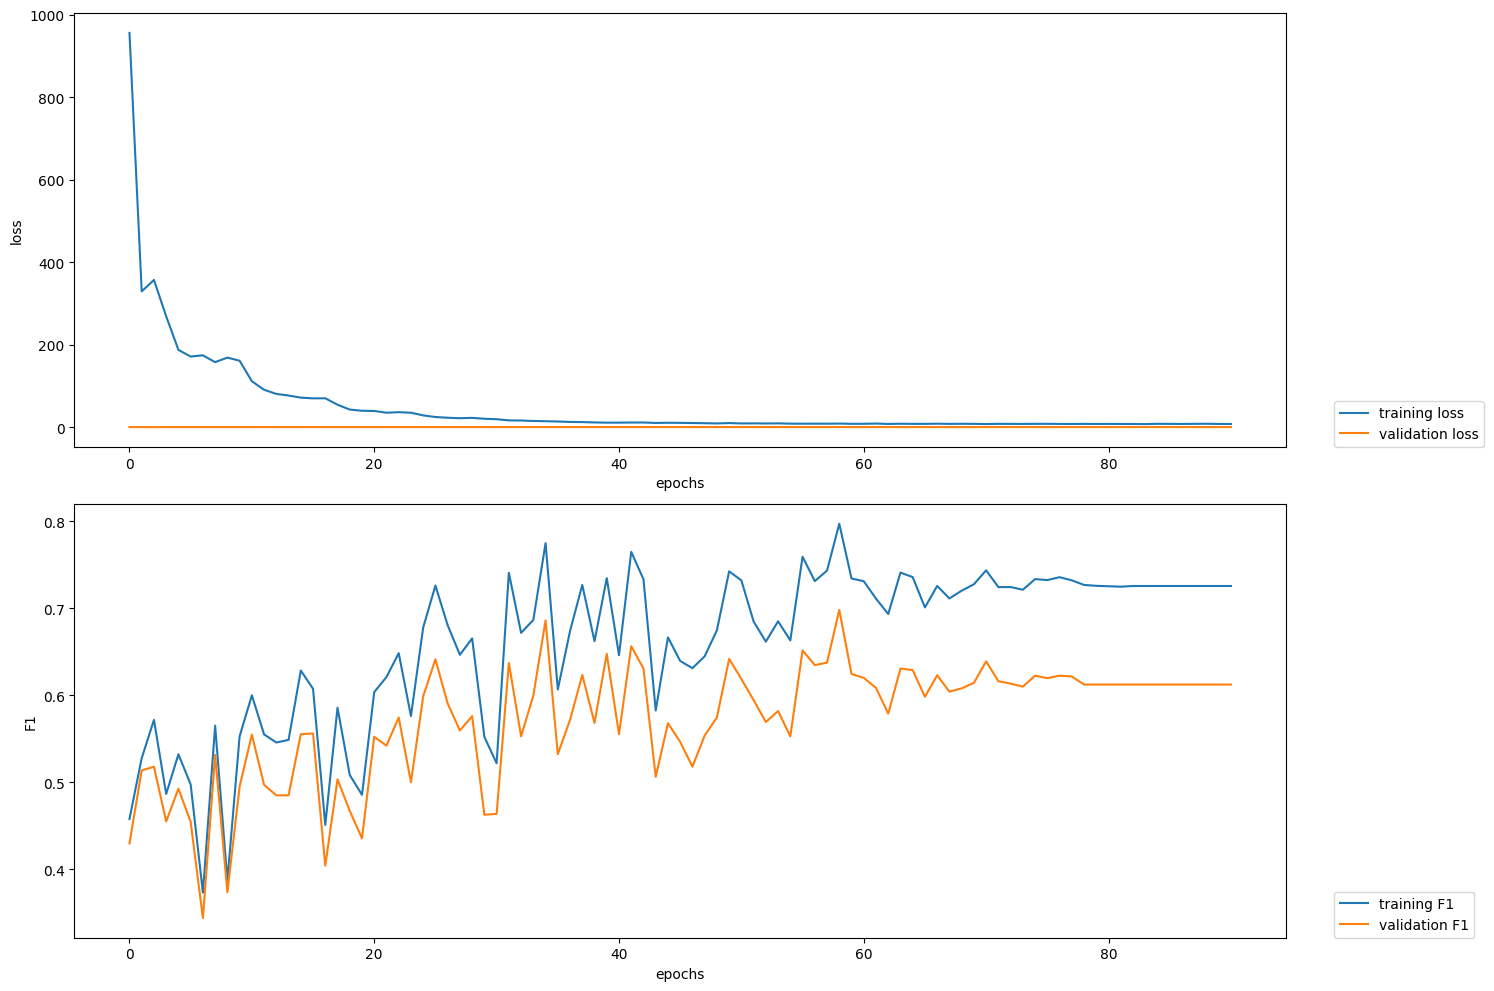

100%|██████████| 79/79 [00:20<00:00,  3.78it/s]

2023-04-21 07:40:43,714 Evaluating as a multi-label problem: True



100%|██████████| 10/10 [00:02<00:00,  3.93it/s]

2023-04-21 07:40:49,079 Evaluating as a multi-label problem: False



100%|██████████| 10/10 [00:04<00:00,  2.28it/s]

2023-04-21 07:40:53,567 Evaluating as a multi-label problem: True


,split,index,I-ADR,E-ADR,B-ADR,S-ADR,S-Drug,B-Finding,E-Finding,B-Drug,...,I-Finding,B-Symptom,E-Symptom,I-Symptom,I-Disease,I-Drug,micro avg,macro avg,weighted avg,samples avg
0,train,precision,0.747656,0.793743,0.777483,0.845815,0.986923,0.890000,0.824742,1.000000,...,1.000000,0.951220,0.968750,1.000000,0.976190,1.000000,0.811251,0.923504,0.814371,0.122043
1,train,recall,0.627332,0.781517,0.787698,0.845194,0.997667,0.445000,0.400000,0.936364,...,0.167785,0.354545,0.271930,0.173077,0.820000,0.820000,0.735657,0.639484,0.735657,0.122001
2,train,f1-score,0.682229,0.787583,0.782557,0.845505,0.992266,0.593333,0.538721,0.967136,...,0.287356,0.516556,0.424658,0.295082,0.891304,0.901099,0.771607,0.721410,0.763643,0.122015
3,train,support,4449.000000,3506.000000,3349.000000,1363.000000,1286.000000,200.000000,200.000000,110.000000,...,149.000000,110.000000,114.000000,104.000000,50.000000,50.000000,15722.000000,15722.000000,15722.000000,15722.000000
4,dev,precision,0.635731,0.693750,0.707006,0.758621,0.940828,0.571429,0.375000,0.615385,...,1.000000,0.000000,0.000000,0.000000,0.444444,0.666667,0.701404,0.494253,0.670453,NaN
5,dev,recall,0.529981,0.741648,0.753394,0.736842,0.969512,0.102564,0.088235,0.400000,...,0.050000,0.000000,0.000000,0.000000,0.307692,0.285714,0.628751,0.318609,0.628751,NaN
6,dev,f1-score,0.578059,0.716900,0.729463,0.747573,0.954955,0.173913,0.142857,0.484848,...,0.095238,0.000000,0.000000,0.000000,0.363636,0.400000,0.663093,0.358101,0.637441,NaN
7,dev,support,517.000000,449.000000,442.000000,209.000000,164.000000,39.000000,34.000000,20.000000,...,20.000000,12.000000,13.000000,23.000000,13.000000,7.000000,2066.000000,2066.000000,2066.000000,NaN
8,test,precision,0.671717,0.763593,0.744578,0.700000,0.915842,0.454545,0.333333,0.842105,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.875000,0.739412,0.456980,0.703640,0.106219
9,test,recall,0.506667,0.730769,0.739234,0.753165,0.963542,0.208333,0.074074,0.592593,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.280000,0.631976,0.315600,0.631976,0.106135


In [17]:
print(suf)

os.mkdir('flair_ner_model'+suf+'/classification_report')
plotter.plot_training_curves('flair_ner_model'+suf+'/loss.tsv')

# evaluate the tagger on the test set
result = tagger.evaluate(corpus.train, 
                         embeddings_storage_mode='gpu',
                         mini_batch_size=12,
                         main_evaluation_metric = ("weighted avg", "f1-score"),
                         gold_label_type='ner',
                         gold_label_dictionary=tag_dictionary)
open('flair_ner_model'+suf+'/classification_report/train.txt', 'w').write(str(result))
res1 = pd.DataFrame.from_dict(result.classification_report).reset_index()
res1.insert(loc=0, column='split', value='train')

result = tagger.evaluate(corpus.dev, 
                         embeddings_storage_mode='gpu',
                         mini_batch_size=12,
                         main_evaluation_metric = ("weighted avg", "f1-score"),
                         gold_label_type='ner',
                         gold_label_dictionary=tag_dictionary)
open('flair_ner_model'+suf+'/classification_report/dev.txt', 'w').write(str(result))
res2 = pd.DataFrame.from_dict(result.classification_report).reset_index()
res2.insert(loc=0, column='split', value='dev')

result = tagger.evaluate(corpus.test, 
                         embeddings_storage_mode='gpu',
                         mini_batch_size=12,
                         main_evaluation_metric = ("weighted avg", "f1-score"),
                         gold_label_type='ner',
                         gold_label_dictionary=tag_dictionary)
open('flair_ner_model'+suf+'/classification_report/test.txt', 'w').write(str(result))
res3 = pd.DataFrame.from_dict(result.classification_report).reset_index()
res3.insert(loc=0, column='split', value='test')

res = pd.concat([res1,res2,res3],ignore_index=True)
res.to_csv('flair_ner_model'+suf+'/classification_report.csv',index=False)
res

In [18]:
# import time
# start_time = time.time()
# while time.time() - start_time < 1:
#     time.sleep(1)
# print('Session has timed out (2 minutes). Disconnecting...')
# !kill -9 -1

Layering can be a good idea if the NER tags in the first layer have their own set of dependent values in the second layer. This can help capture more information about the entities being recognized and provide more context for downstream tasks. However, it also increases the complexity of the annotation and the training process, so it should be used judiciously. In general, it's a good idea to start with a simple tag scheme and gradually increase complexity as needed.

    does it really matter if u use the E header

It depends on the specific task and the requirements of the downstream model. In some cases, using the E tag can help disambiguate between overlapping entities, while in other cases it may not be necessary or even desired. Ultimately, it's up to the developer to determine the appropriate tagging scheme for their specific use case.

    would adding POS as an extra NER layer help model performance or not

Adding POS as an extra NER layer may or may not help model performance, depending on the specific use case and data being analyzed.

On one hand, incorporating POS tags could provide additional context to the model and help it better distinguish between named entities and other parts of speech. For example, knowing that a word is a noun or verb could help the model determine if it is likely to be a named entity or not.

On the other hand, adding an additional layer could also increase model complexity and training time without necessarily improving performance. It may also require additional manual annotation efforts to create a labeled dataset with both NER and POS tags.

Ultimately, whether to include POS as an additional layer will depend on the specific requirements and goals of the project, as well as the available data and resources.

    besides bioes ordering (which is up-to-down), it doesn't matter what order the tags in the same domain appear in left-to-right?

Yes, that is correct. As long as the BIOES order is maintained vertically, the order of tags in the same domain from left-to-right should not impact training in flai

    different typenames must be treated as separate tasks?

Yes, that's correct. Different typenames should be treated as separate tasks because they represent different types of annotations that you want to predict. For example, in a biomedical NER task, you might want to predict the entity types of both drugs and diseases, which would be represented by two different typenames in your annotation data. Predicting both types of entities would require different models and possibly different evaluation metrics.